## Seaborn 画图

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# sns.set_style("whitegrid")
tips = sns.load_dataset("tips")

In [2]:
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


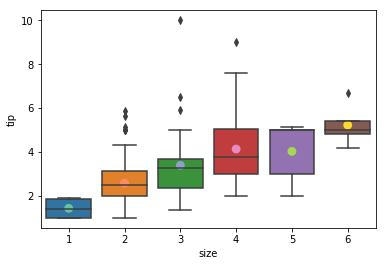

In [3]:
ax = sns.boxplot(x="size", y="tip", data=tips)
ax = sns.pointplot(x="size",y='tip',data=tips,palette="Set2",errwidth=0)

In [4]:
# 画图方法

def compare_plot(*data):
    f, axes = plt.subplots(len(set(merge_csv1['chr']))+1, 2, figsize=(7, 7), sharex=True)
    sns.despine(left=True)

    for n,da in enumerate(data):
        sns.distplot(da[da['pool']=='POOL=1']['depth'], kde=True,label='pool1-all',ax=axes[0,n])
        sns.distplot(da[da['pool']=='POOL=2']['depth'], kde=True,label='pool2-all',ax=axes[0,n])    
        axes[0,n].legend()
        for j,i in enumerate(set(da['chr'])):
            sns.distplot(da[(da['pool']=='POOL=1') & (da['chr']==i)]['depth'], 
                              kde=True,label='pool1-chr{}'.format(i),ax=axes[j+1,n])
            sns.distplot(da[(da['pool']=='POOL=2') &(da['chr']==i)]['depth'], 
                              kde=True,label='pool2-chr{}'.format(i),ax=axes[j+1,n])
            axes[j+1,n].legend()

第一列是分pool进行标准化，第二列为不分pool


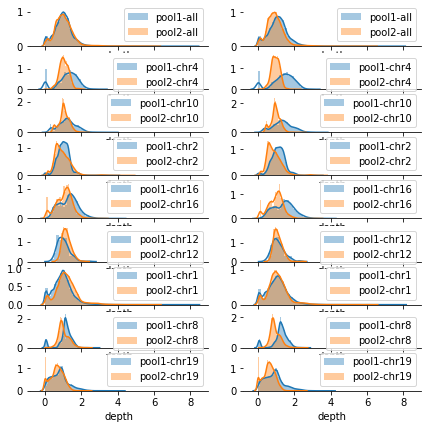

In [5]:
merge_csv1 = pd.read_csv('./demo_data/twopoolmerge.csv')
merge_csv1.columns=['tag','loc','pool','depth']
merge_csv1['chr-temp'] = merge_csv1['loc'].str.split(':')
merge_csv1['chr'] = merge_csv1['chr-temp'].str.get(0)
# print(merge_csv[''])

merge_csv2 = pd.read_csv('./demo_data/onePool.csv')
merge_csv2.columns=['tag','loc','depth','pool']
merge_csv2['chr-temp'] = merge_csv2['loc'].str.split(':')
merge_csv2['chr'] = merge_csv2['chr-temp'].str.get(0)
print('第一列是分pool进行标准化，第二列为不分pool')
compare_plot(merge_csv1,merge_csv2)

Text(1.5,5,'LDLR')

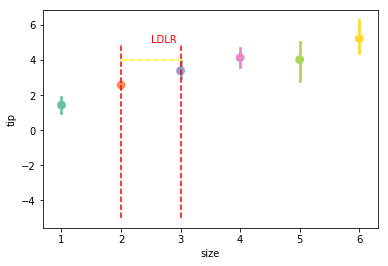

In [6]:
ax = sns.pointplot(x="size",y='tip',data=tips,palette="Set2")
ax.plot([1,1],[-5,5],'--',color='red')
ax.plot([2,2],[-5,5],'--',color='red')
ax.plot([1,2],[4,4],'--',color='yellow')
ax.text(x=1.5,y=5,s='LDLR',color='red')

## Draw pdf or density

In [7]:
def draw_density(data,title,value):
    ax=sns.distplot(data[value],kde=True)
    ax.set_title(title)
    fig = ax.get_figure()
    fig.savefig('./demo_data/hist.png') 

        chr       loc     depth
0 -1.267808  1.413360 -1.002400
1  1.572565  0.703118 -0.586377
2 -0.256398  0.894875 -0.044335
3 -0.559708 -1.349189 -1.081314
4  0.207286  1.663613  0.444283


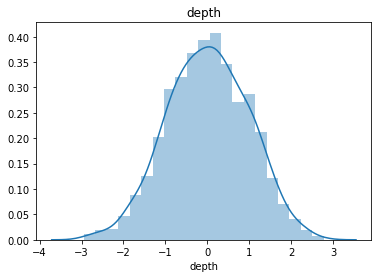

In [8]:
import numpy as np
data=pd.DataFrame(np.random.normal(0,1,(1000,3)),columns=['chr','loc','depth'])
print(data.head())
draw_density(data,'depth','depth')

In [9]:
import statsmodels.api as sm
data=pd.DataFrame(np.random.normal(0,1,(10000,4)),columns=['C','CHH','CG','CHG'])
ecdf = sm.distributions.ECDF(data['C'])
x = np.linspace(min(data['C']), max(data['C']))
y1 = ecdf(x)
ecdf = sm.distributions.ECDF(data['CHH'])
y2 = ecdf(x)
print(y1,y2)

[1.000e-04 2.000e-04 5.000e-04 6.000e-04 1.100e-03 1.800e-03 2.900e-03
 4.000e-03 5.700e-03 9.900e-03 1.420e-02 1.810e-02 2.640e-02 3.650e-02
 5.070e-02 6.700e-02 8.990e-02 1.196e-01 1.525e-01 1.936e-01 2.439e-01
 2.918e-01 3.462e-01 4.075e-01 4.689e-01 5.329e-01 5.986e-01 6.543e-01
 7.069e-01 7.598e-01 8.043e-01 8.434e-01 8.777e-01 9.079e-01 9.309e-01
 9.495e-01 9.653e-01 9.752e-01 9.816e-01 9.875e-01 9.908e-01 9.934e-01
 9.957e-01 9.977e-01 9.982e-01 9.991e-01 9.994e-01 9.997e-01 9.999e-01
 1.000e+00] [0.000e+00 1.000e-04 2.000e-04 4.000e-04 1.100e-03 1.400e-03 2.700e-03
 3.600e-03 5.100e-03 6.900e-03 1.150e-02 1.750e-02 2.680e-02 3.750e-02
 4.970e-02 7.050e-02 9.610e-02 1.216e-01 1.558e-01 1.981e-01 2.443e-01
 2.969e-01 3.515e-01 4.092e-01 4.720e-01 5.339e-01 5.942e-01 6.522e-01
 7.063e-01 7.592e-01 8.053e-01 8.463e-01 8.806e-01 9.063e-01 9.284e-01
 9.480e-01 9.636e-01 9.748e-01 9.830e-01 9.871e-01 9.915e-01 9.947e-01
 9.967e-01 9.980e-01 9.985e-01 9.991e-01 9.998e-01 1.000e+00 1.00

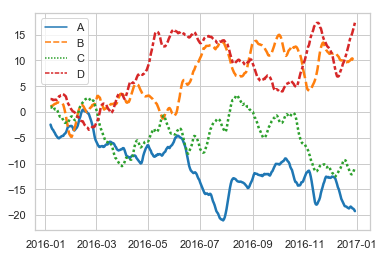

In [10]:
sns.set(style="whitegrid")

rs = np.random.RandomState(365)
values = rs.randn(365, 4).cumsum(axis=0)
dates = pd.date_range("1 1 2016", periods=365, freq="D")
data = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"])
data = data.rolling(7).mean()

sns.lineplot(data=data, palette="tab10", linewidth=2.5)

## 多种数据类型

看如何合适的表示

In [11]:
mytype = np.random.randint(1,4,20)
mydepth = np.random.randint(2,200,20)
mypercentage=np.random.rand(20)
mycontext = np.random.randint(1,3,20)
print(mytype,mydepth,mypercentage,mycontext)

[1 2 1 1 2 1 2 2 2 1 3 1 2 1 3 3 2 3 3 1] [ 76 197 151 148 175 128 172 196  69 181 101 194 183 159 140 137 117  94
  37  63] [0.06881218 0.98057256 0.59296518 0.0341487  0.98615532 0.83313554
 0.1014904  0.40114091 0.93699419 0.68959818 0.65190674 0.75137596
 0.42057818 0.51933151 0.77906365 0.31885172 0.26854077 0.65965657
 0.39152444 0.82998984] [2 2 1 1 2 1 2 2 1 1 1 2 1 1 2 1 2 1 1 2]


In [12]:
pd_data = pd.DataFrame(mytype,columns=['type'])
pd_data['depth']=mydepth
pd_data['percentage']=mypercentage
pd_data['context']=mycontext
print(pd_data)

    type  depth  percentage  context
0      1     76    0.068812        2
1      2    197    0.980573        2
2      1    151    0.592965        1
3      1    148    0.034149        1
4      2    175    0.986155        2
5      1    128    0.833136        1
6      2    172    0.101490        2
7      2    196    0.401141        2
8      2     69    0.936994        1
9      1    181    0.689598        1
10     3    101    0.651907        1
11     1    194    0.751376        2
12     2    183    0.420578        1
13     1    159    0.519332        1
14     3    140    0.779064        2
15     3    137    0.318852        1
16     2    117    0.268541        2
17     3     94    0.659657        1
18     3     37    0.391524        1
19     1     63    0.829990        2


In [13]:
pd_data['context'][pd_data['context'] == 1] = 'CpG'
pd_data['context'][pd_data['context'] == 2] = 'CHH'
pd_data['type'][pd_data['type'] == 1] = 'cgi'
pd_data['type'][pd_data['type'] == 2] = 'promoter'
pd_data['type'][pd_data['type'] == 3] = 'nothing'
print(pd_data)

        type  depth  percentage context
0        cgi     76    0.068812     CHH
1   promoter    197    0.980573     CHH
2        cgi    151    0.592965     CpG
3        cgi    148    0.034149     CpG
4   promoter    175    0.986155     CHH
5        cgi    128    0.833136     CpG
6   promoter    172    0.101490     CHH
7   promoter    196    0.401141     CHH
8   promoter     69    0.936994     CpG
9        cgi    181    0.689598     CpG
10   nothing    101    0.651907     CpG
11       cgi    194    0.751376     CHH
12  promoter    183    0.420578     CpG
13       cgi    159    0.519332     CpG
14   nothing    140    0.779064     CHH
15   nothing    137    0.318852     CpG
16  promoter    117    0.268541     CHH
17   nothing     94    0.659657     CpG
18   nothing     37    0.391524     CpG
19       cgi     63    0.829990     CHH


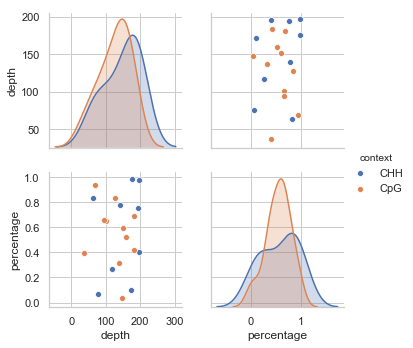

In [14]:
sns.pairplot(pd_data, hue="context")

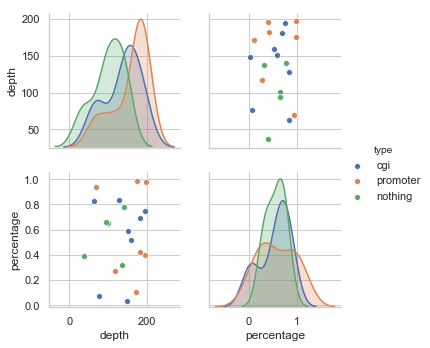

In [15]:
sns.pairplot(pd_data, hue="type")

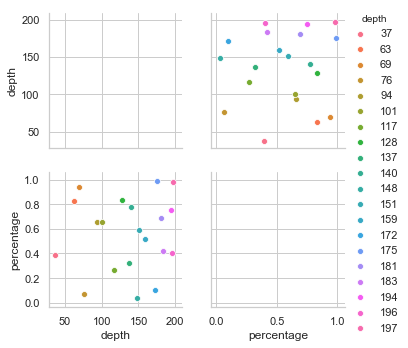

In [16]:
sns.pairplot(pd_data,hue='depth')

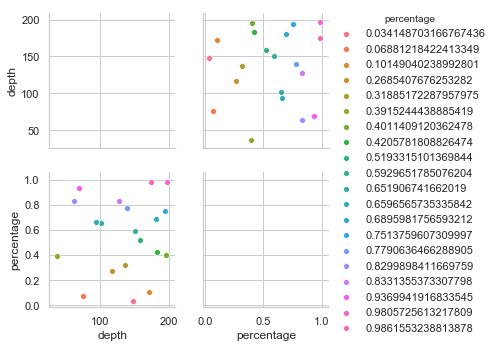

In [17]:
sns.pairplot(pd_data,hue='percentage')

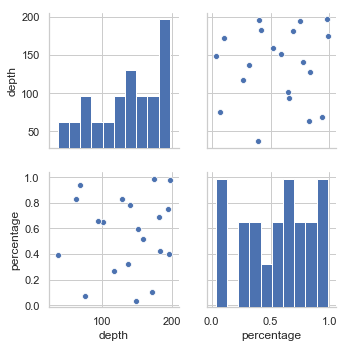

In [18]:
sns.pairplot(pd_data)

## 甲基化plot

不同样本甲基化不同程度差异

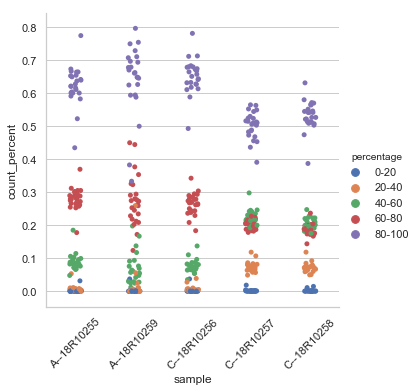

In [19]:
my_data = pd.read_csv('./demo_data/statOfPercentage.csv')
my_data = my_data[my_data['contig'] != 'all']

g=sns.catplot(x="sample", y="count_percent",hue="percentage" ,data=my_data)
# ax=g.get_xticklabels()
g.set_xticklabels(rotation=45)

In [20]:
my_data.groupby('contig').describe()

count_percent                                                         \
               count mean       std       min       25%       50%       75%   
contig                                                                        
1               25.0  0.2  0.222442  0.000000  0.004713  0.092734  0.287836   
10              25.0  0.2  0.224227  0.000000  0.001554  0.087801  0.278234   
11              25.0  0.2  0.218435  0.000000  0.005691  0.081095  0.311887   
12              25.0  0.2  0.234437  0.000000  0.004324  0.095789  0.274979   
13              25.0  0.2  0.235010  0.000000  0.003824  0.137255  0.261468   
14              25.0  0.2  0.229860  0.000000  0.003417  0.105597  0.294118   
15              25.0  0.2  0.230750  0.000000  0.001681  0.084884  0.245283   
16              25.0  0.2  0.219041  0.000000  0.002421  0.096964  0.289952   
17              25.0  0.2  0.223272  0.000000  0.006024  0.102688  0.293548   
18              25.0  0.2  0.225868  0.000000  0.004754  0.087234  0.266244   
19              25.0  0.2  0.228299  0.000000  0.003704  0.072979  0.271717   
2               25.0  0.2  0.226733  0.000000  0.007692  0.082418  0.281868   
20              25.0  0.2  0.231431  0.000000  0.002639  0.096306  0.269129   
21              25.0  0.2  0.176838  0.003617  0.052885  0.175845  0.261834   
22              25.0  0.2  0.219707  0.000000  0.002232  0.091902  0.285714   
3               25.0  0.2  0.243856  0.000000  0.005056  0.077307  0.208333   
4               25.0  0.2  0.231513  0.000000  0.003670  0.117117  0.238532   
5               25.0  0.2  0.233082  0.000000  0.000876  0.077933  0.267650   
6               25.0  0.2  0.235318  0.000000  0.001996  0.075848  0.262712   
7               25.0  0.2  0.237954  0.000000  0.003540  0.078466  0.250147   
8               25.0  0.2  0.227261  0.000000  0.002577  0.093333  0.280000   
9               25.0  0.2  0.208816  0.000000  0.005085  0.110169  0.302063   
X               25.0  0.2  0.255461  0.000000  0.000000  0.106769  0.212121   
Y               25.0  0.2  0.165431  0.000000  0.027397  0.184783  0.342466   

                  
             max  
contig            
1       0.707763  
10      0.662651  
11      0.643902  
12      0.754545  
13      0.713193  
14      0.694118  
15      0.679245  
16      0.661017  
17      0.710843  
18      0.674468  
19      0.657516  
2       0.679891  
20      0.796875  
21      0.588757  
22      0.670455  
3       0.729167  
4       0.683486  
5       0.678161  
6       0.680387  
7       0.750000  
8       0.673540  
9       0.611017  
X       0.781659  
Y       0.493151

In [2]:
my_data2 = pd.read_csv('./demo_data/statOfPercentage_dif_region_gene.csv')
my_data2[my_data2['gene']=='.']['gene']='unknown'

regions = my_data2['region'].unique()
contigs = my_data2['contig'].unique()


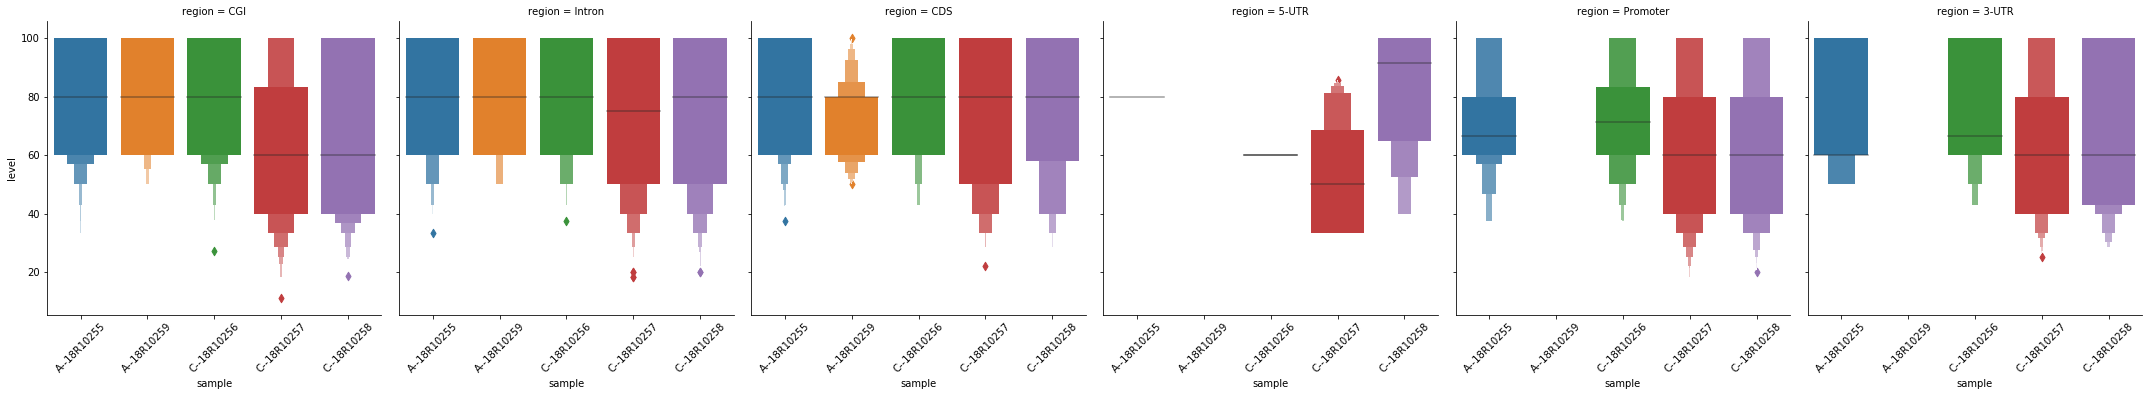

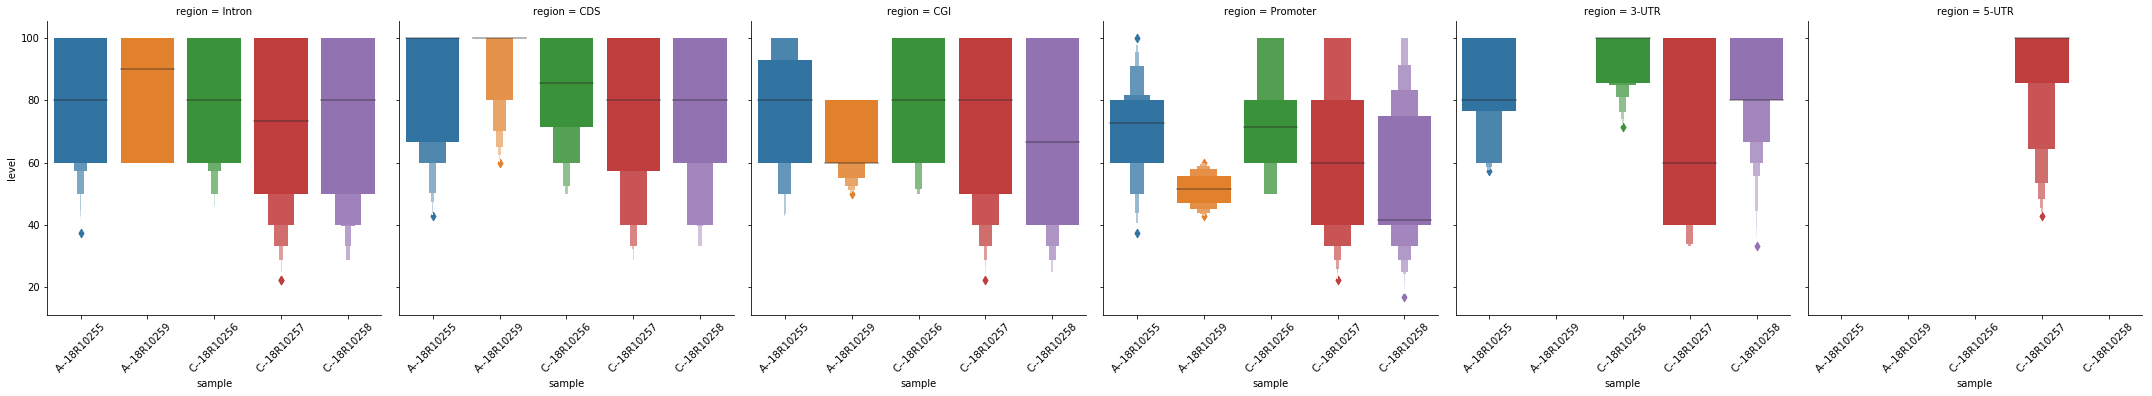

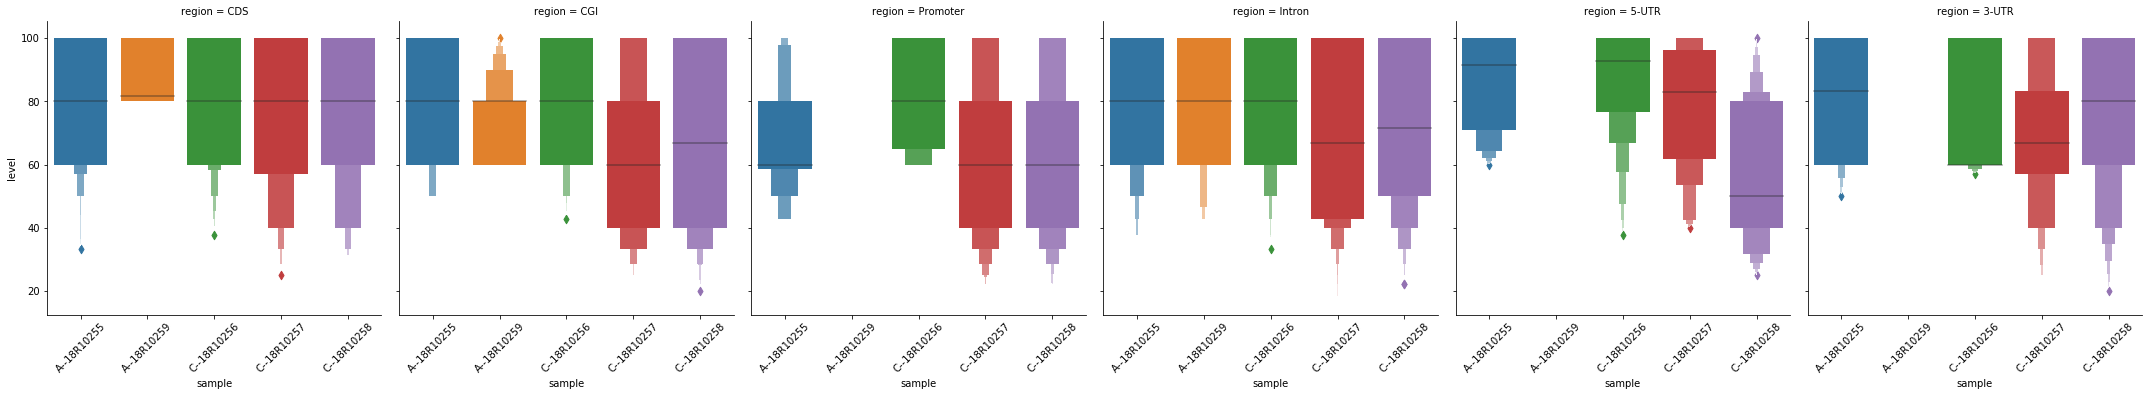

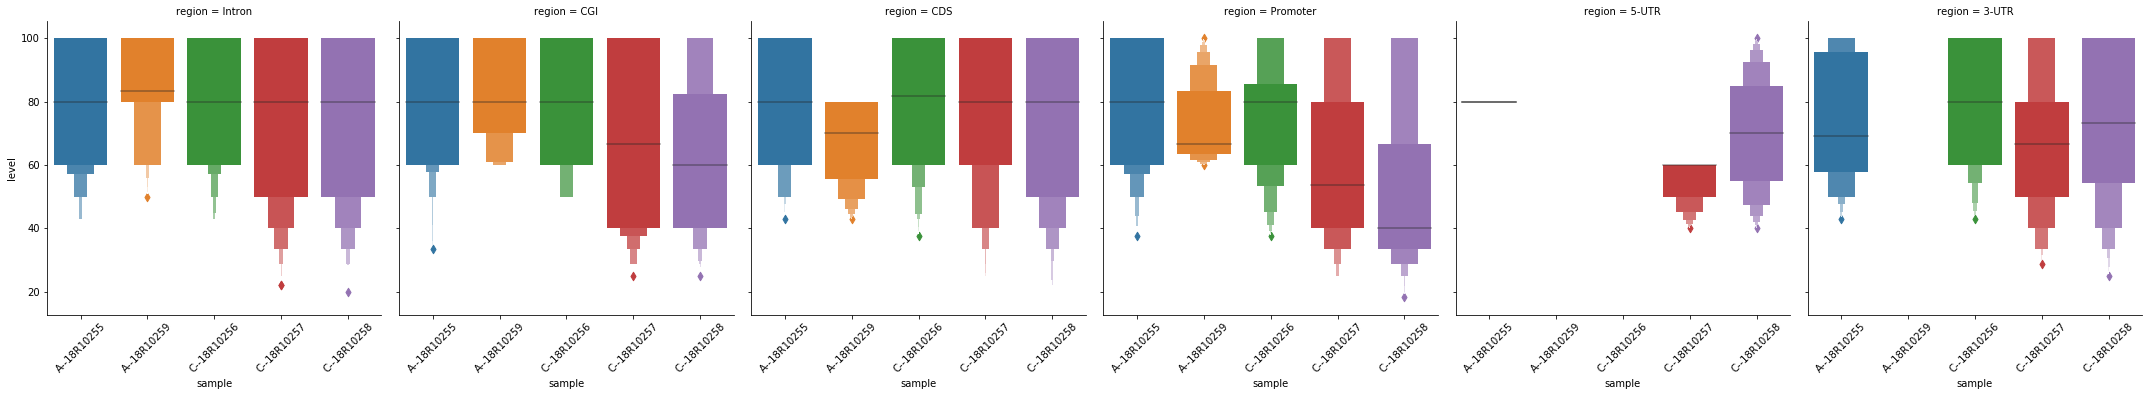

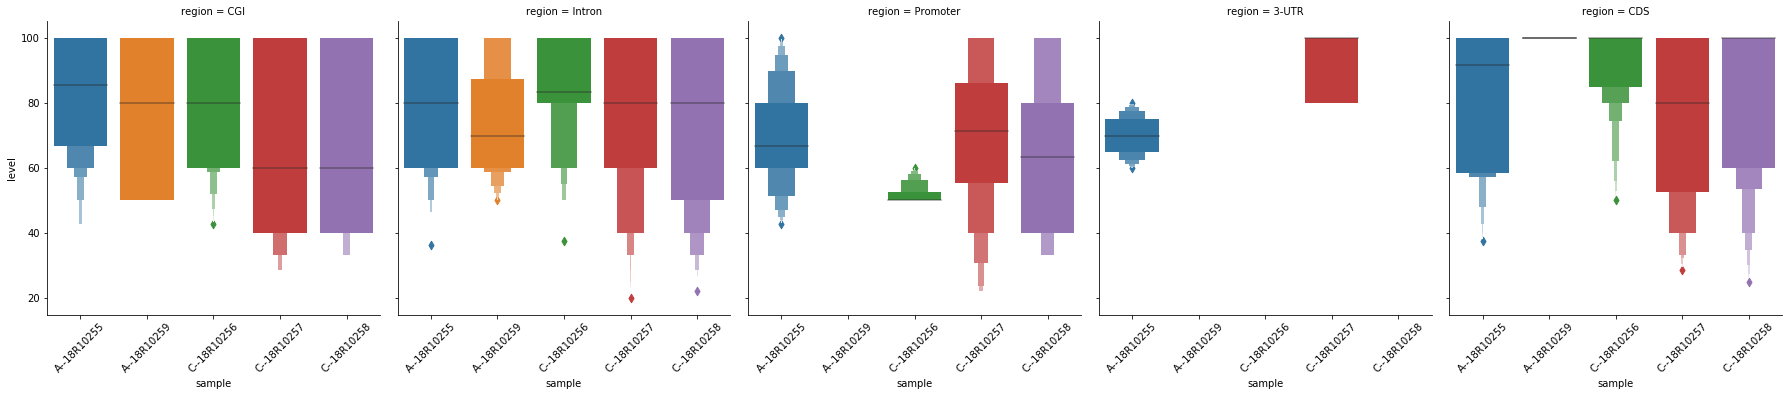

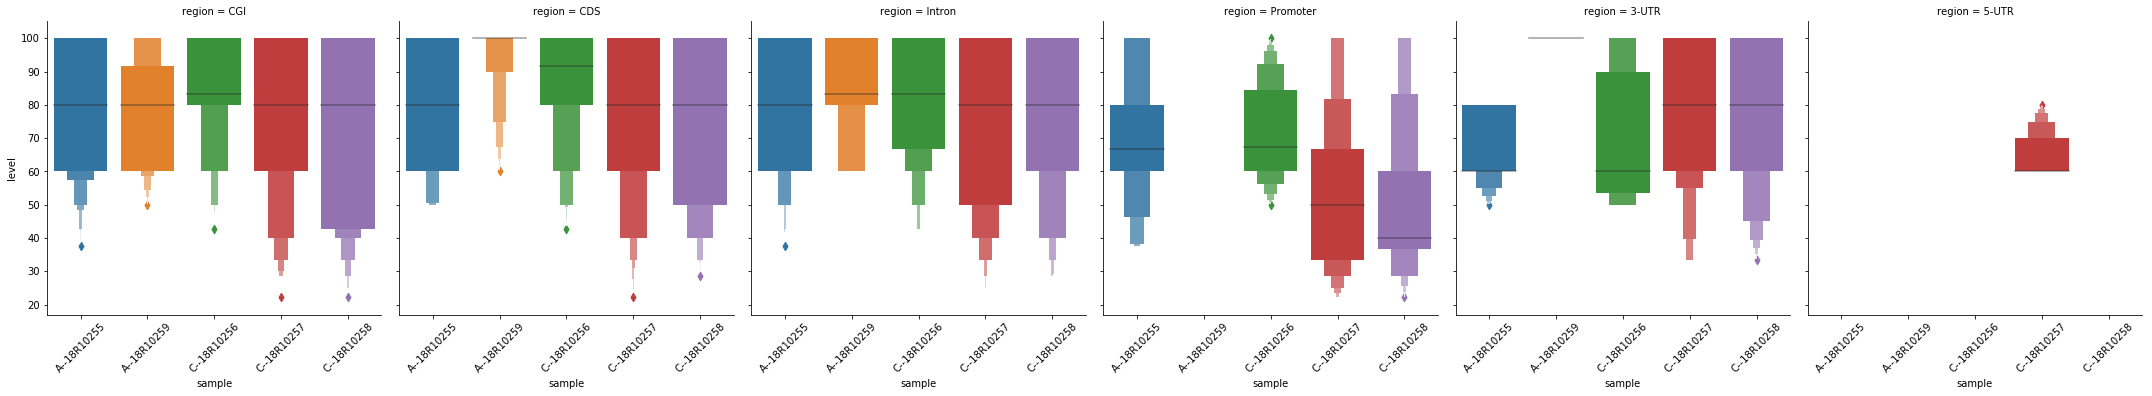

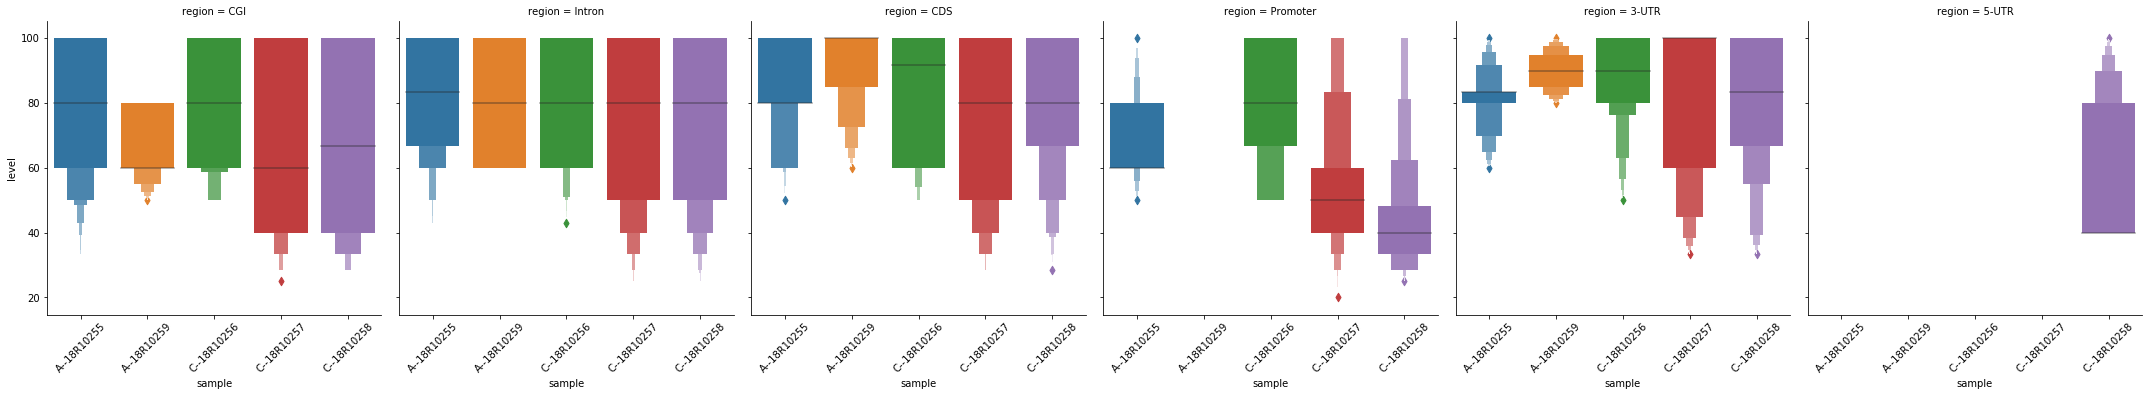

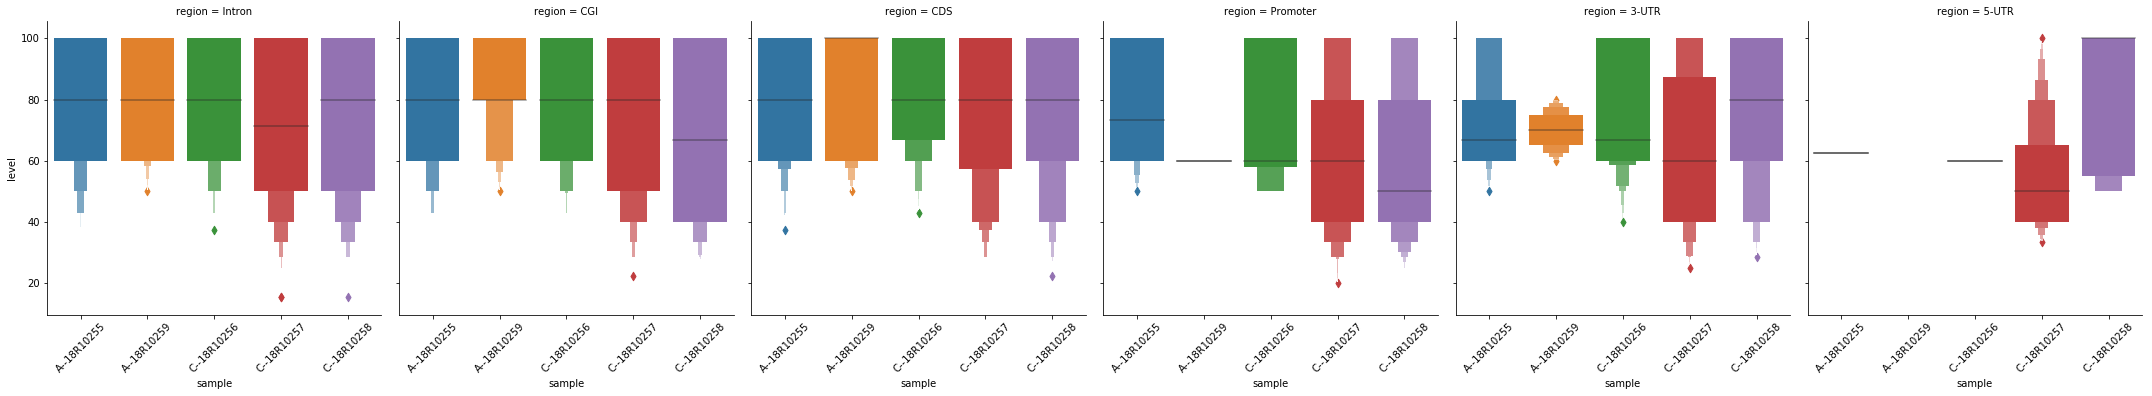

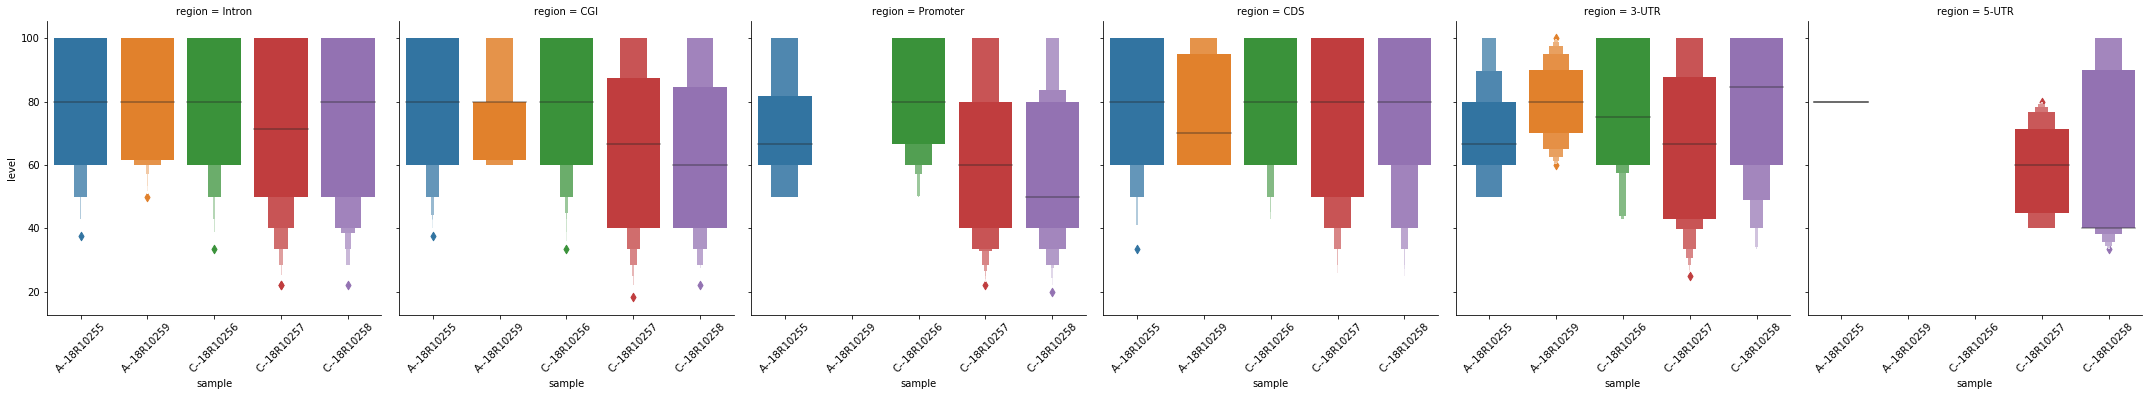

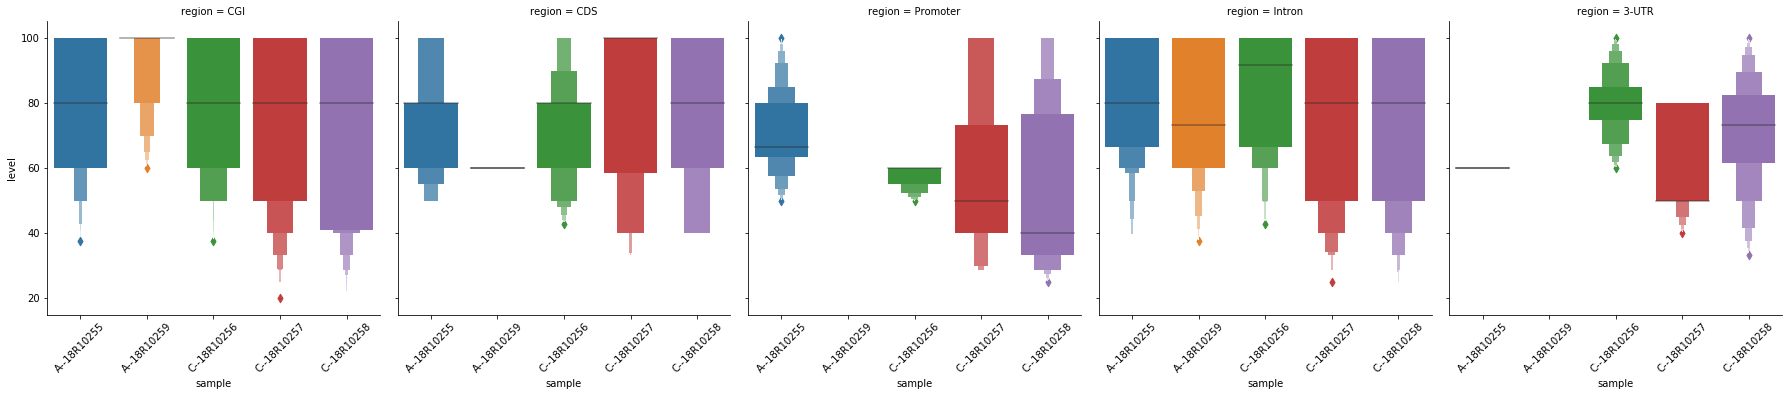

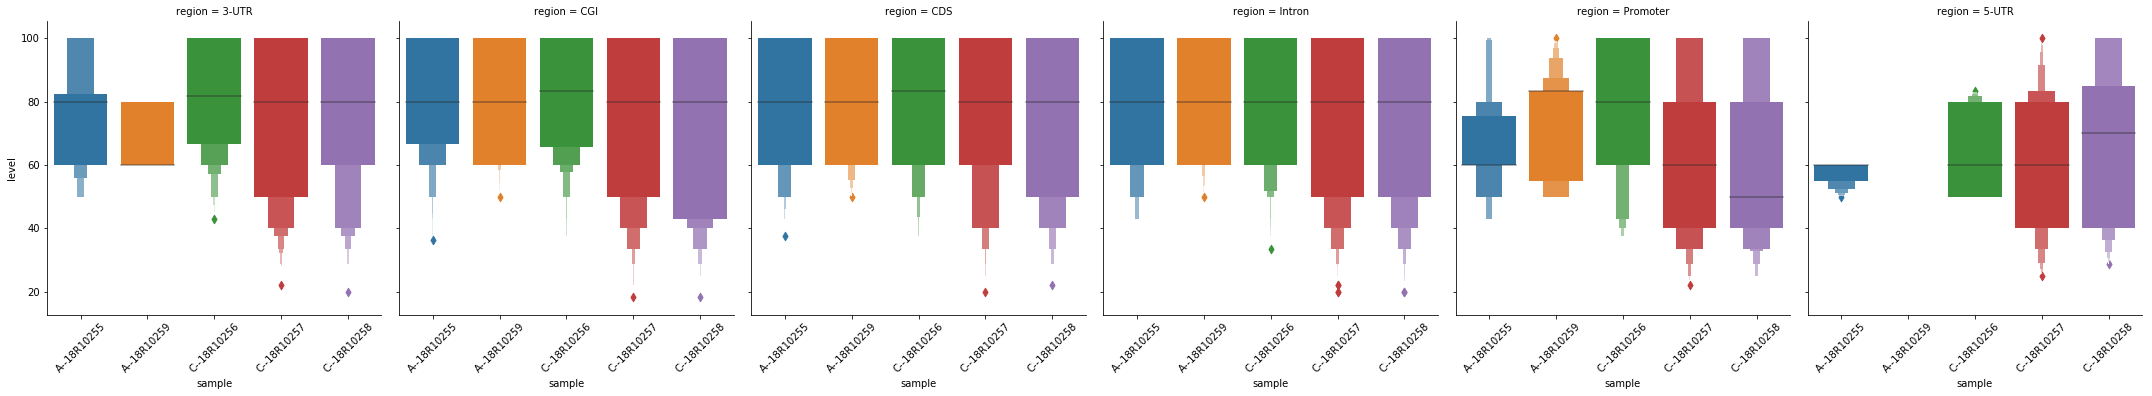

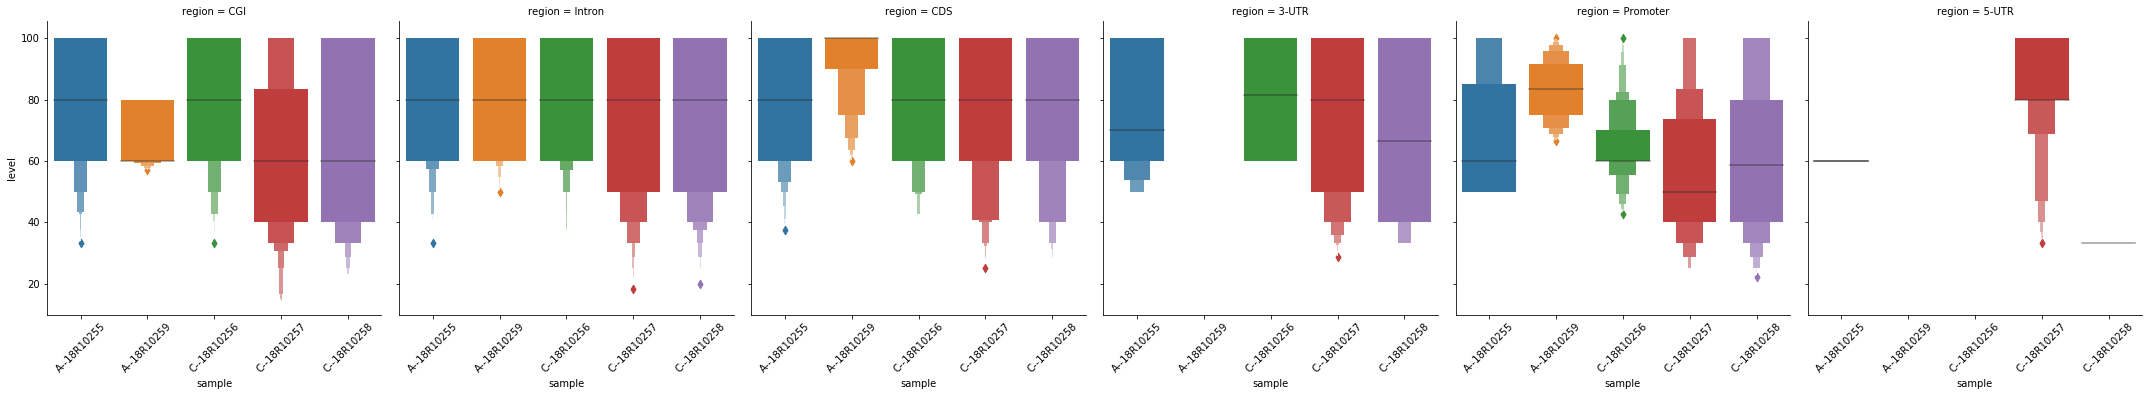

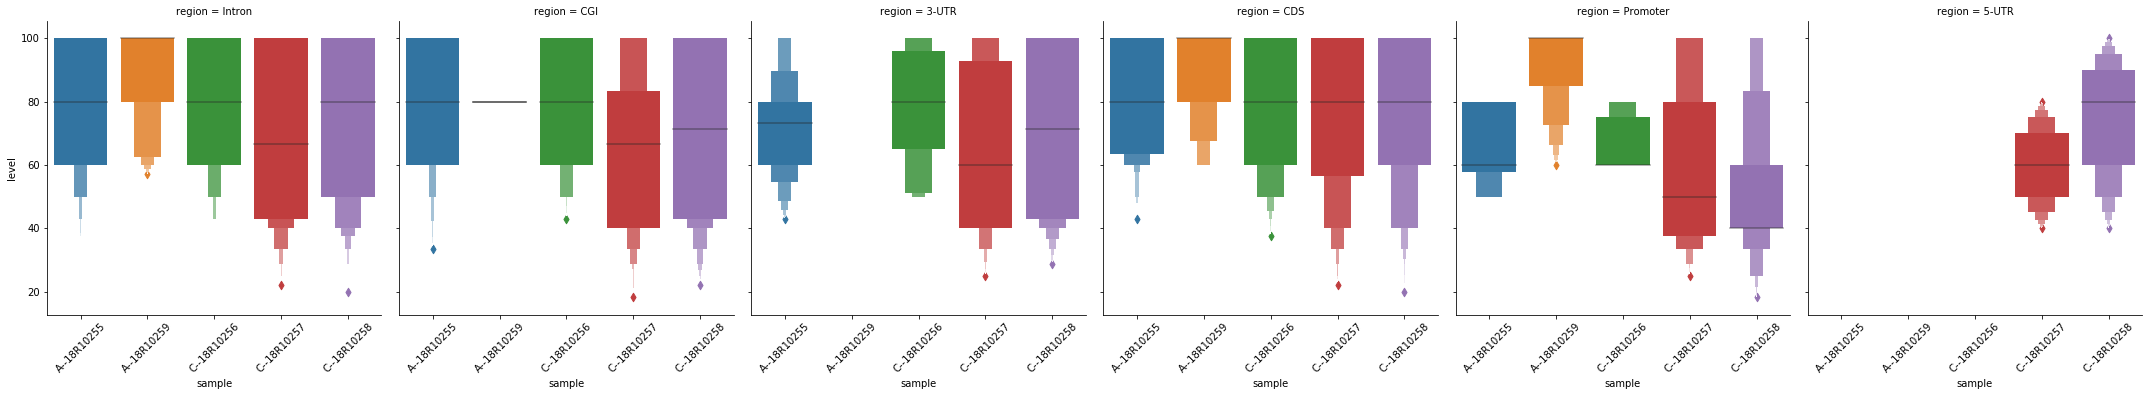

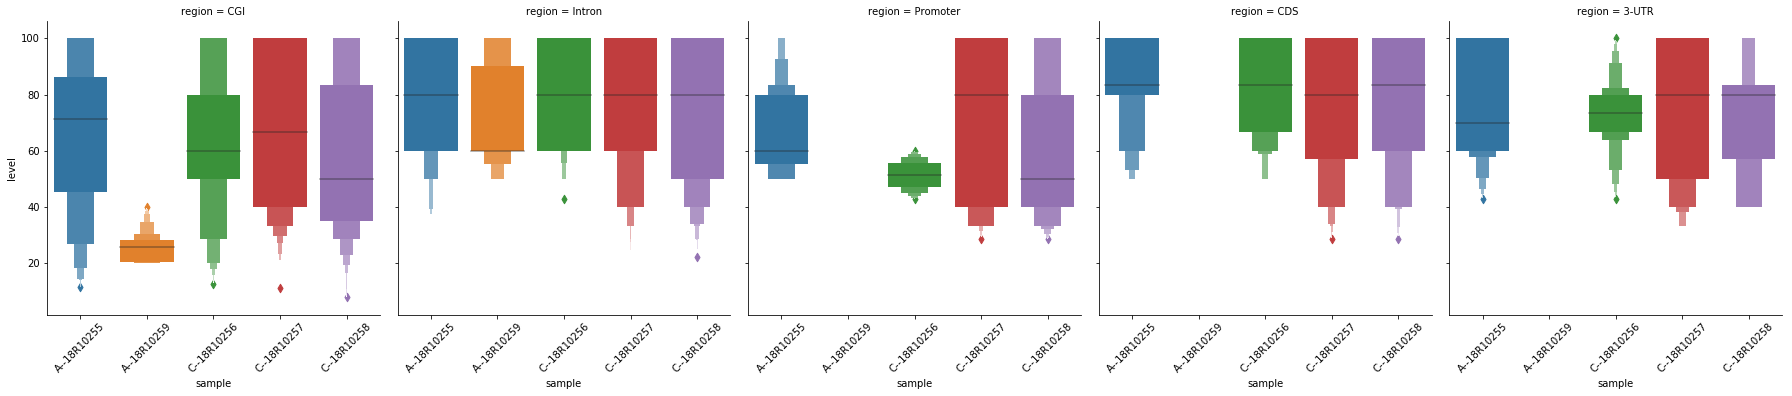

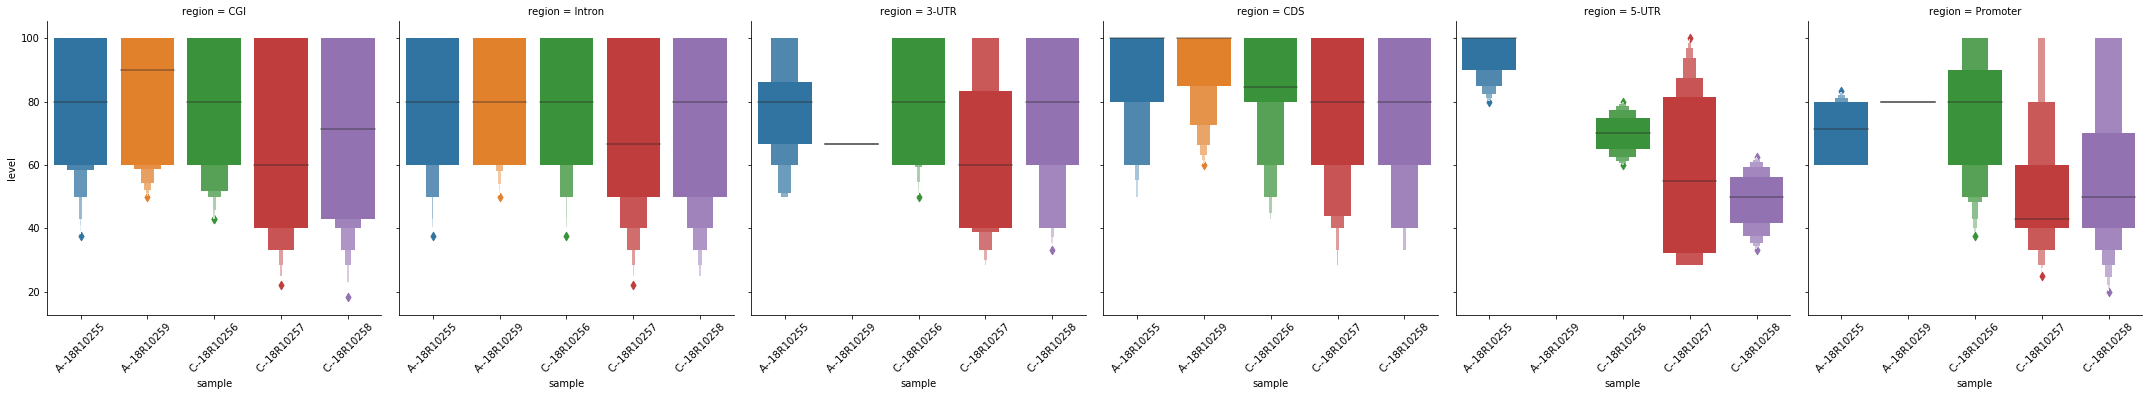

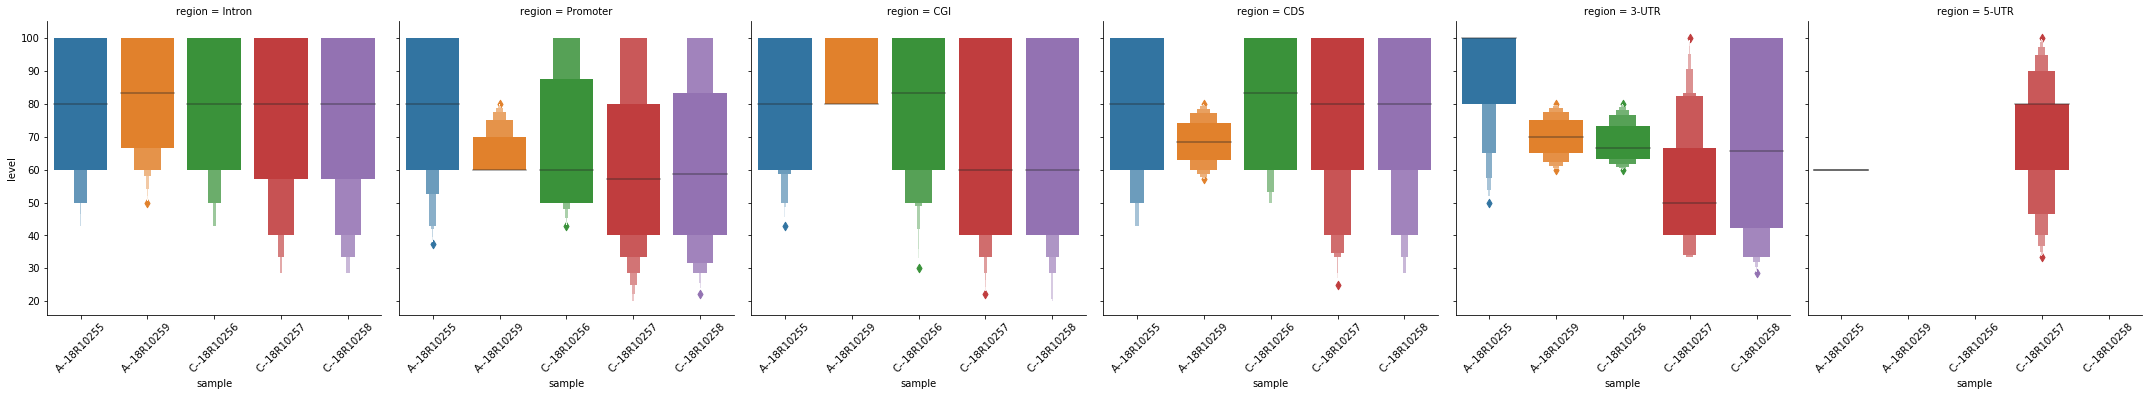

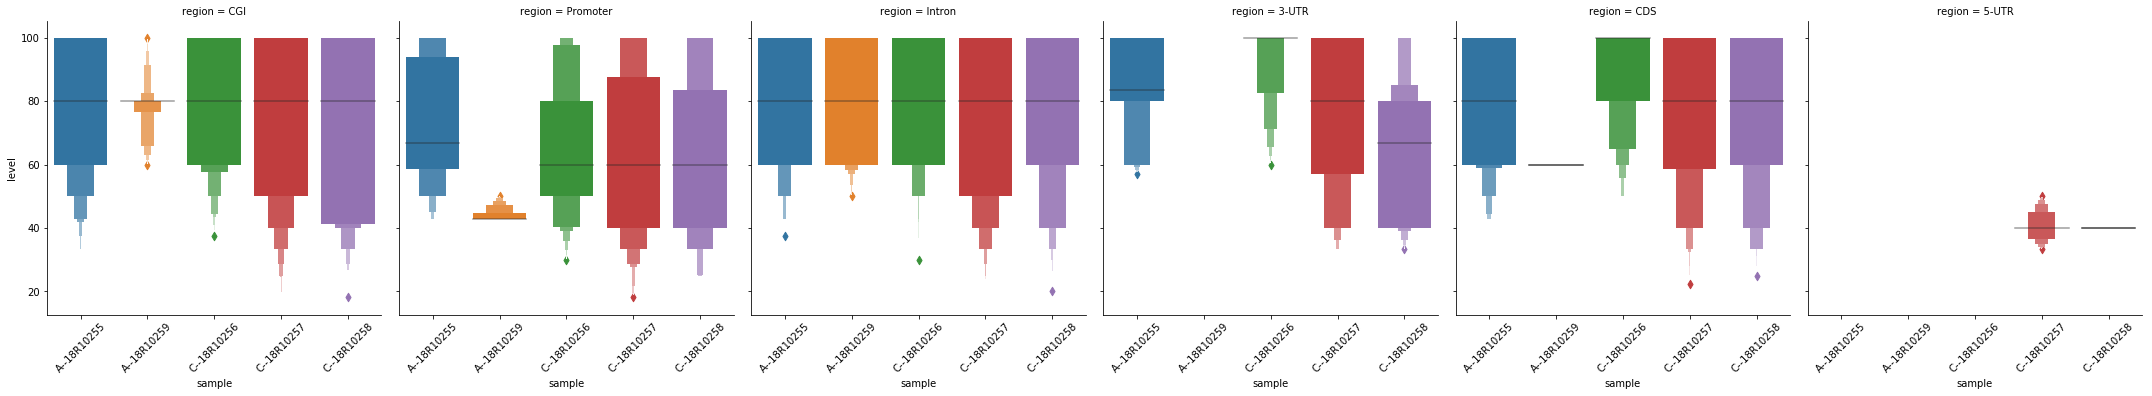

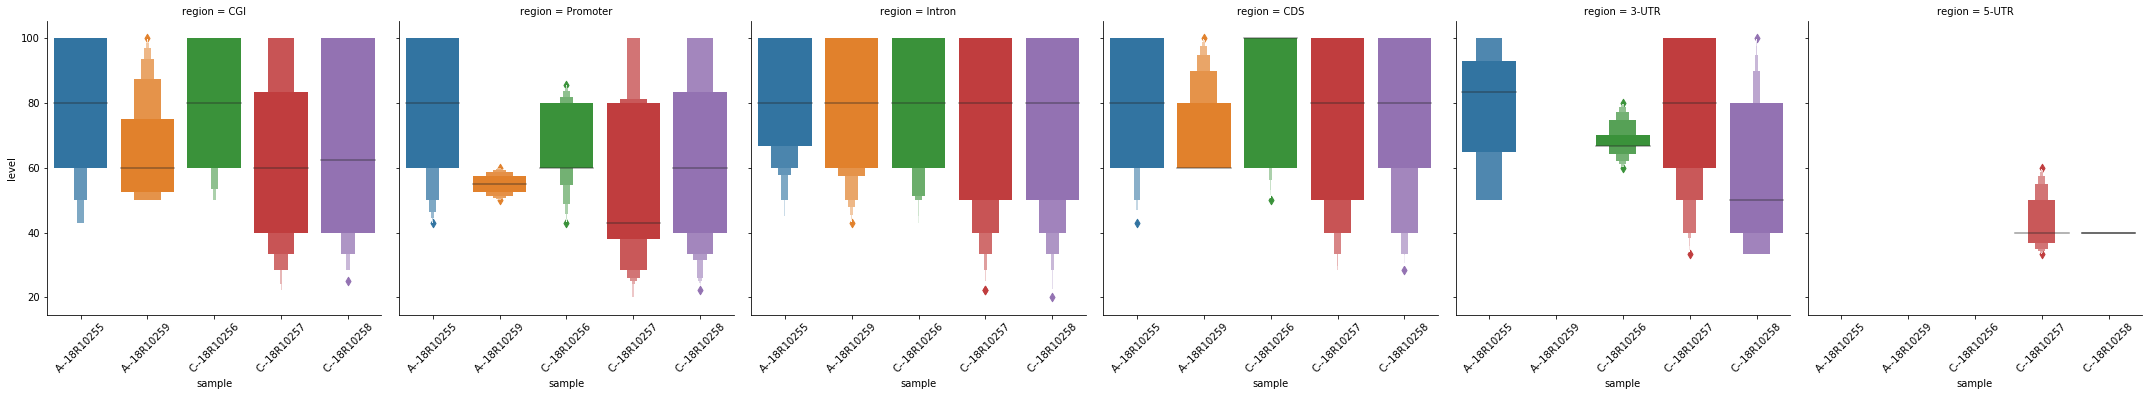

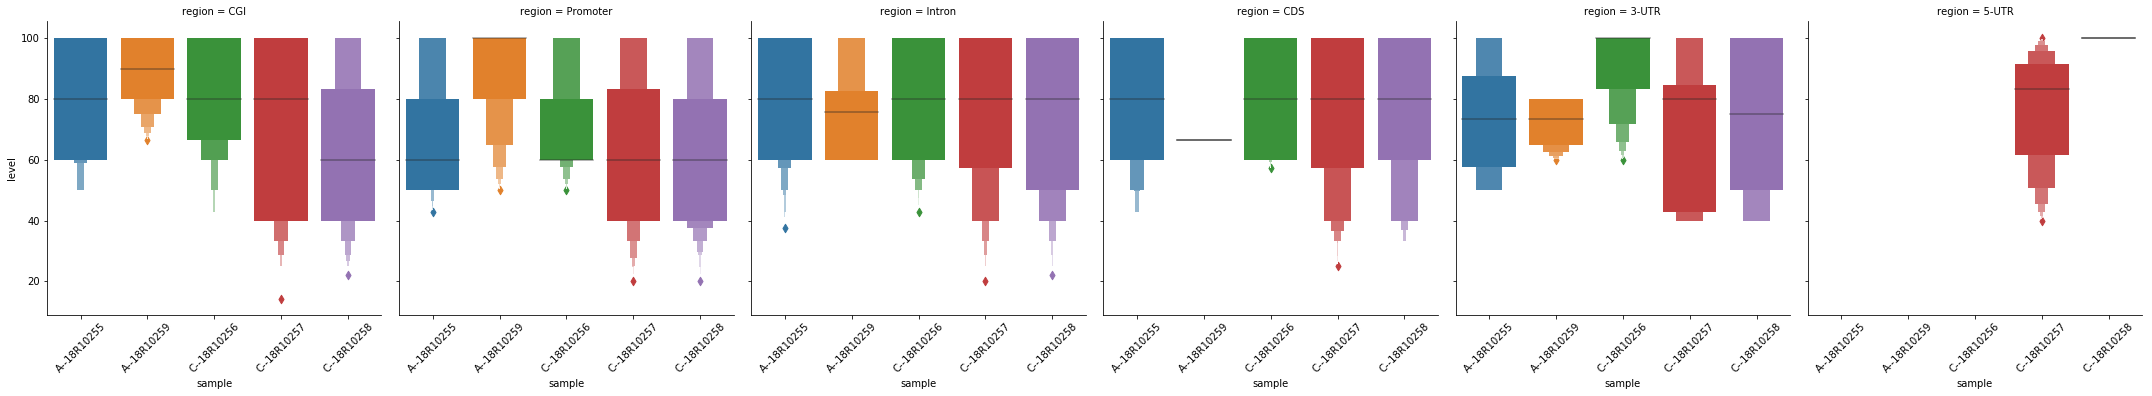

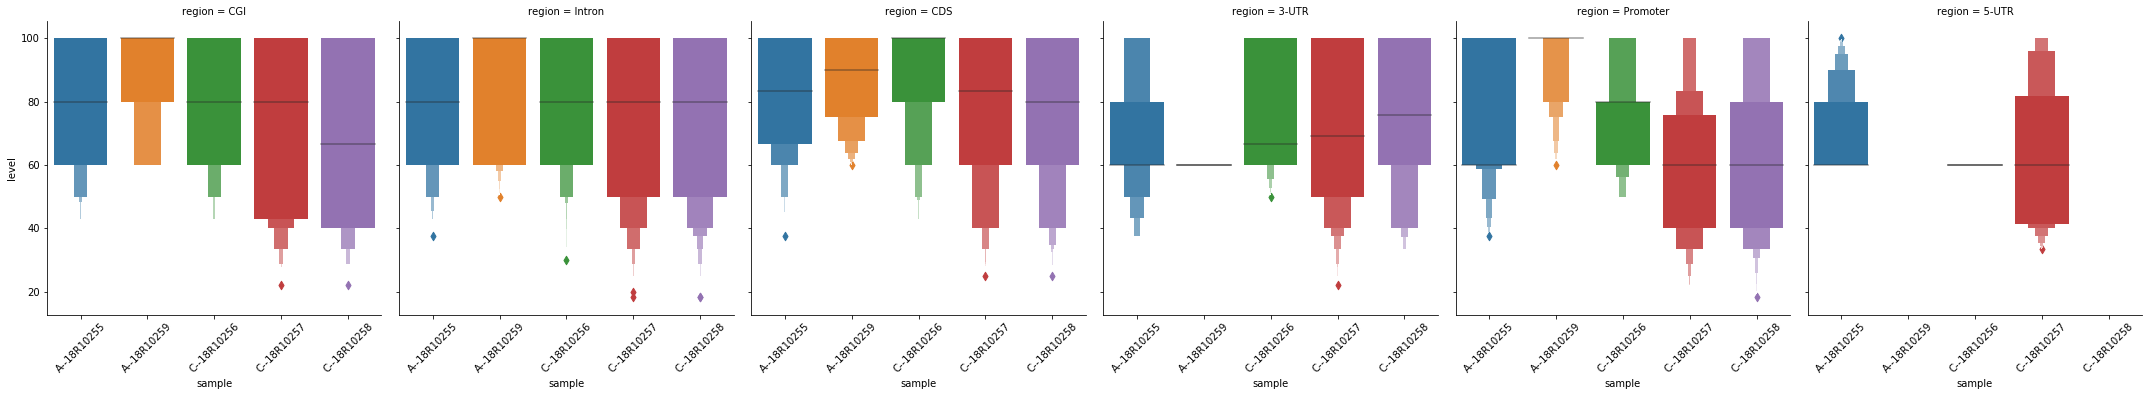

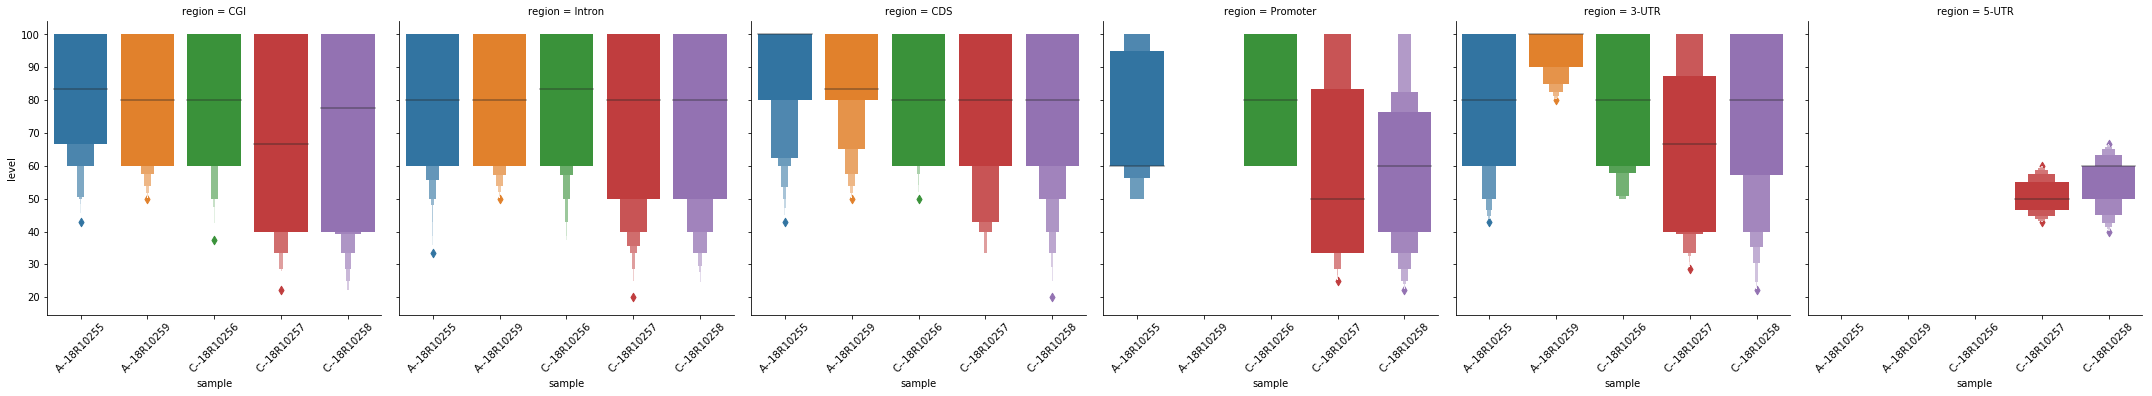

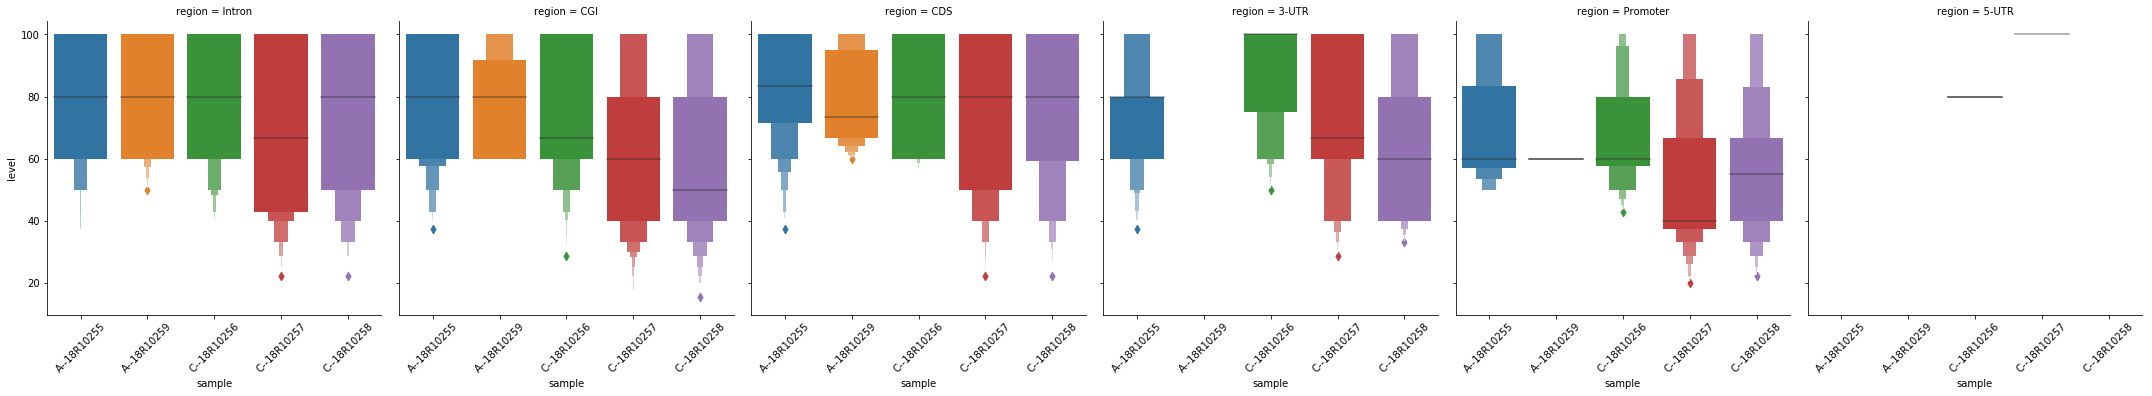

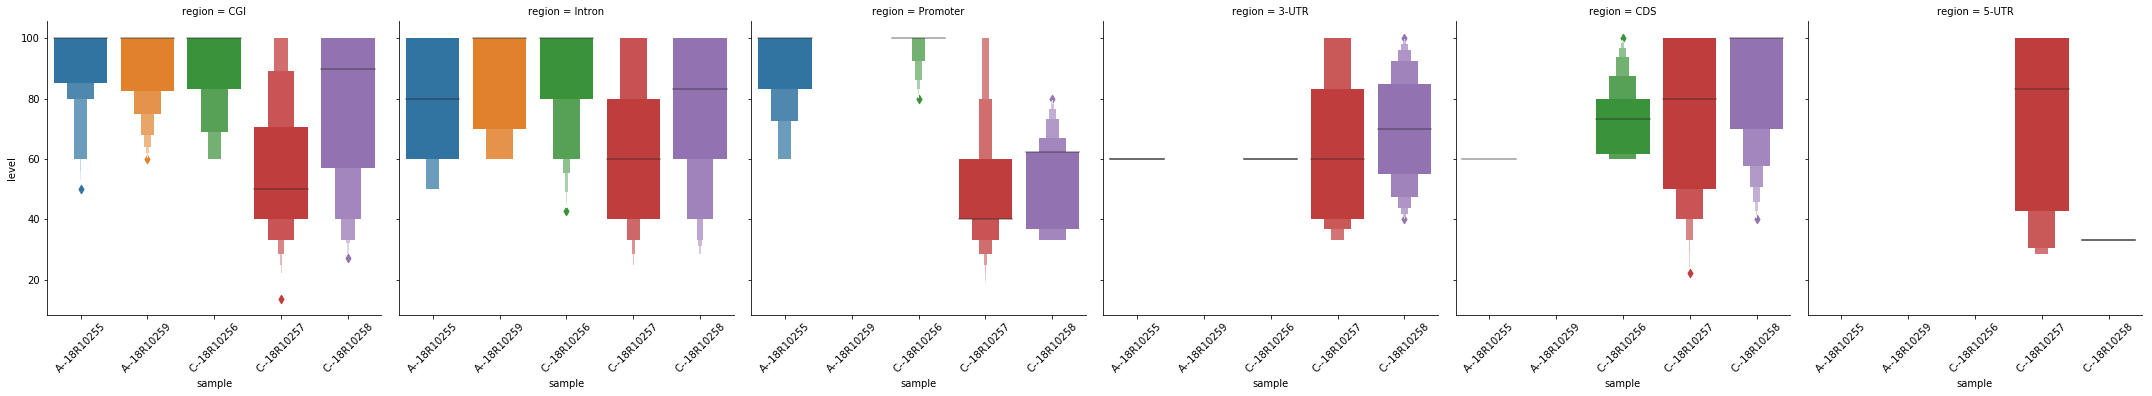

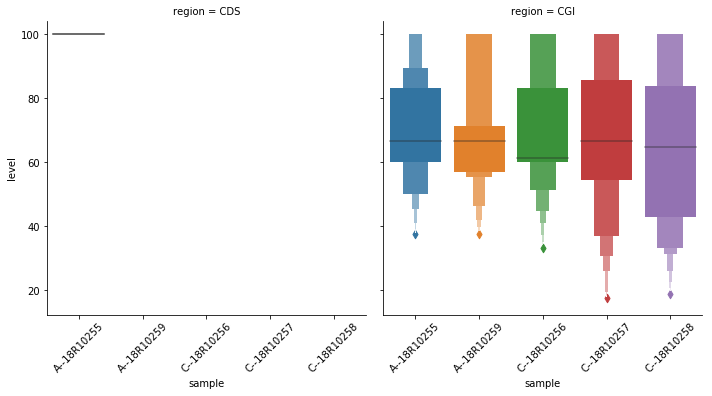

In [4]:

for contig in contigs:
#     print(contig)
#     g=sns.catplot(x="sample", y="level",data=my_data2)
    g=sns.catplot(x="sample", y="level",kind='boxen',data=my_data2[my_data2['contig']==contig],col='region')
    # ax=g.get_xticklabels()
    g.set_xticklabels(rotation=45)
    g.savefig('./demo_data/rrbs_pics/contig_{}.png'.format(contig))
    # my_data2.head()

ATAD3A 0.11218336315190987
TMEM240 0.21850260060085577
PLCH2 0.21558152112433318
TTC34 0.1628096158341168
ARHGEF16 0.11081518537708747
CASZ1 0.12762435162980842
PLEKHM2 0.15401622517075642
HSPG2 0.1485671494858856
IL28RA 0.19920476822239894
PMF1-BGLAP 0.18732259650139496
ITPKB 0.24576437485572403
OBSCN 0.11794523386779239
PGBD5 0.2185859625052079
KIF26B 0.11040238626412992
GPRIN2 0.20488675156074868
SGPL1 0.3810636346900196
FANK1 0.1033453233990711
MGMT 0.1550905993852395
STK32C 0.14904925330768556
KNDC1 0.12723139573706913
B4GALNT4 0.15685763815724874
MUC2 0.10819668707508896
P2RY6 0.2156952644893017
TSKU 0.17887155172056726
ADAMTS15 0.24128600998893274
OPCML 0.12062270587802615
B4GALNT3 0.11813917088982191
SSH1 0.1816031606602515
RAB35 0.2660739229223347
RILPL1 0.10239307058869956
DNAH10 0.1481596509313075
SCARB1 0.14504051473520924
CRYL1 0.23485190108259707
ATP11A 0.12735812525231188
MCF2L 0.16177102188067022
GRTP1 0.1254765863978523
ASPG 0.239111062458704
ADSSL1 0.22540381865139048

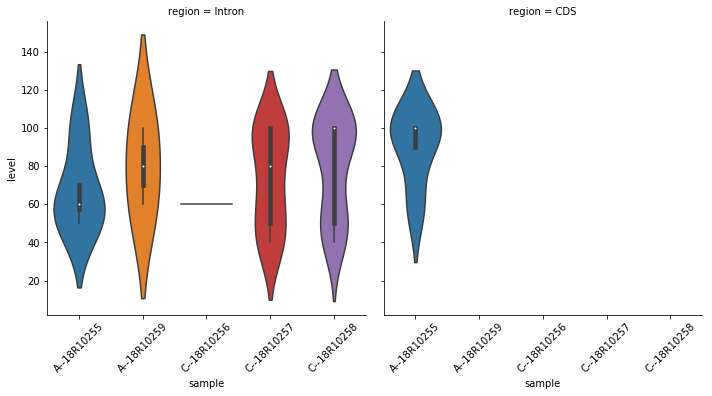

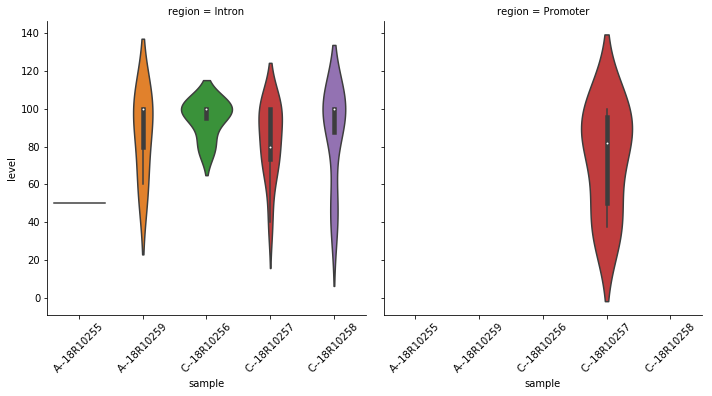

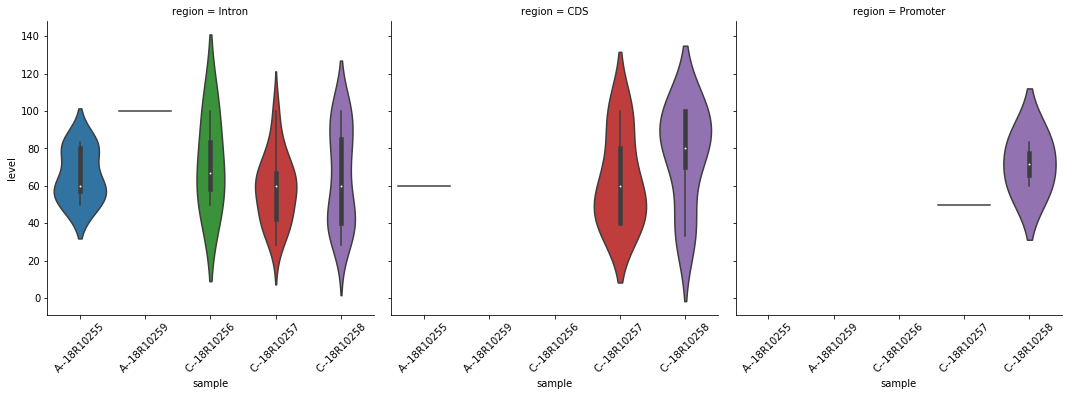

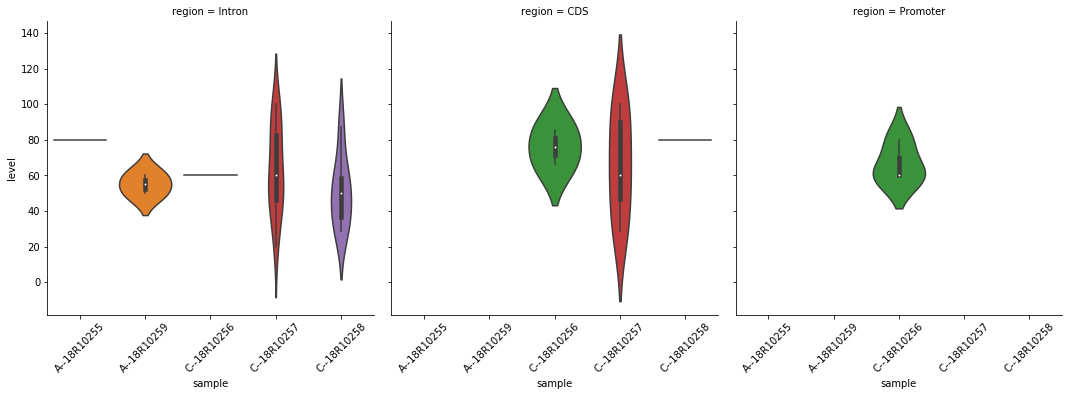

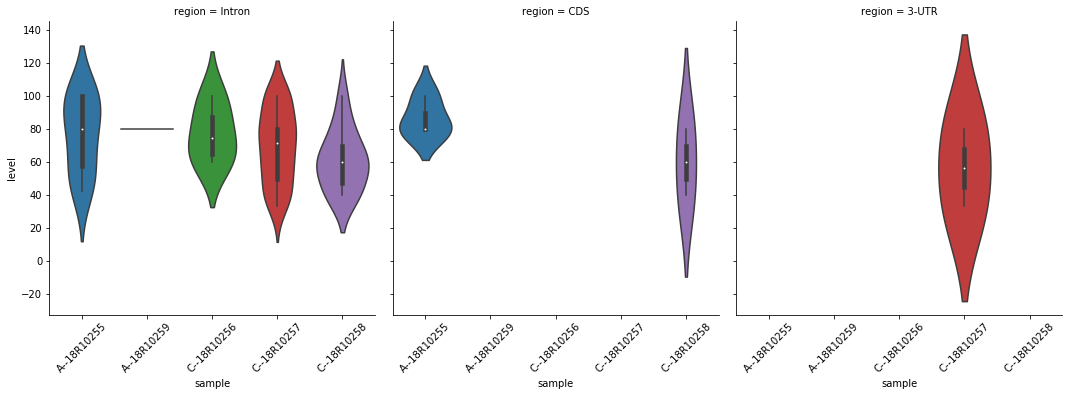

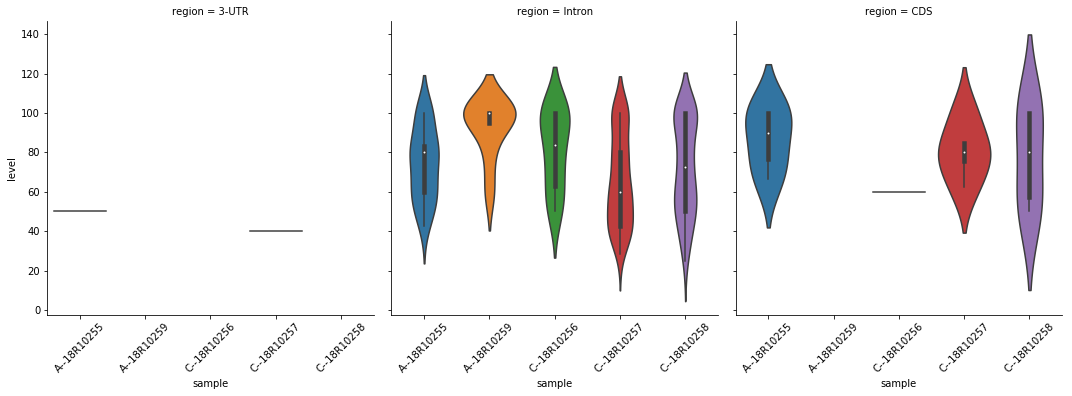

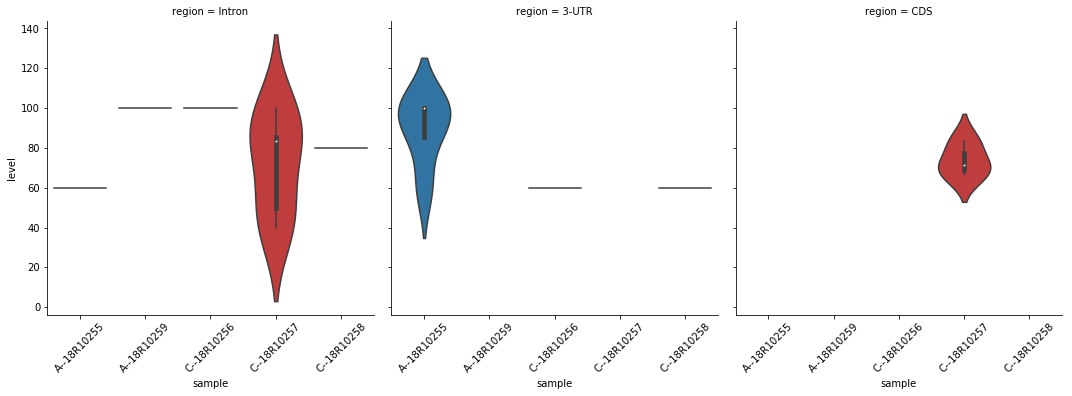

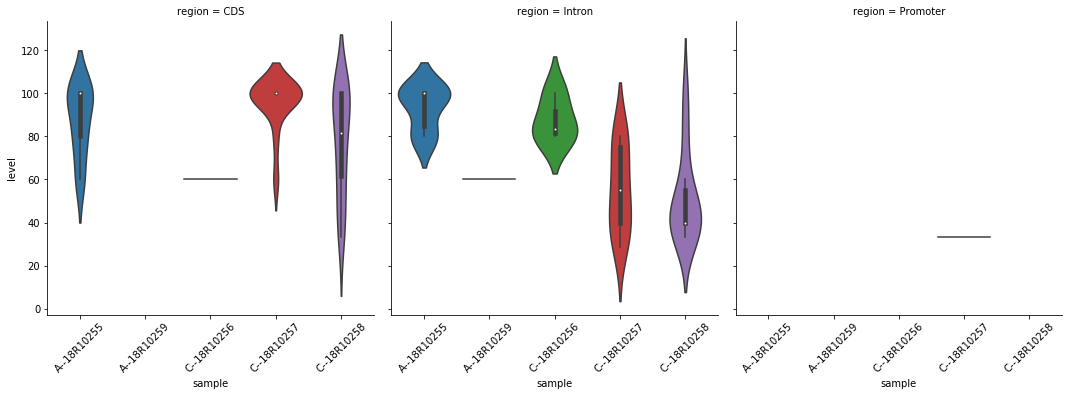

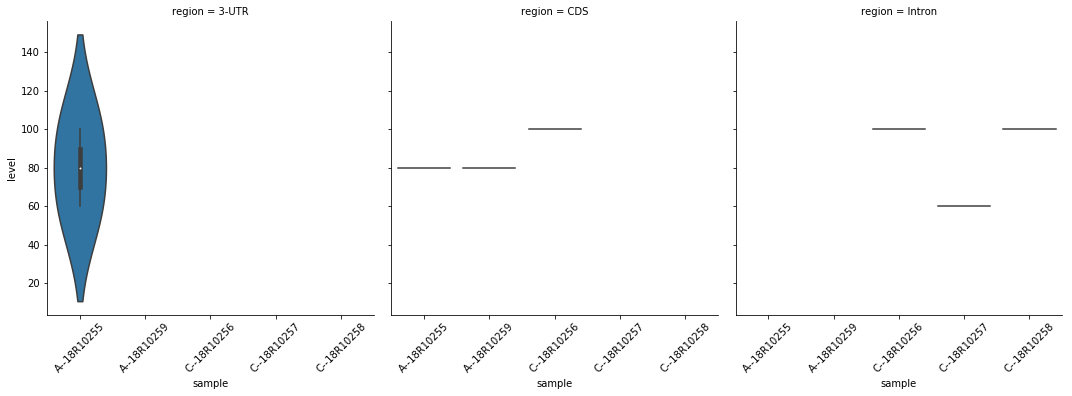

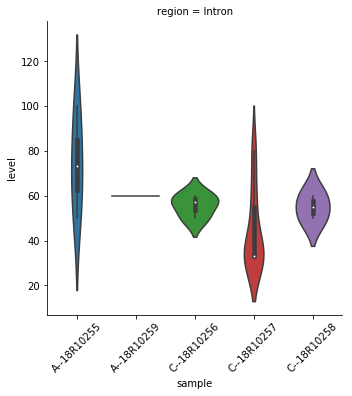

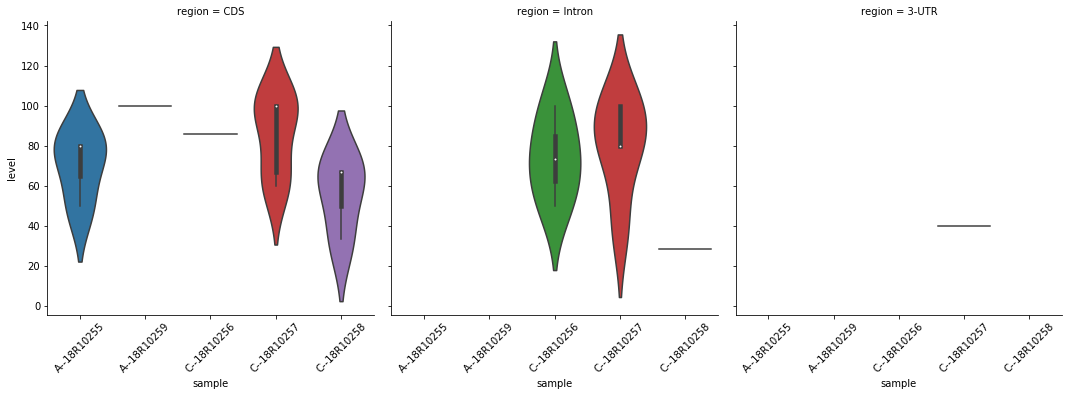

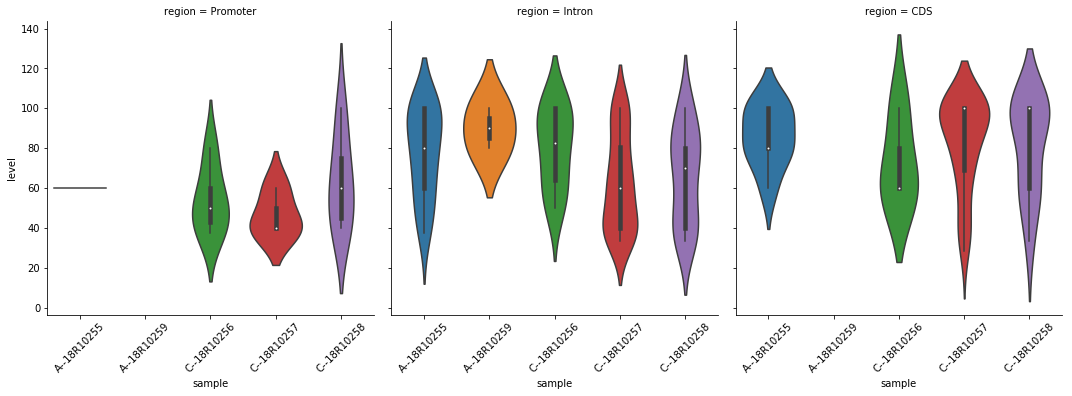

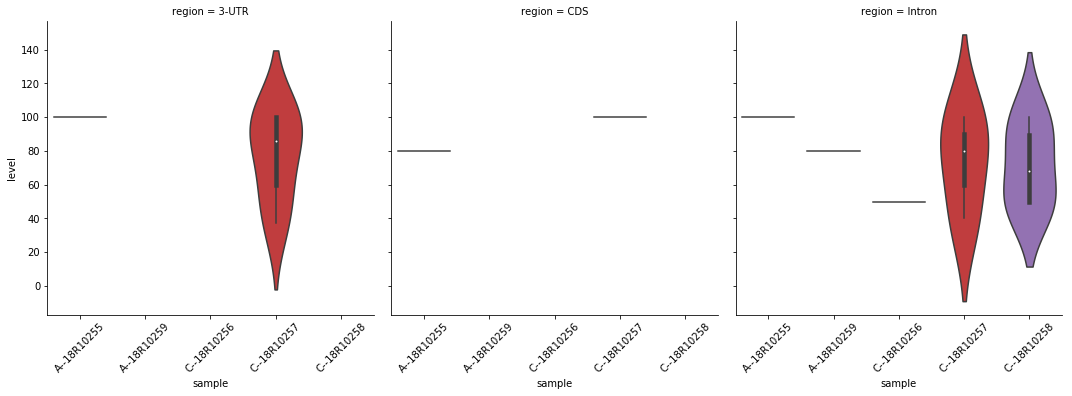

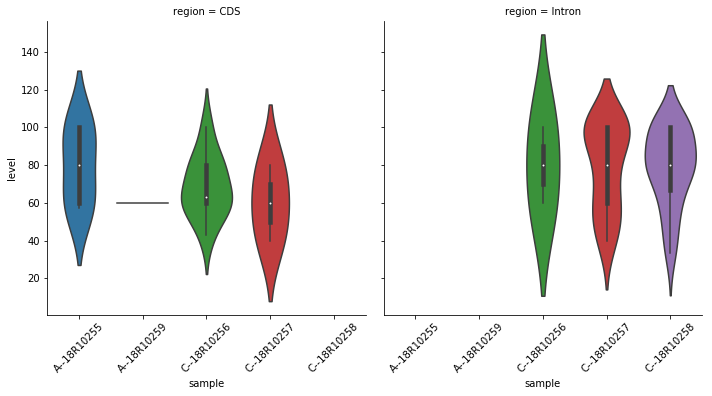

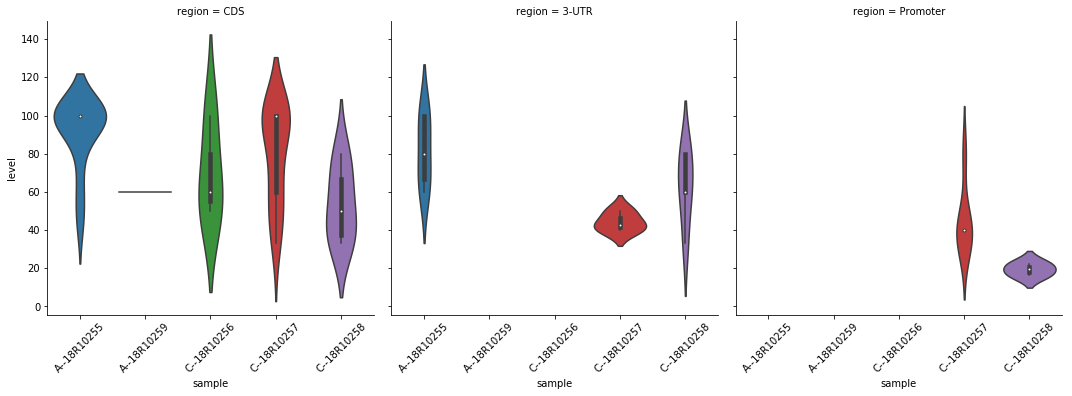

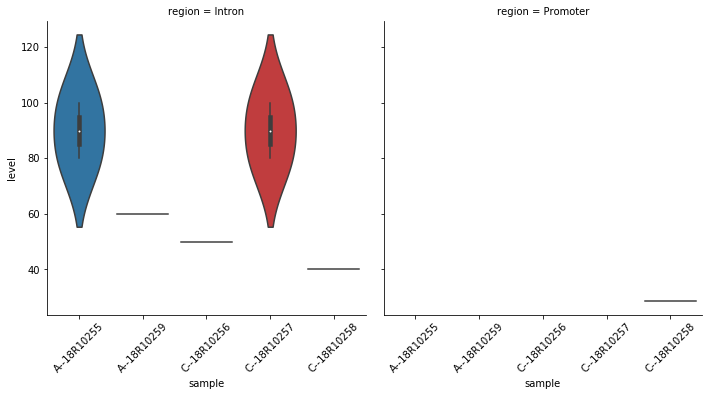

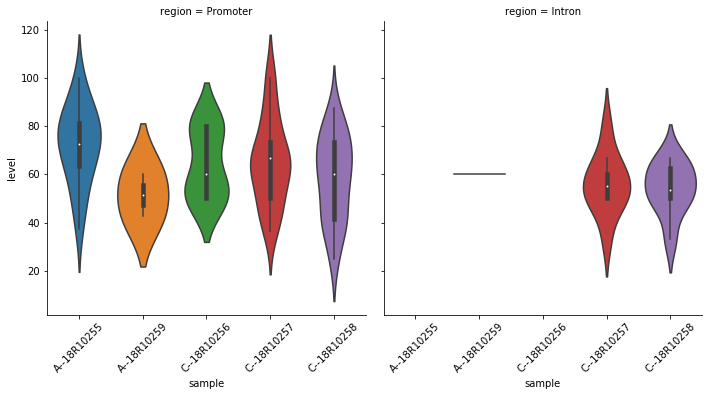

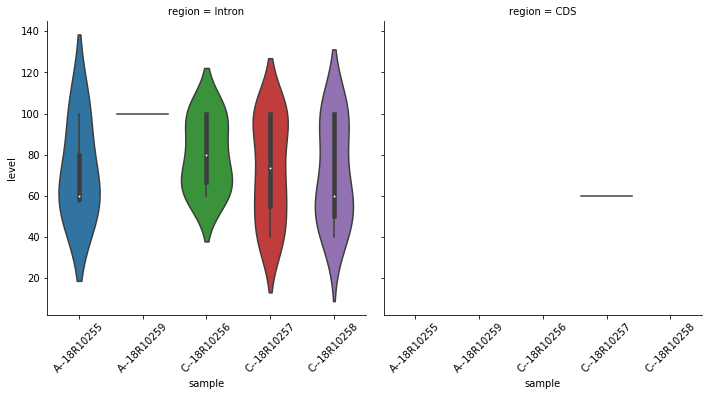

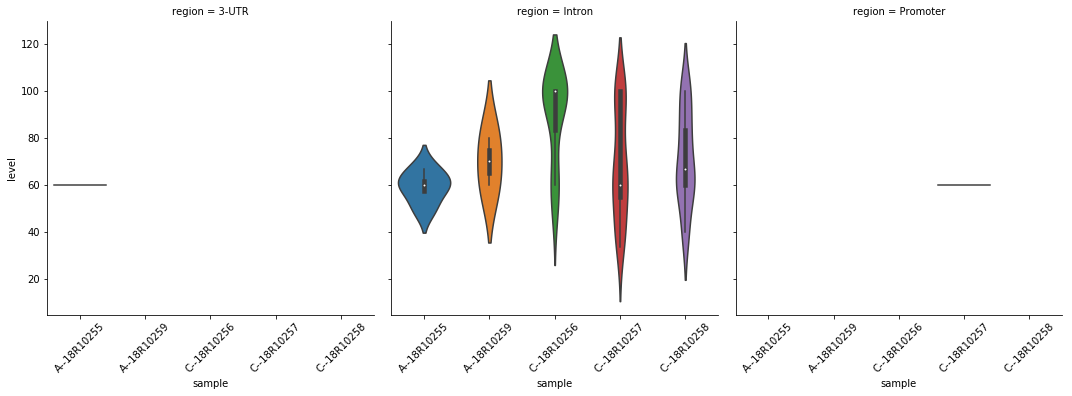

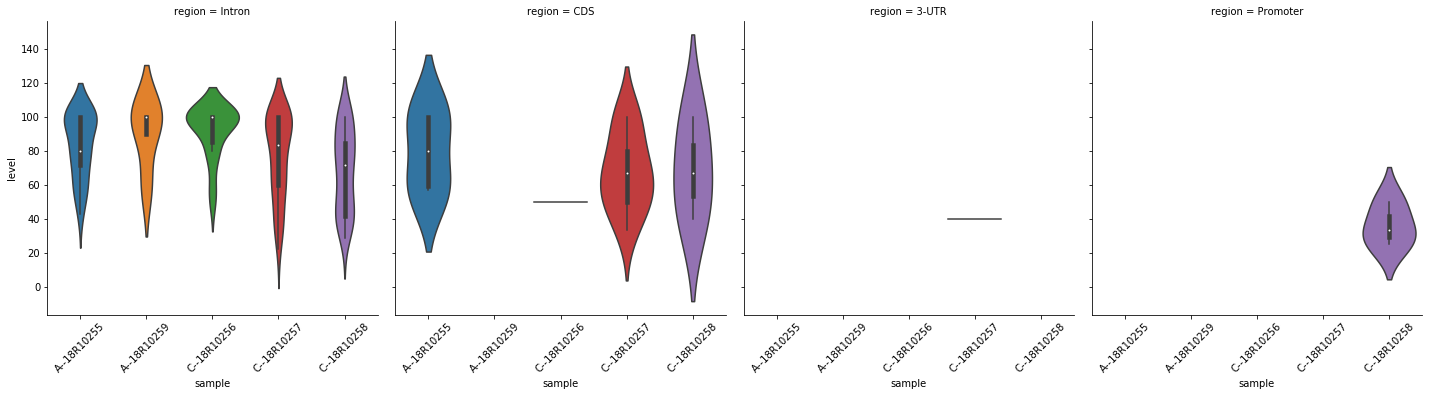

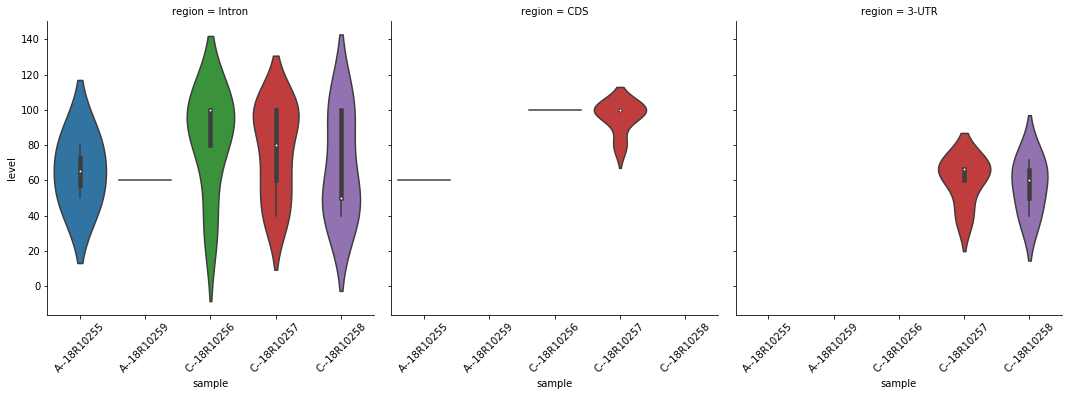

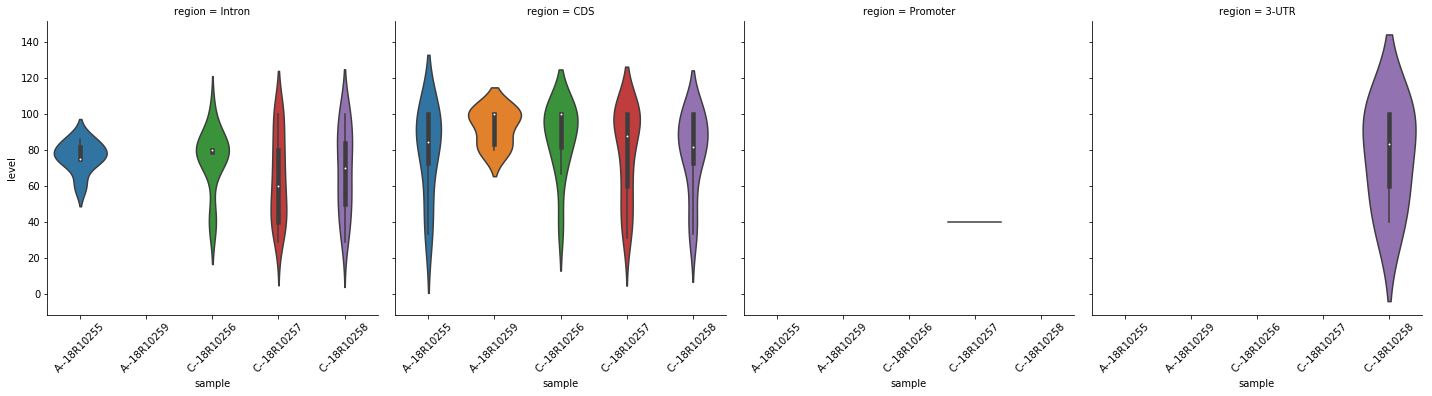

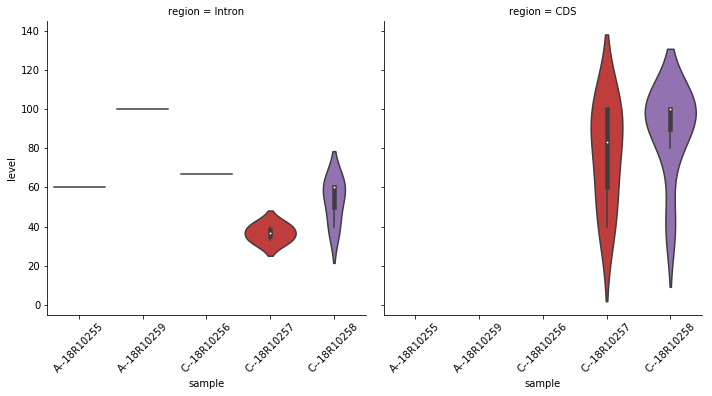

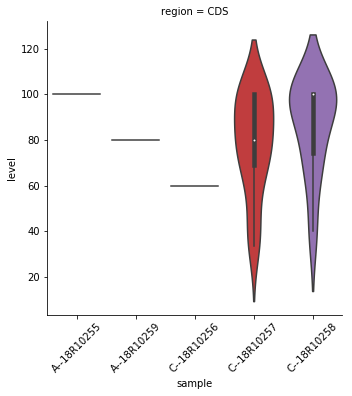

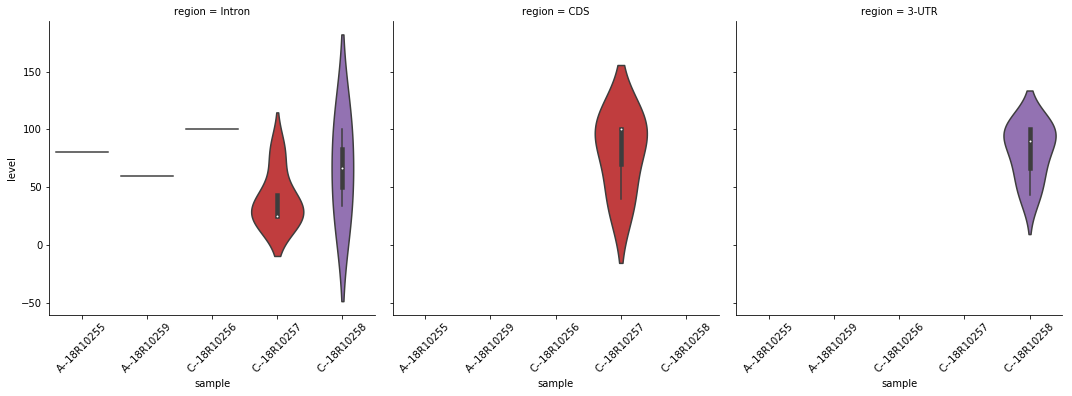

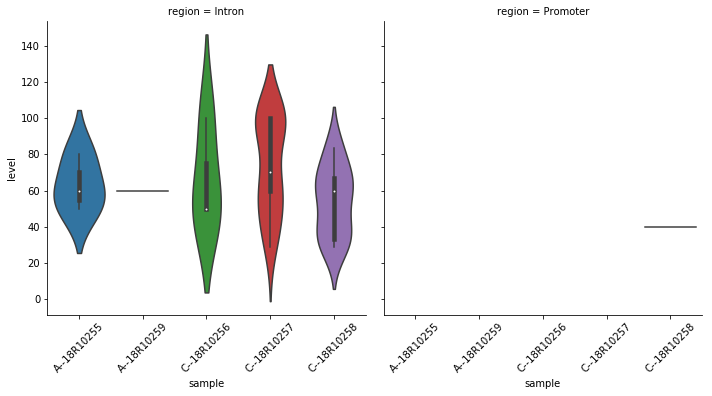

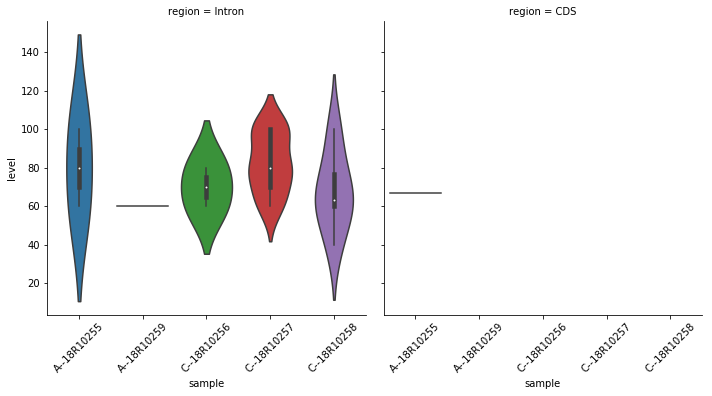

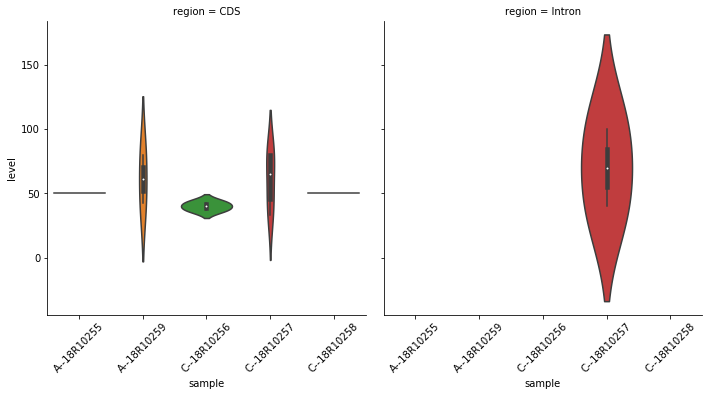

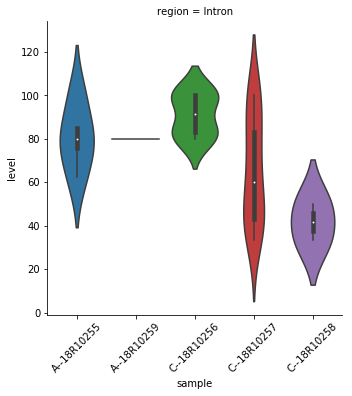

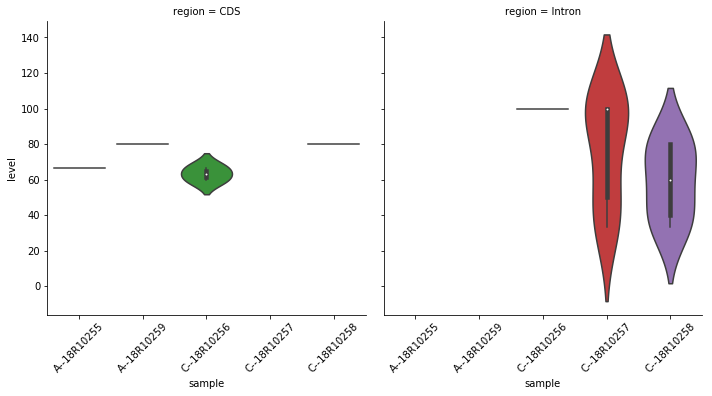

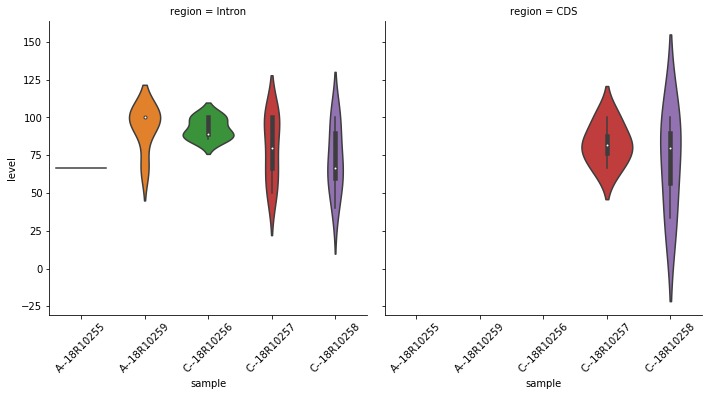

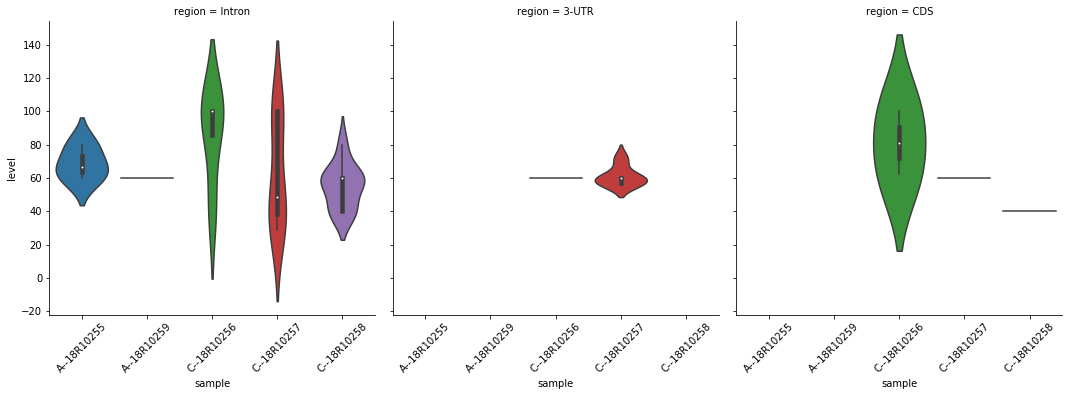

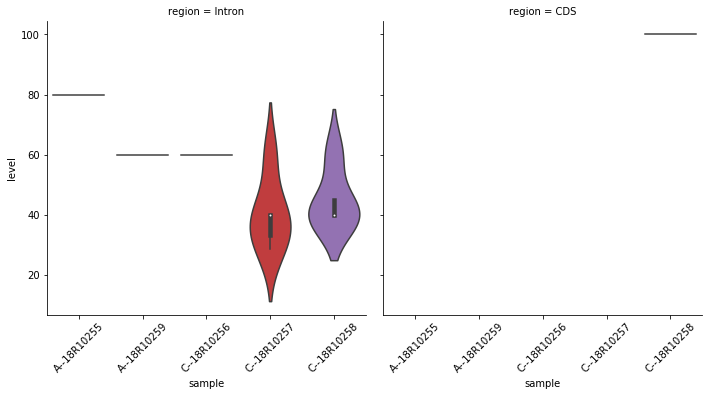

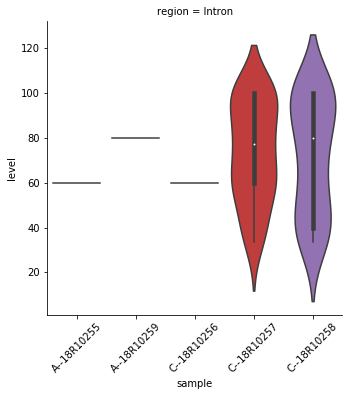

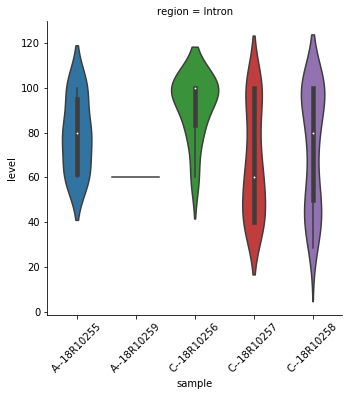

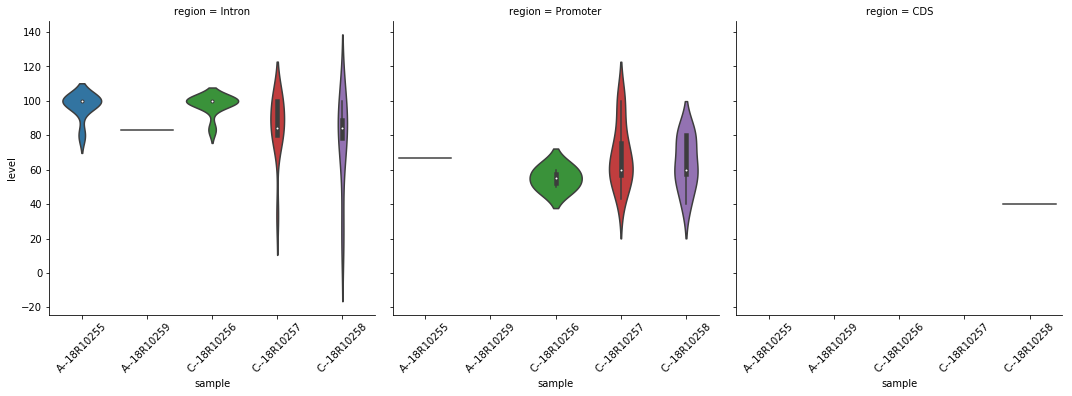

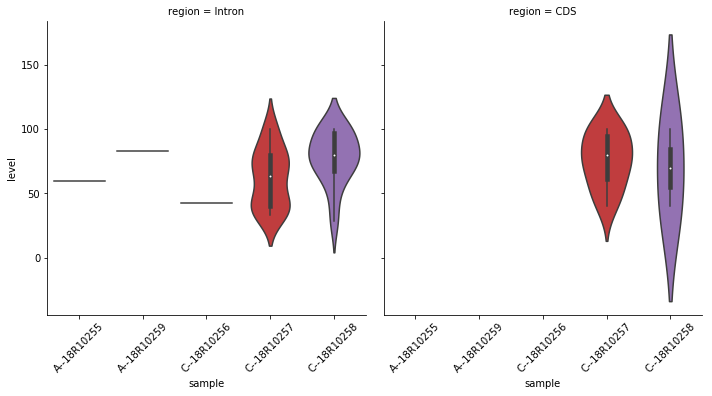

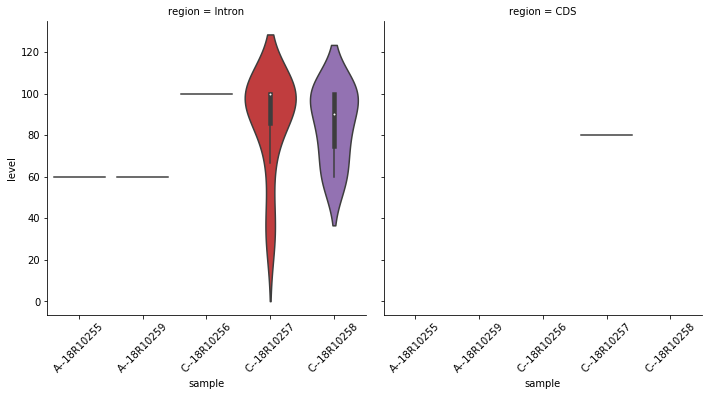

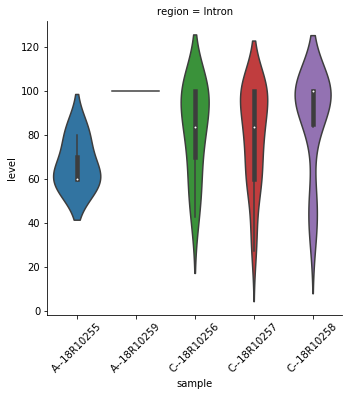

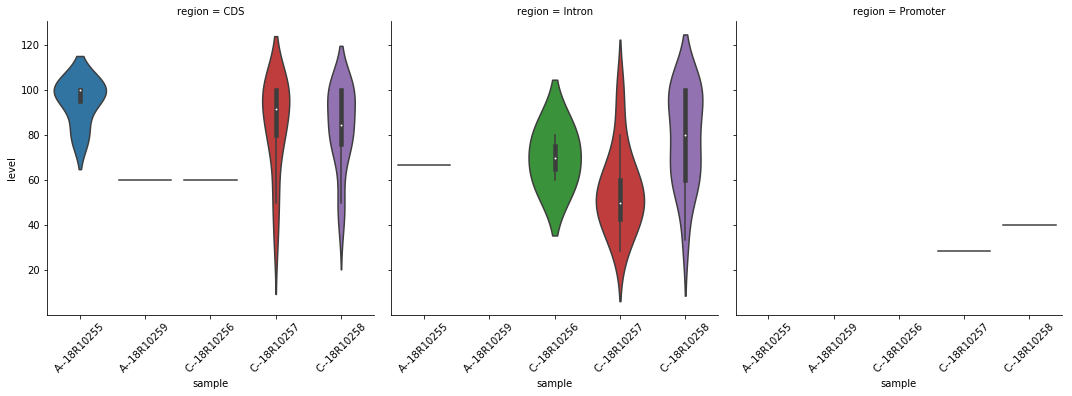

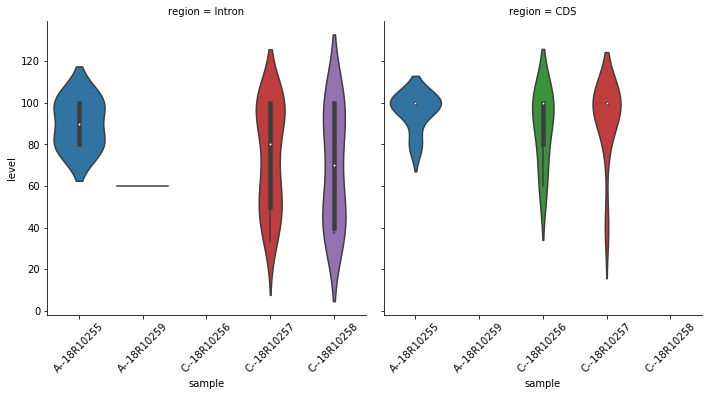

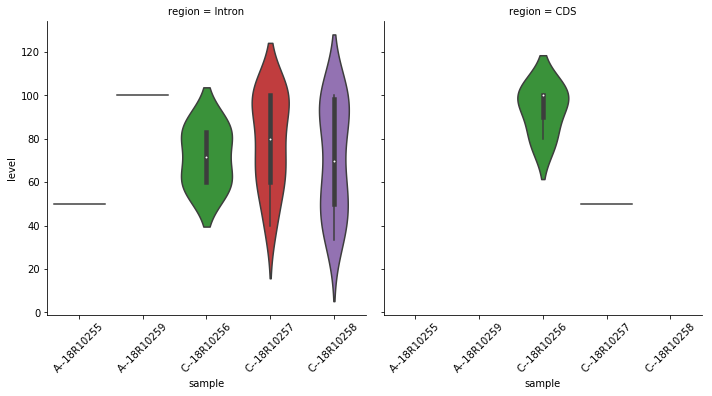

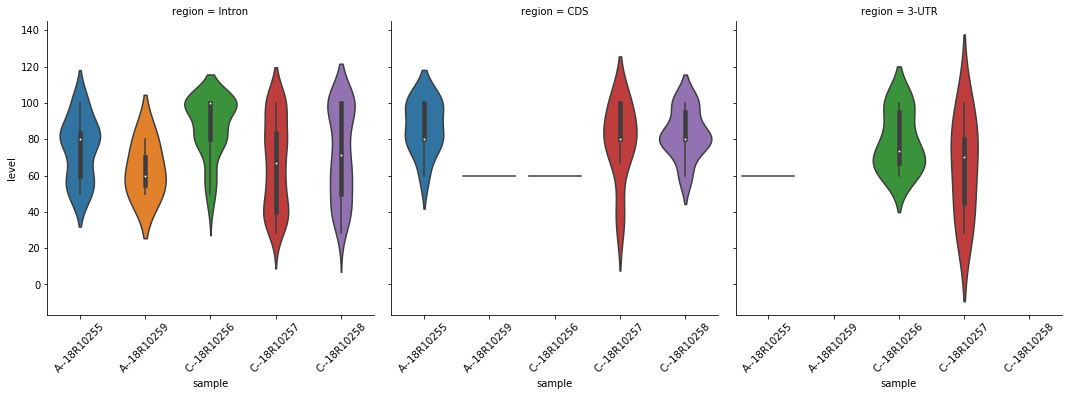

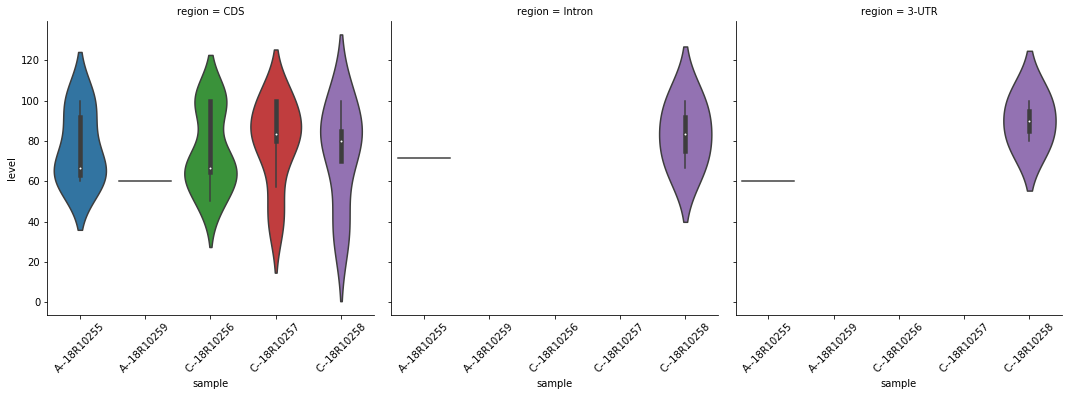

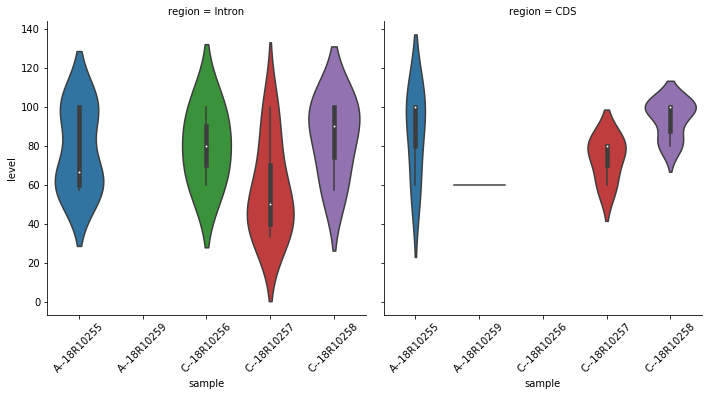

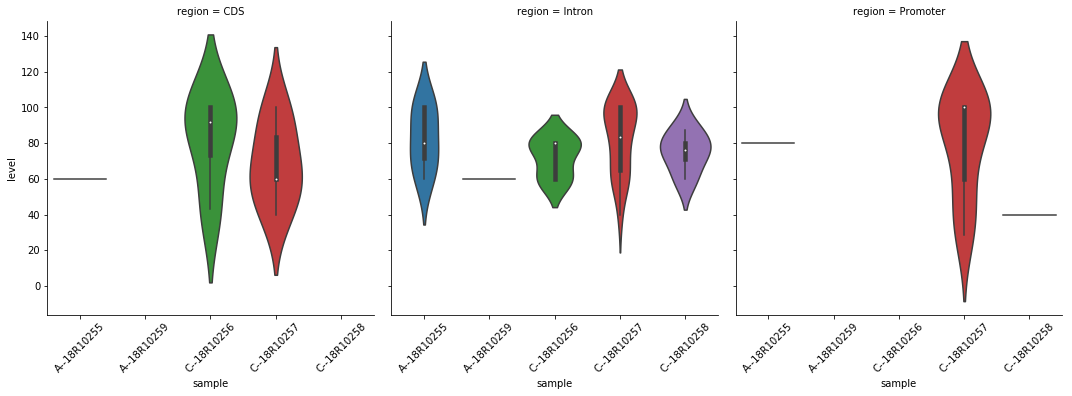

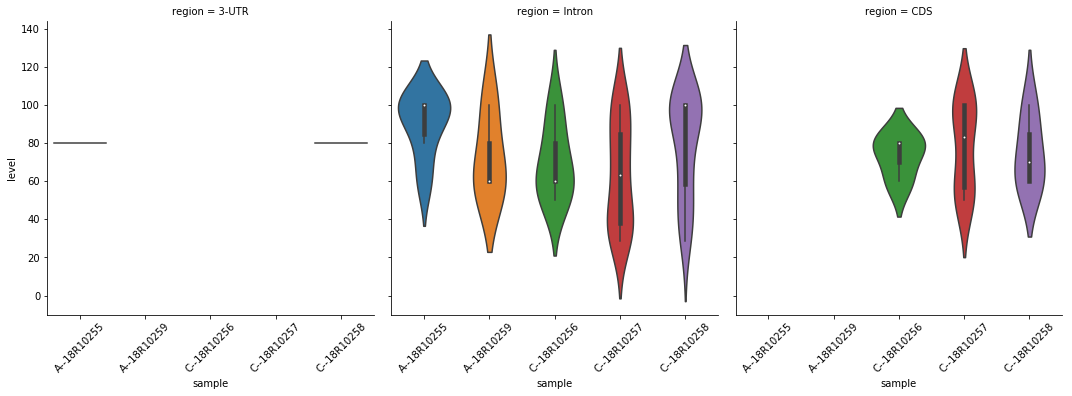

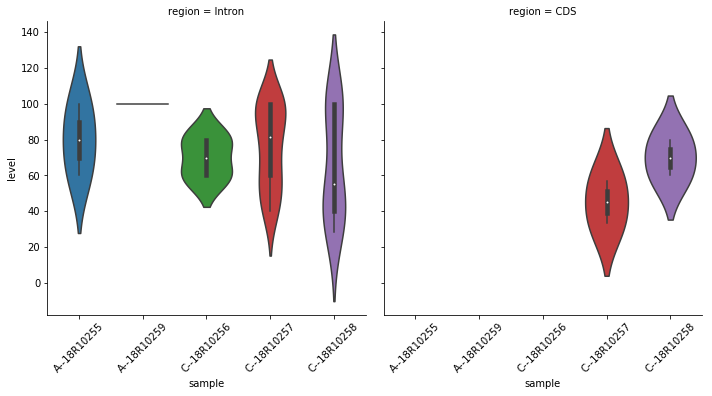

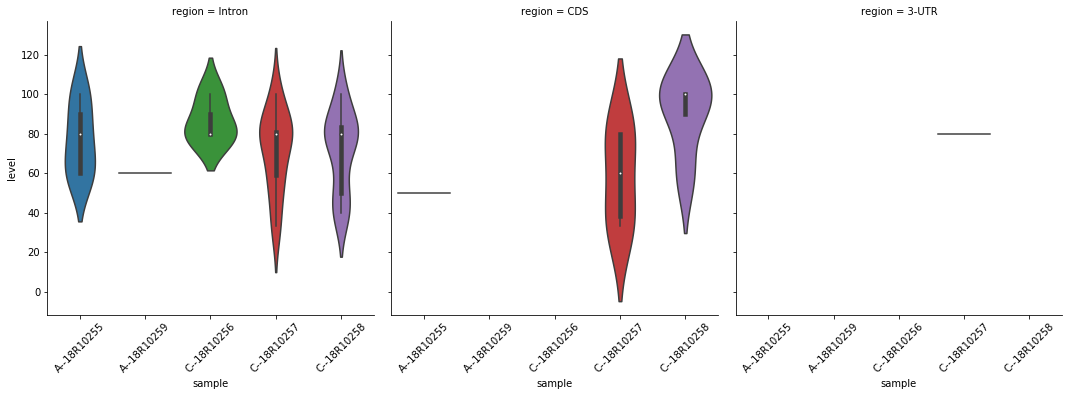

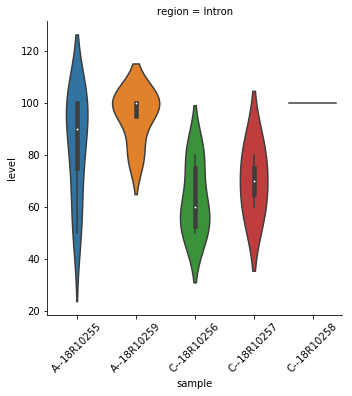

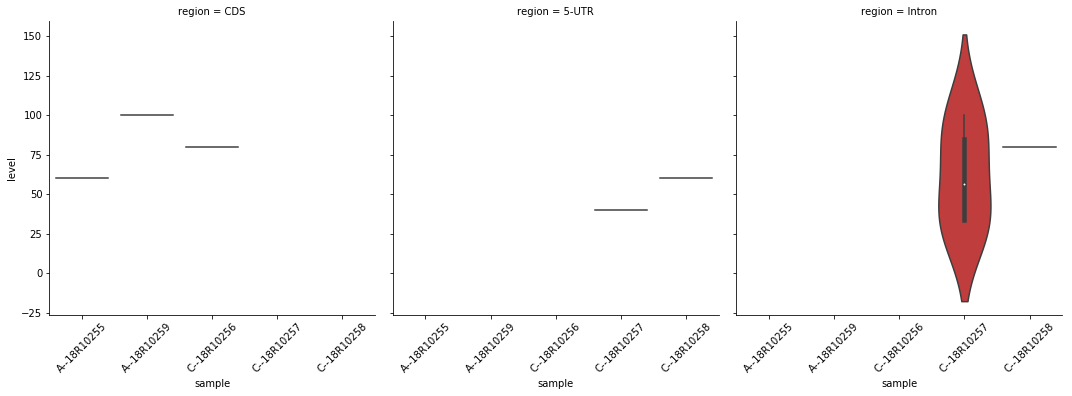

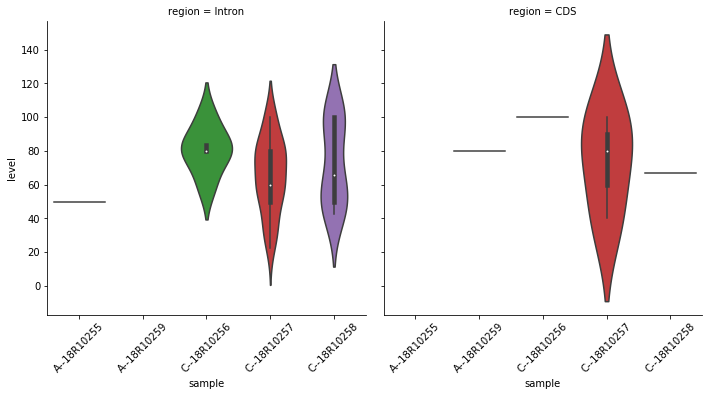

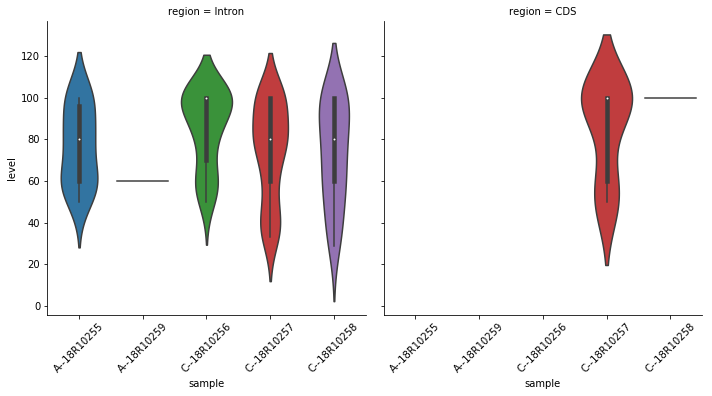

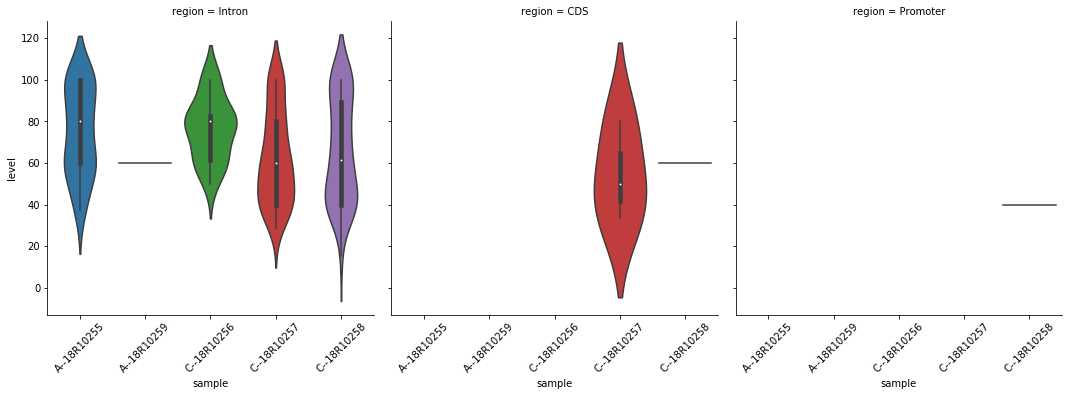

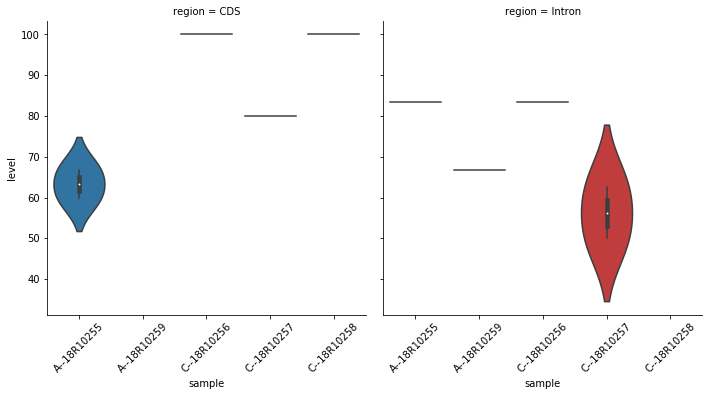

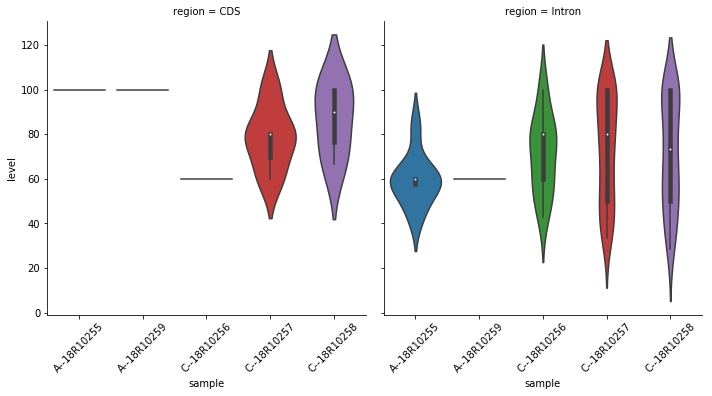

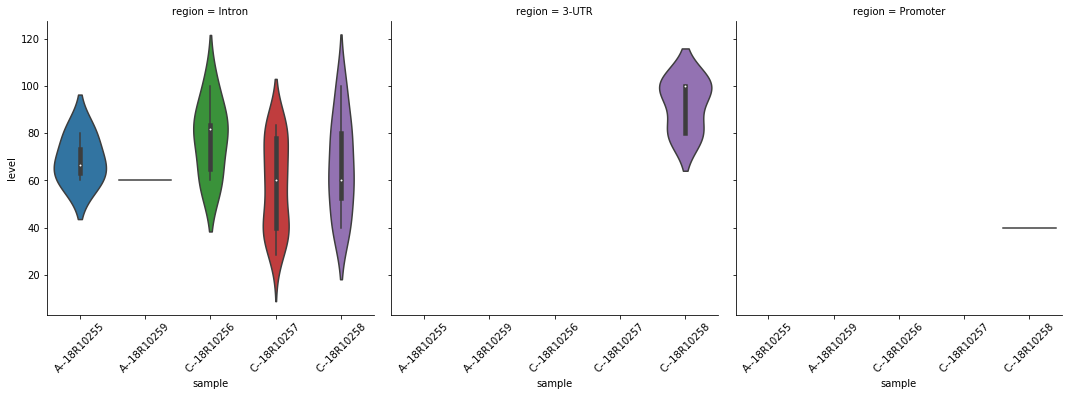

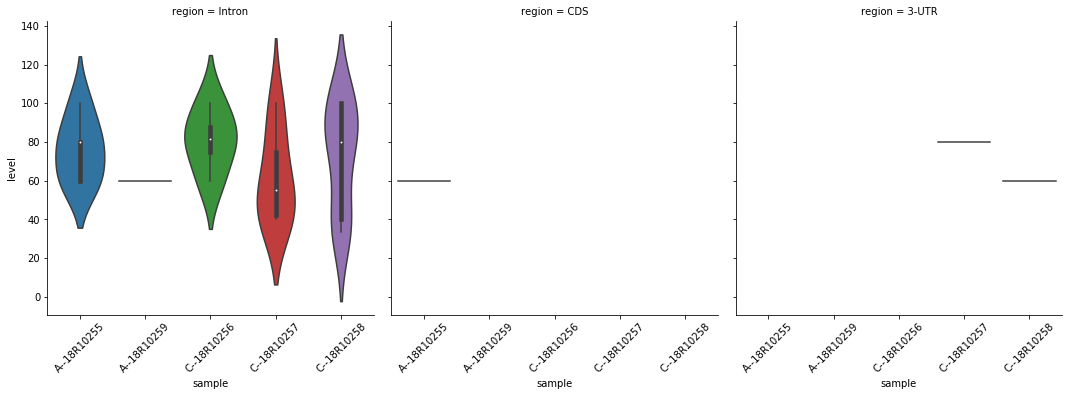

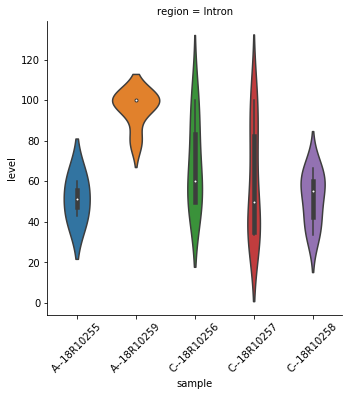

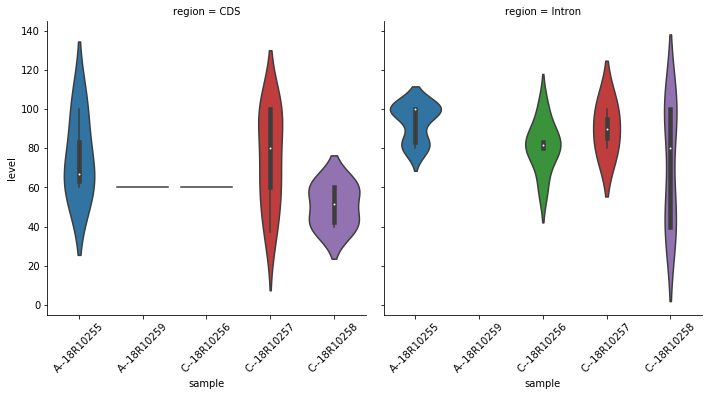

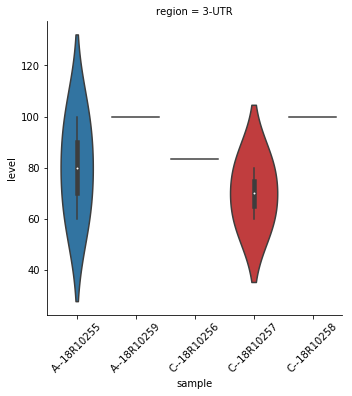

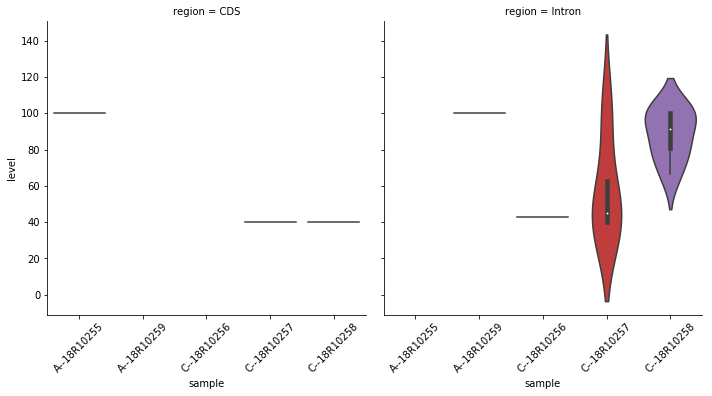

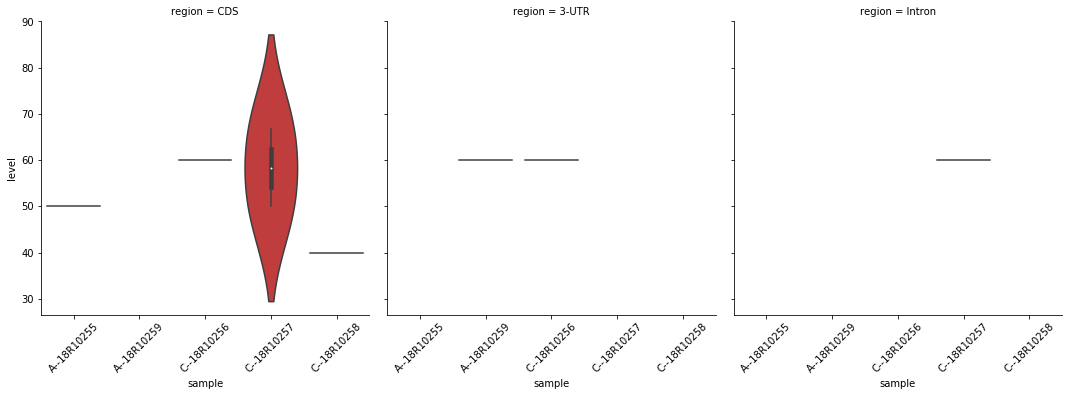

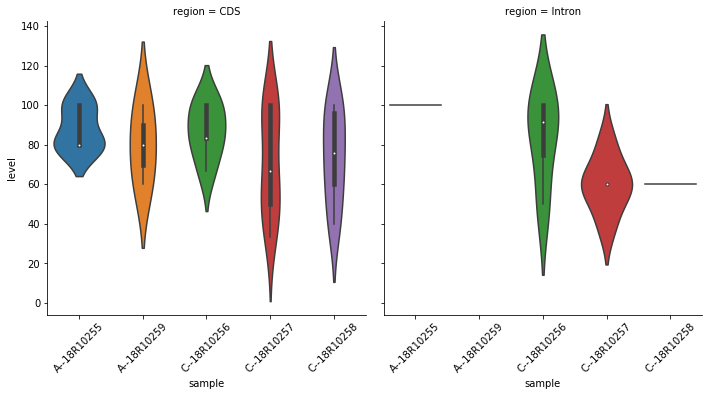

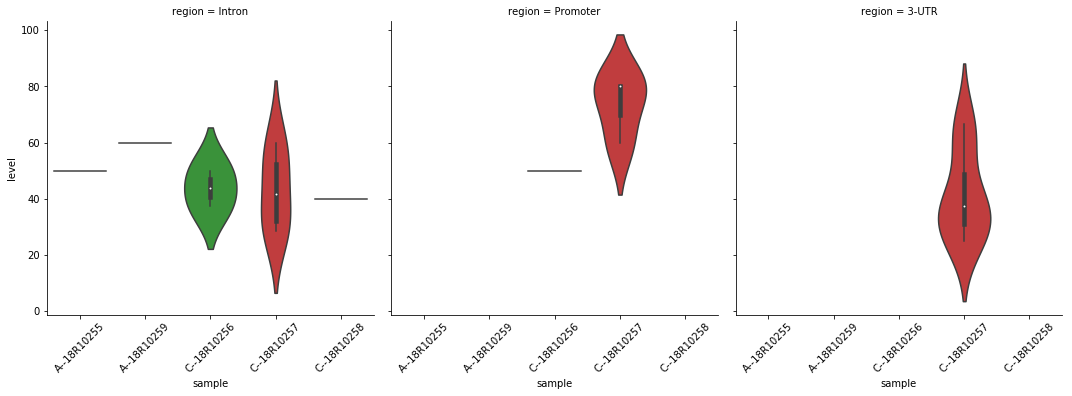

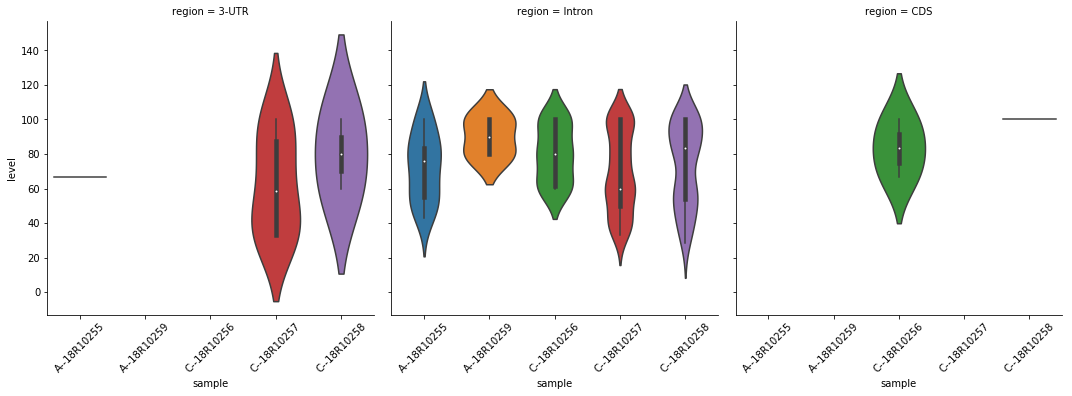

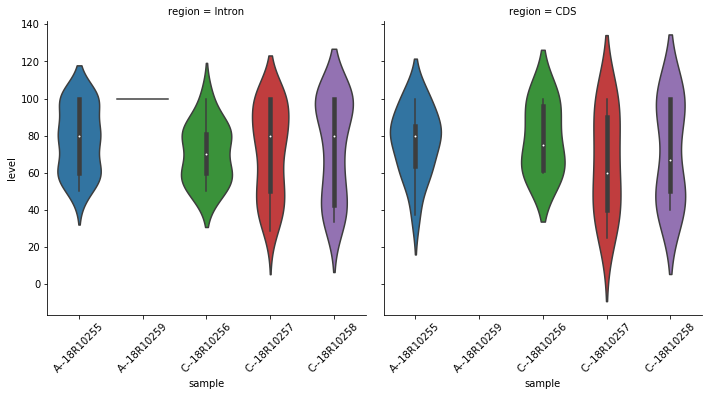

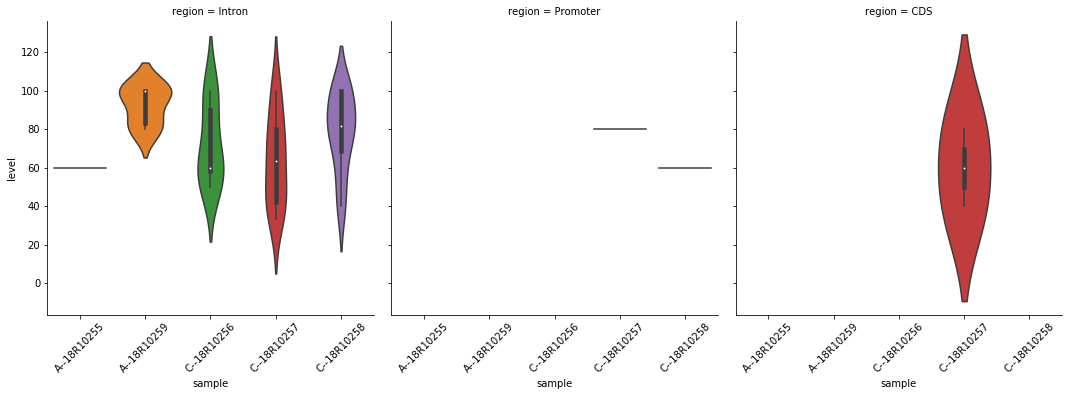

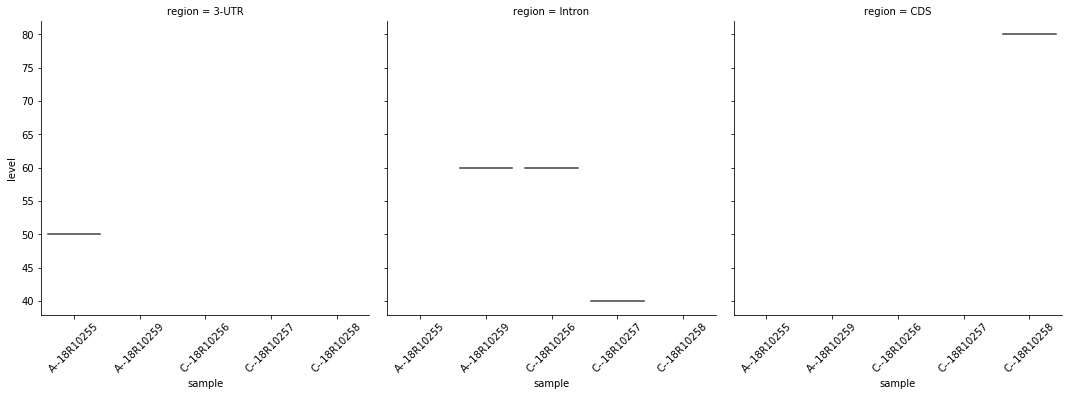

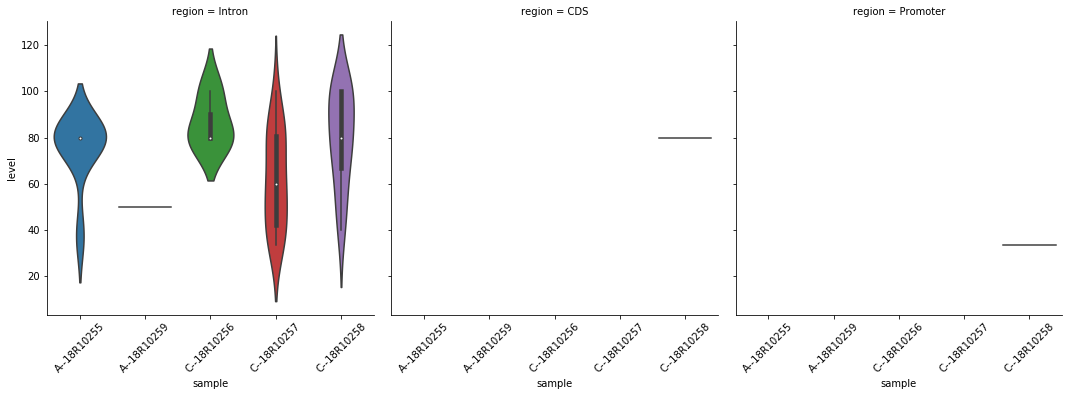

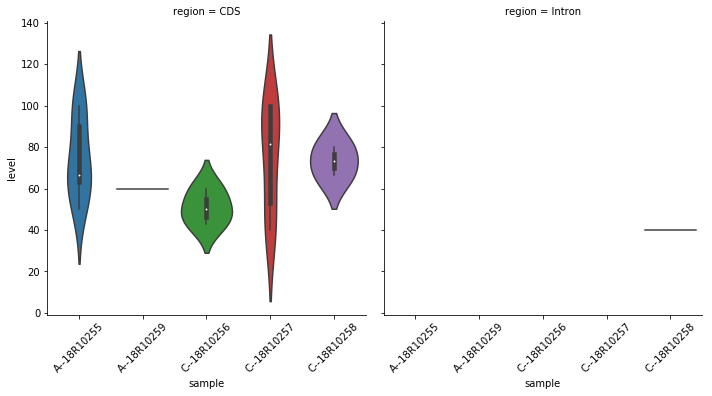

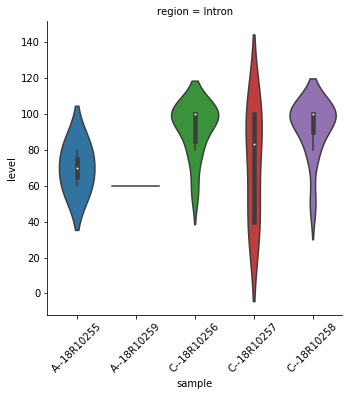

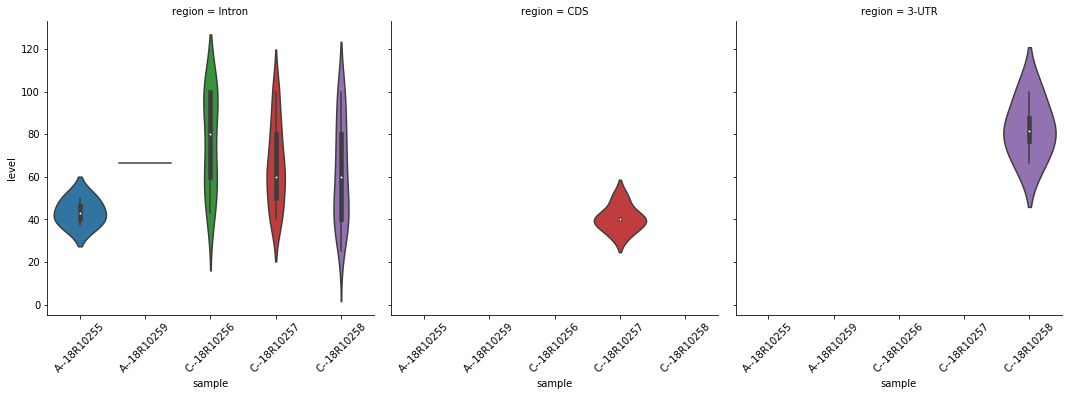

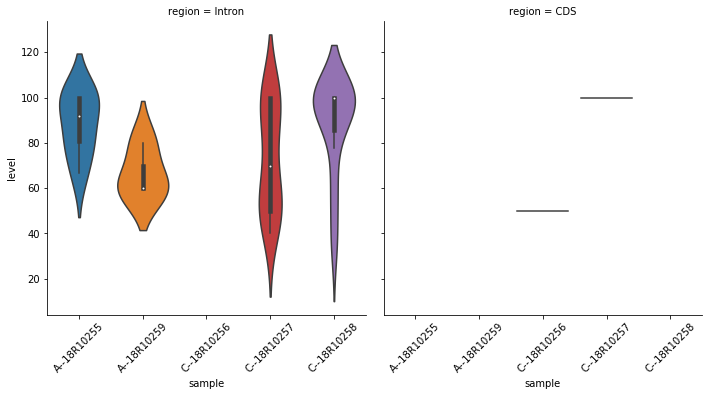

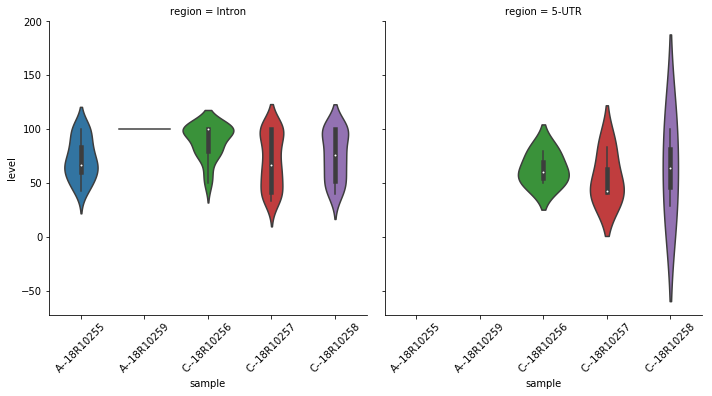

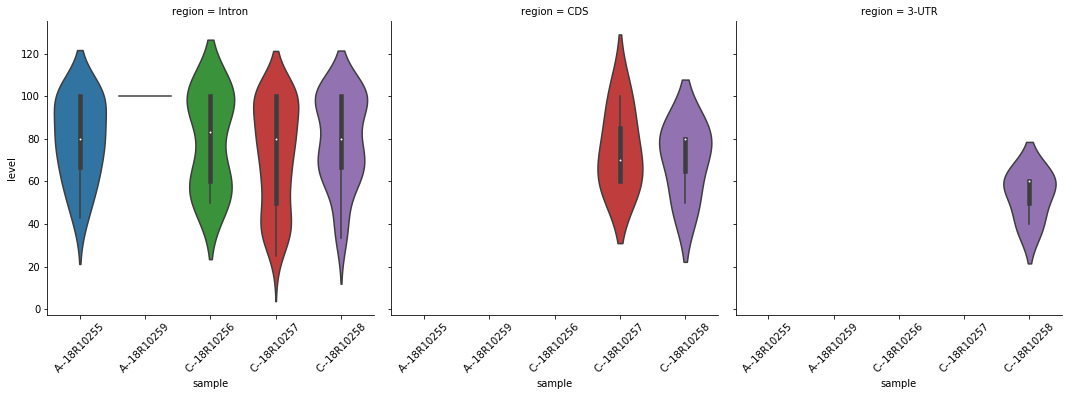

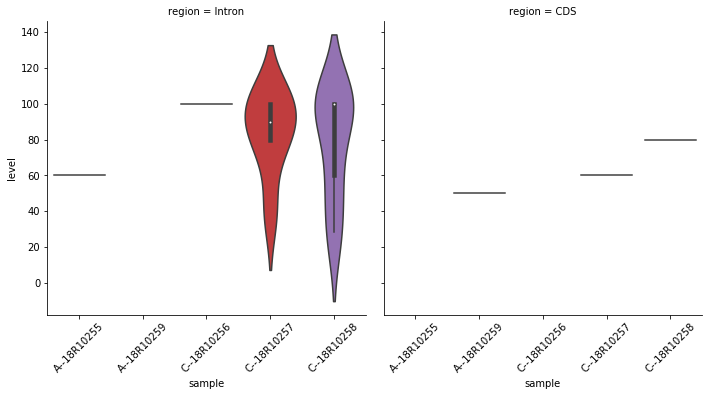

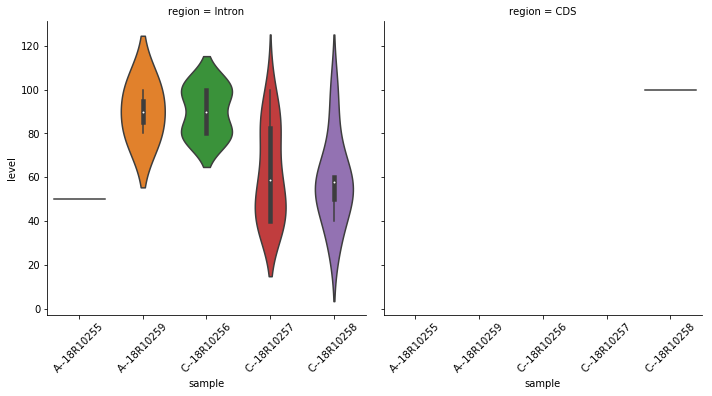

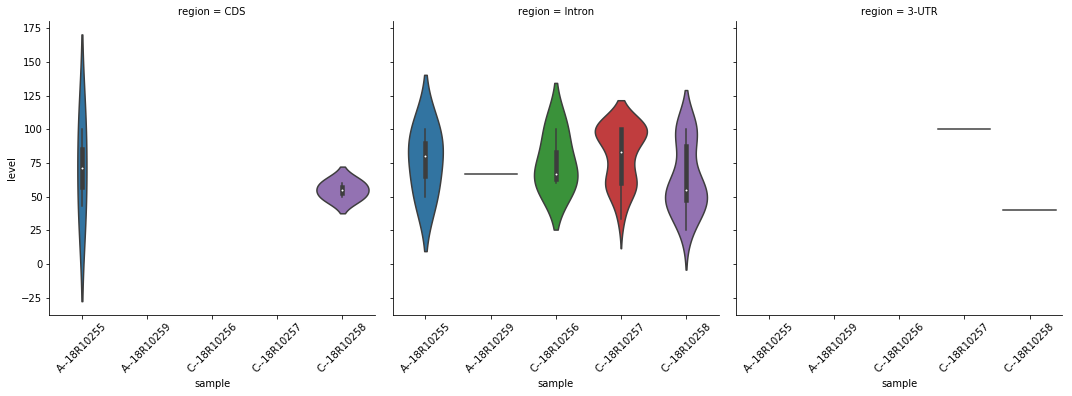

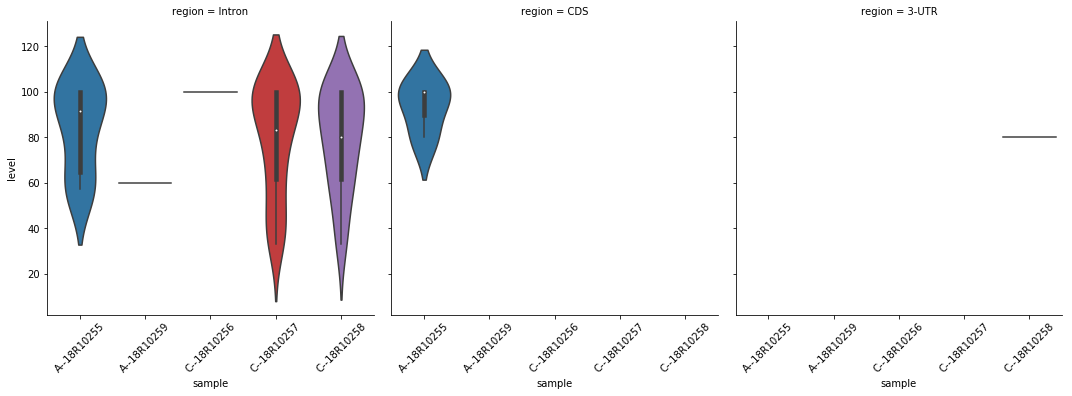

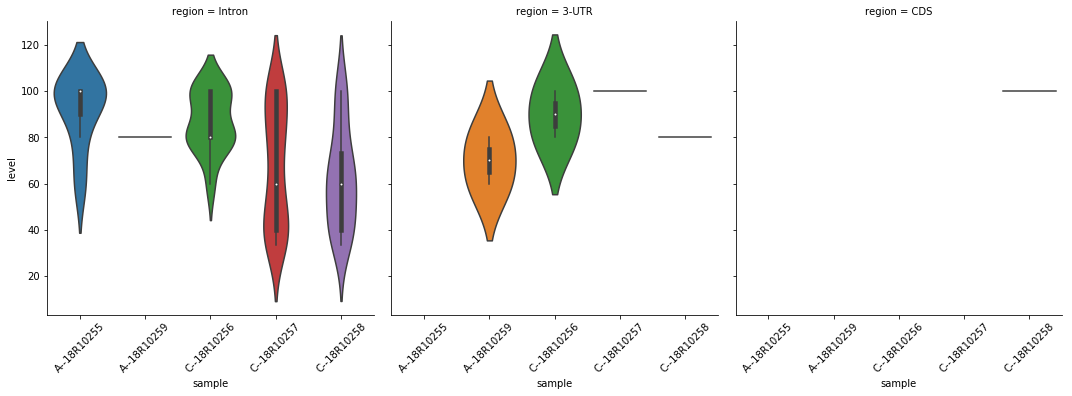

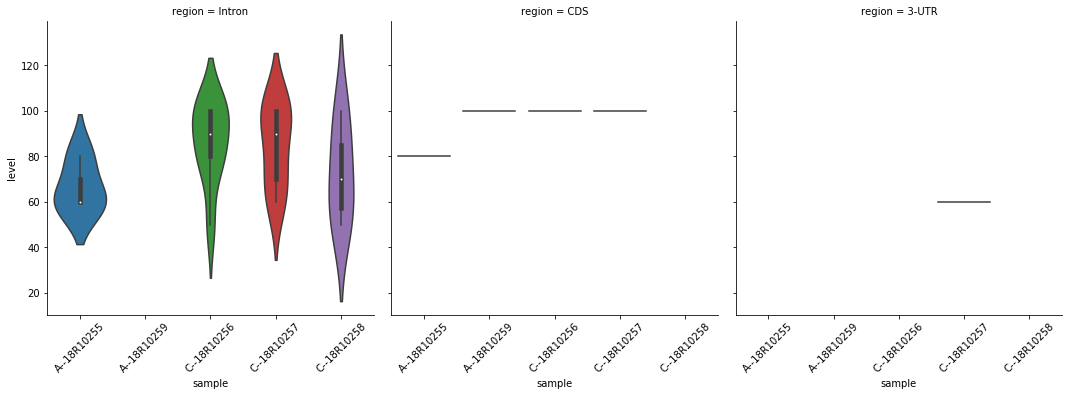

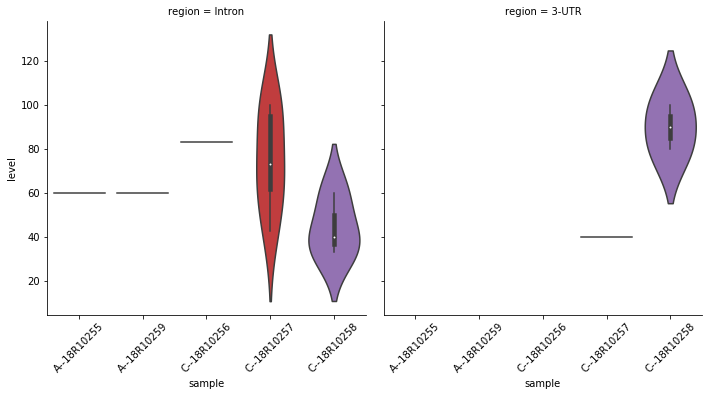

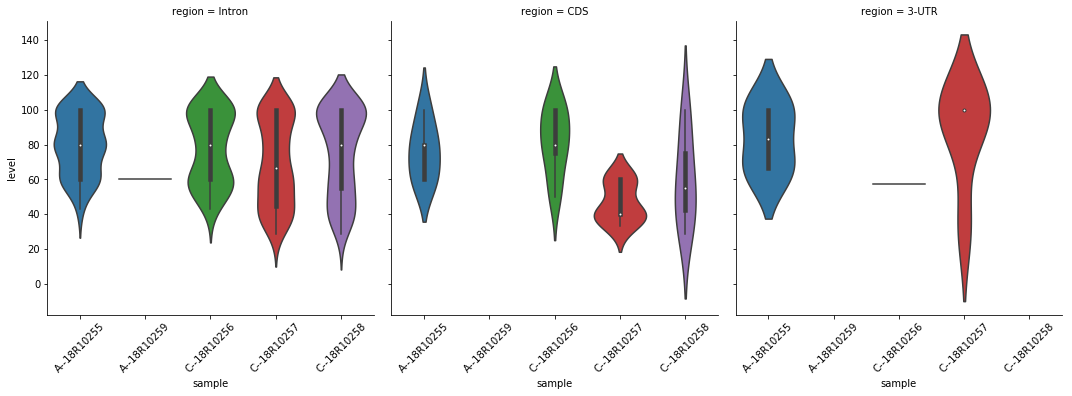

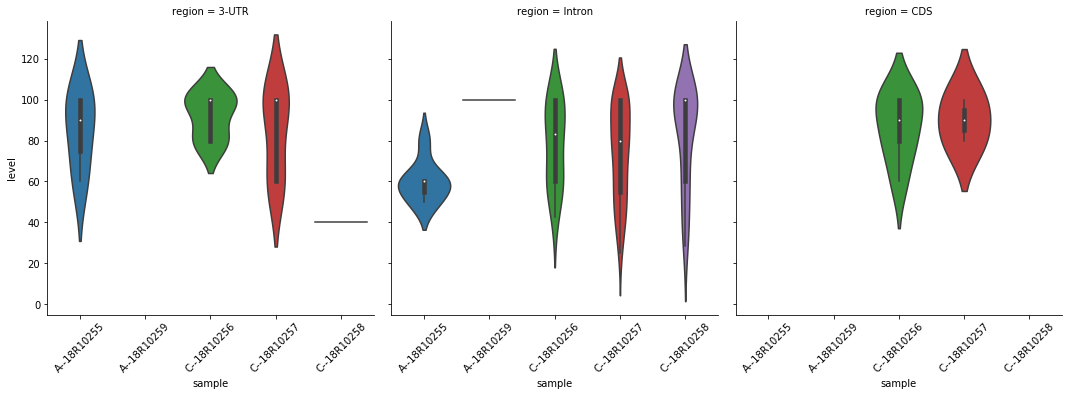

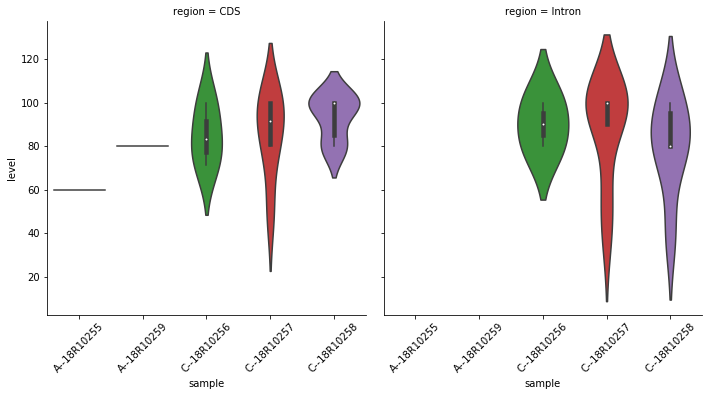

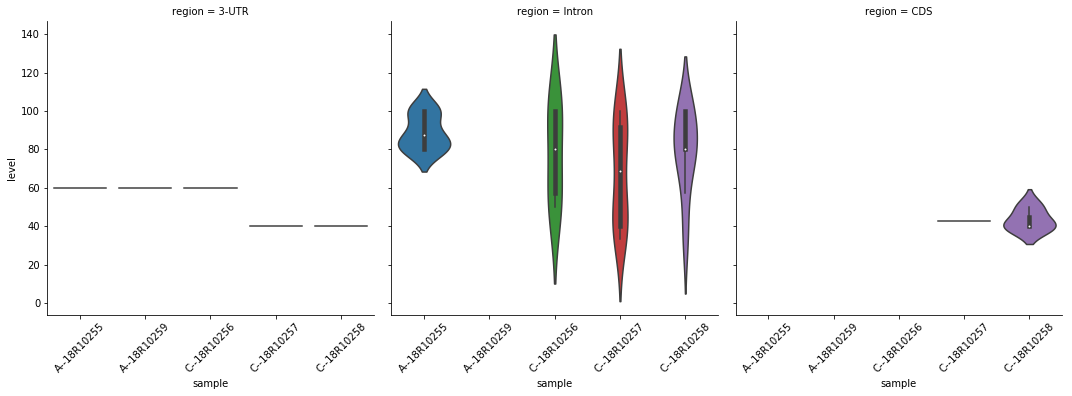

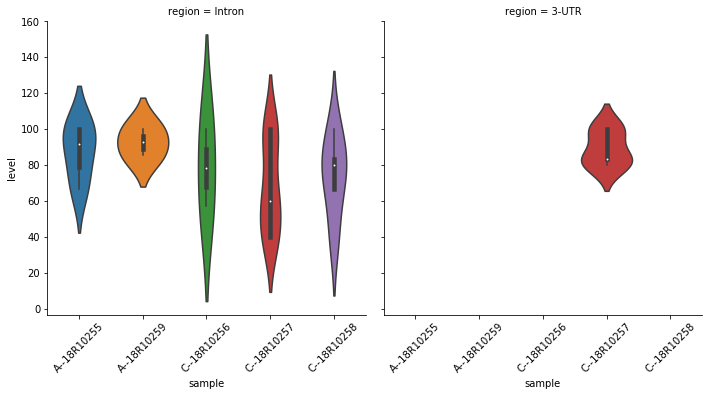

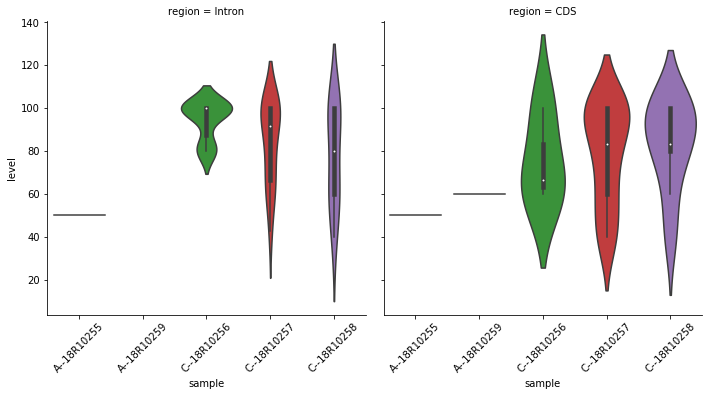

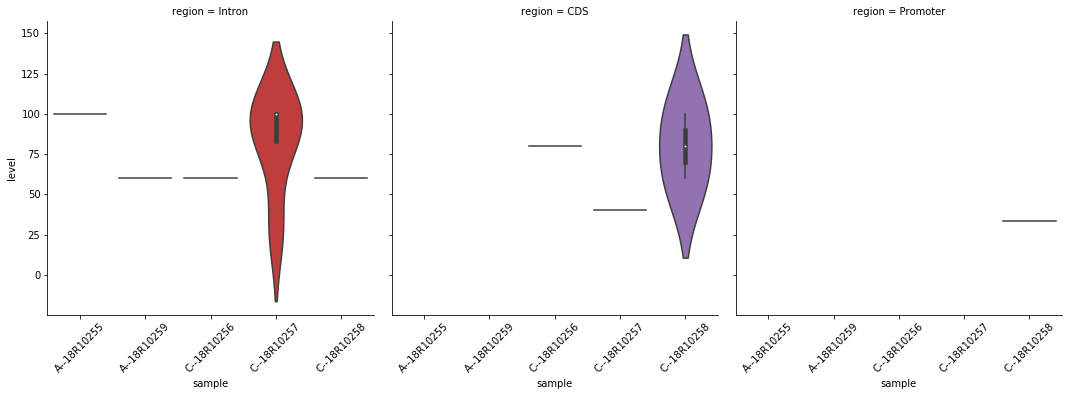

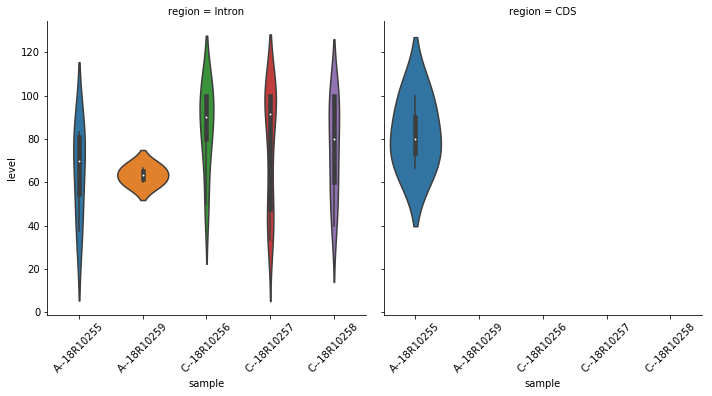

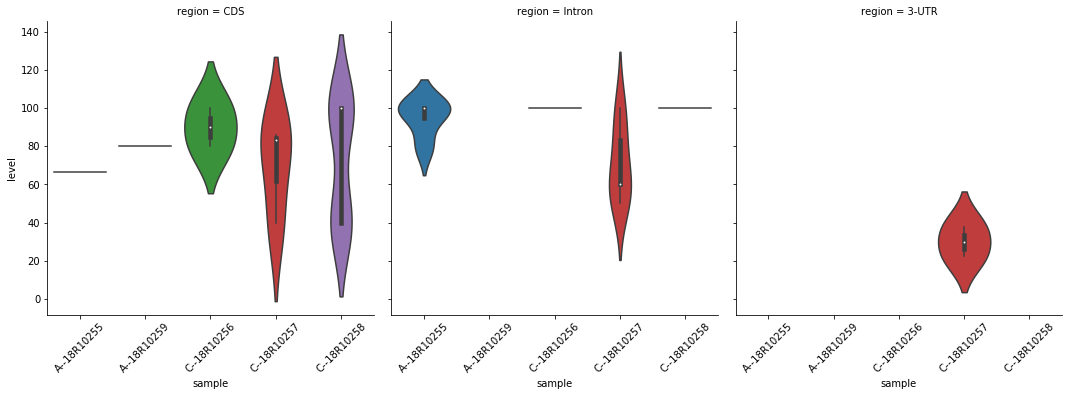

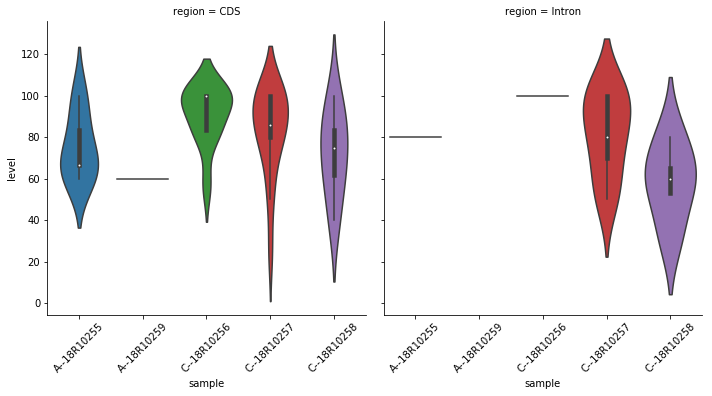

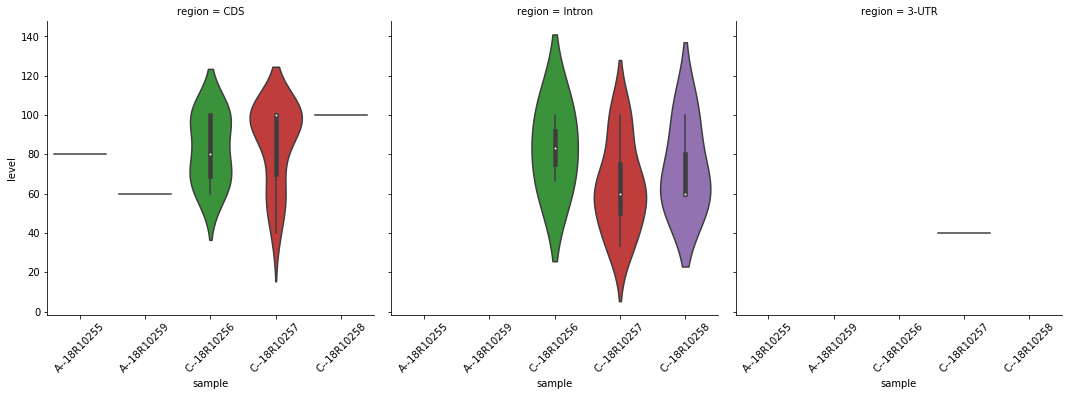

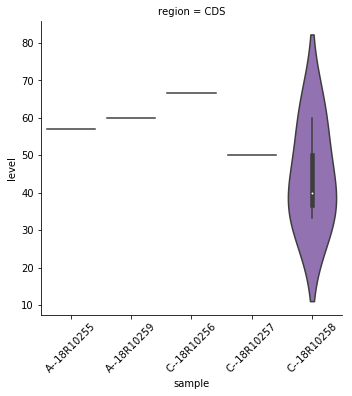

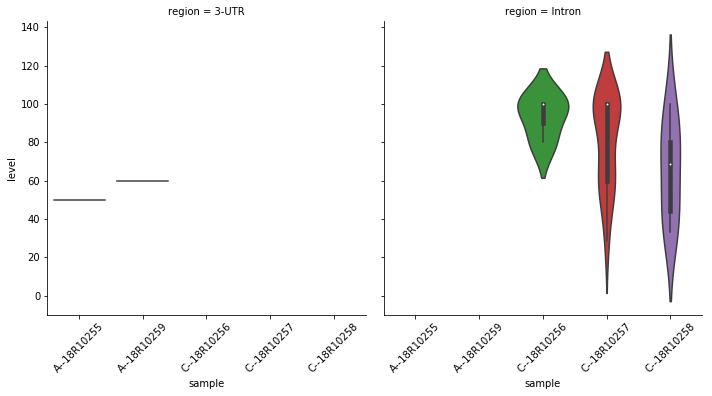

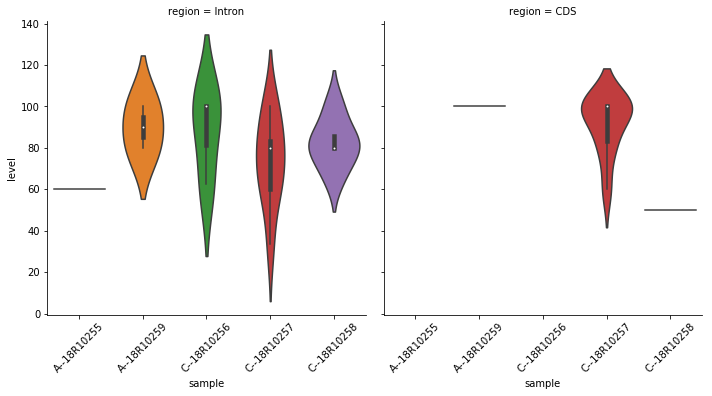

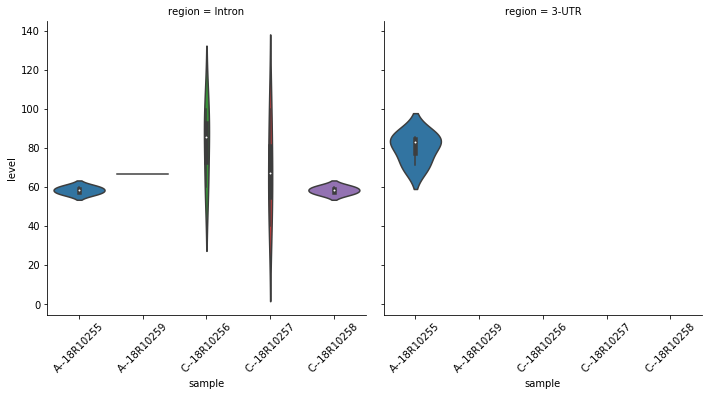

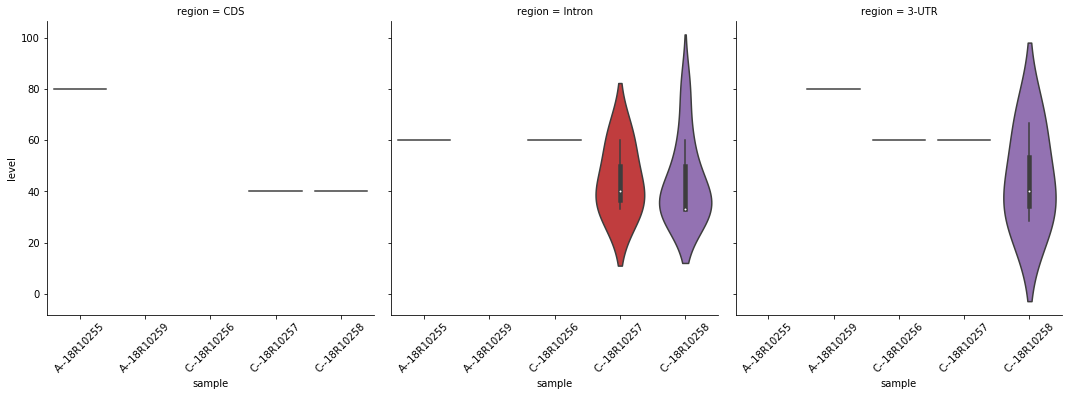

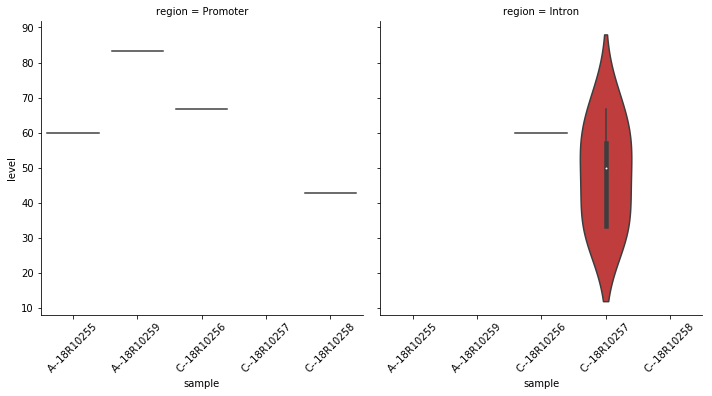

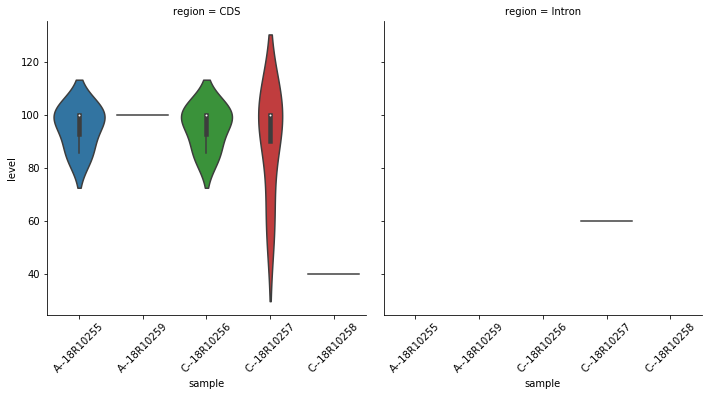

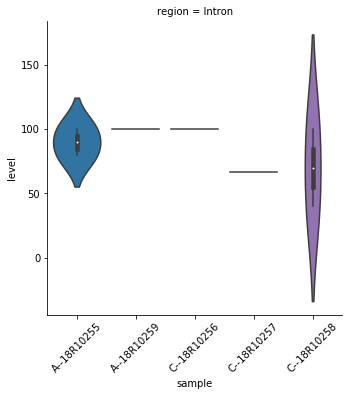

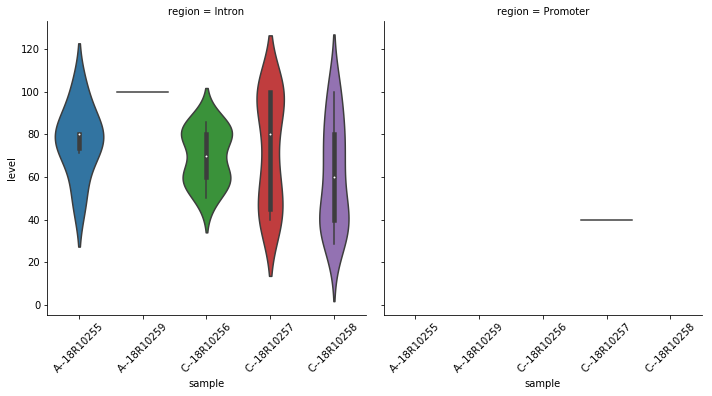

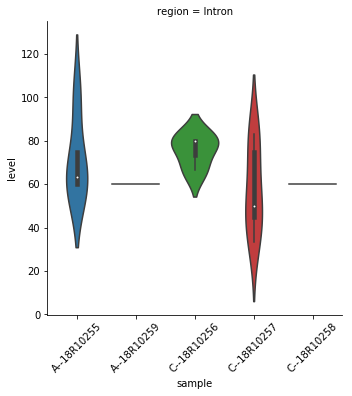

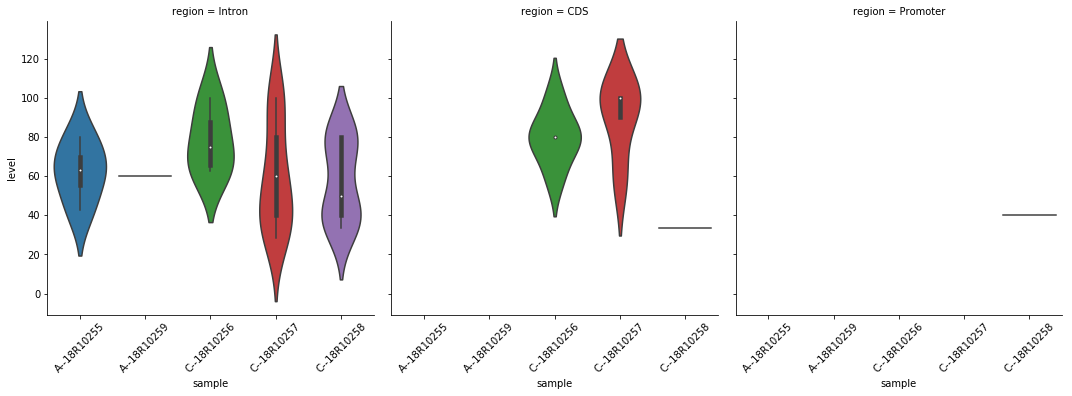

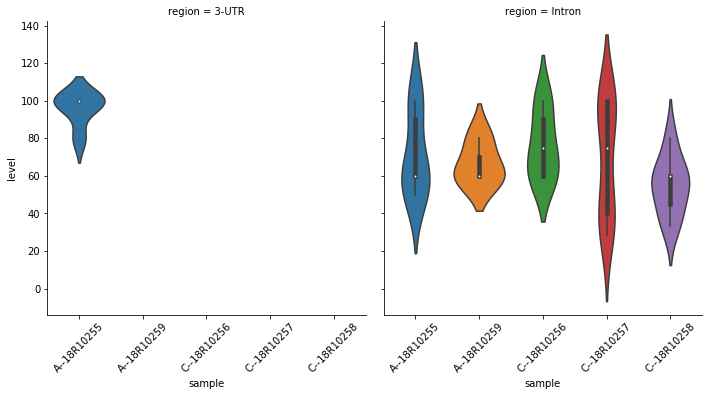

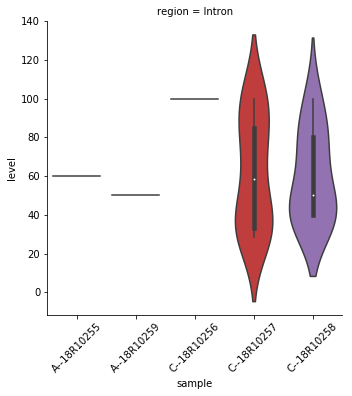

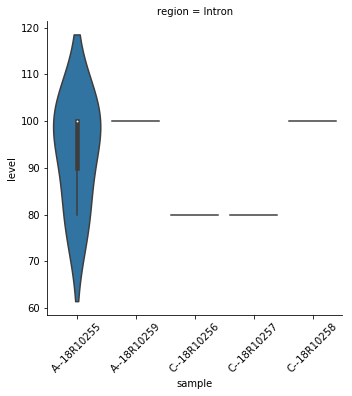

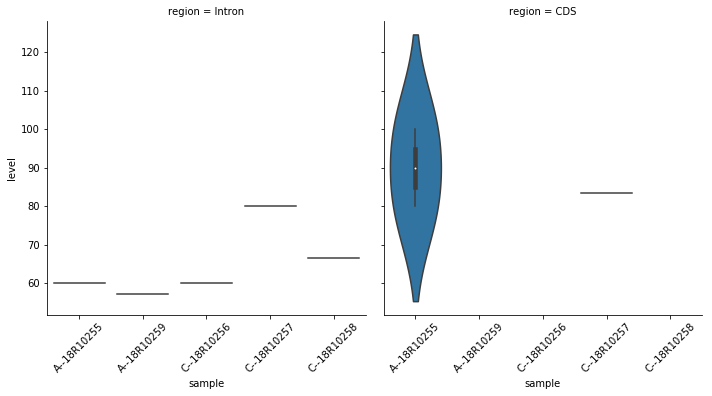

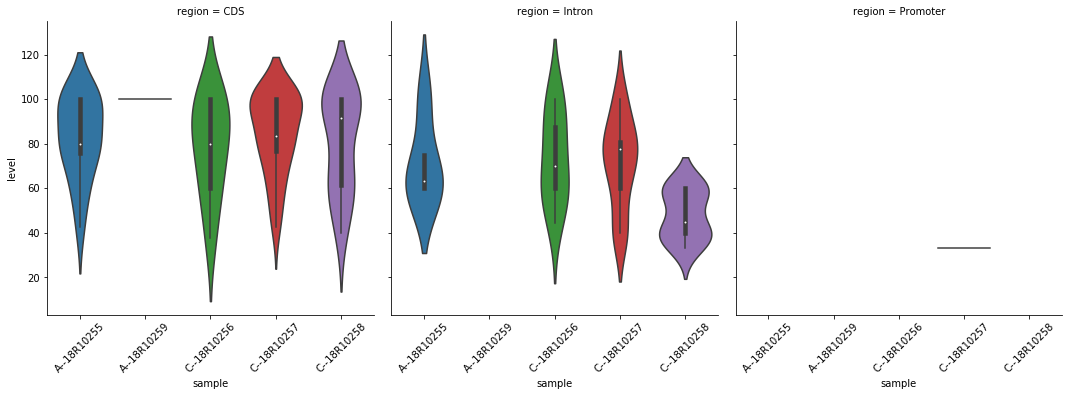

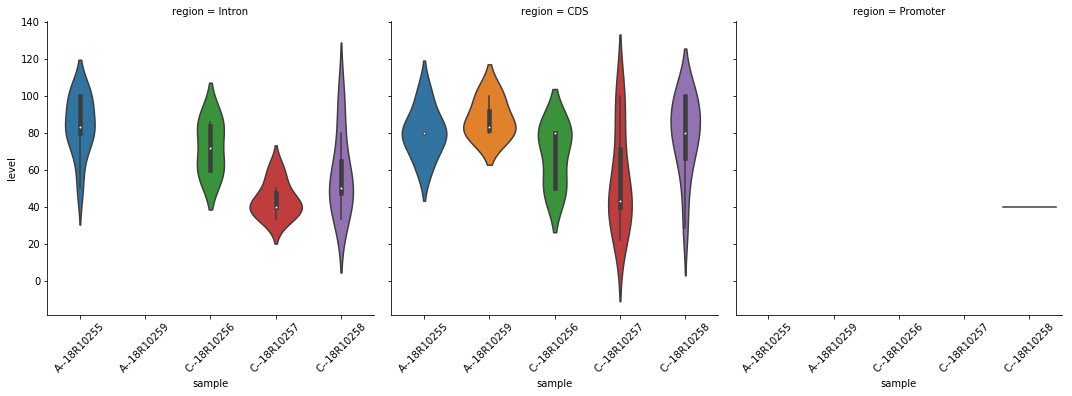

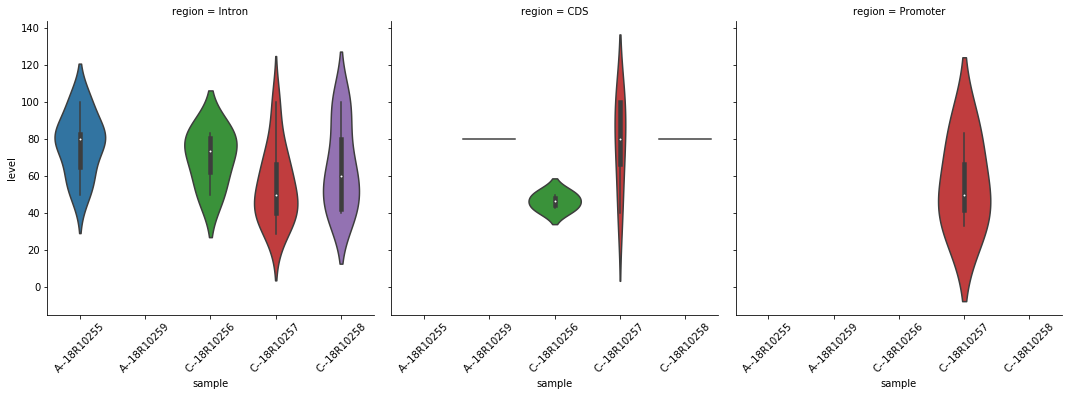

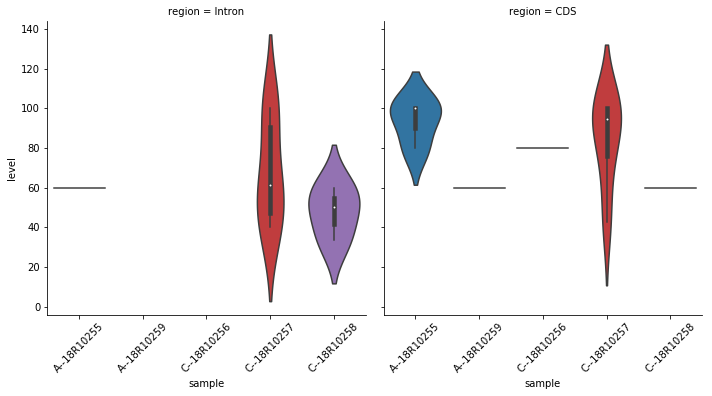

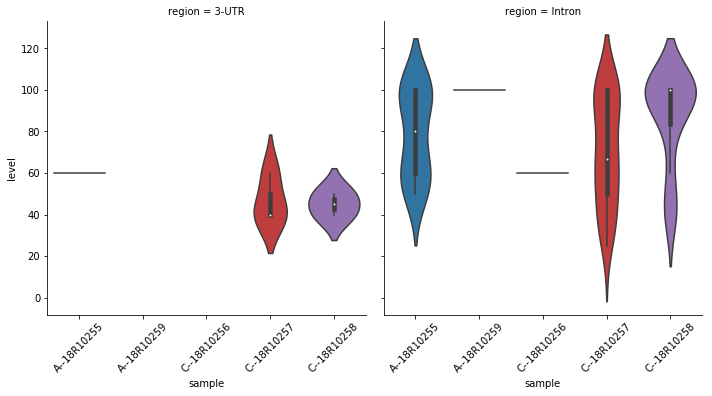

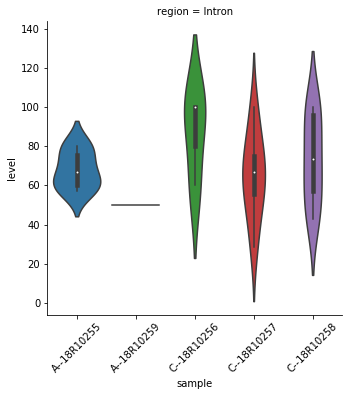

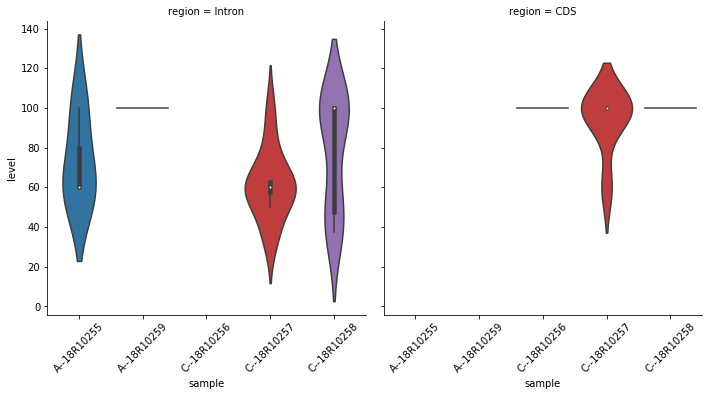

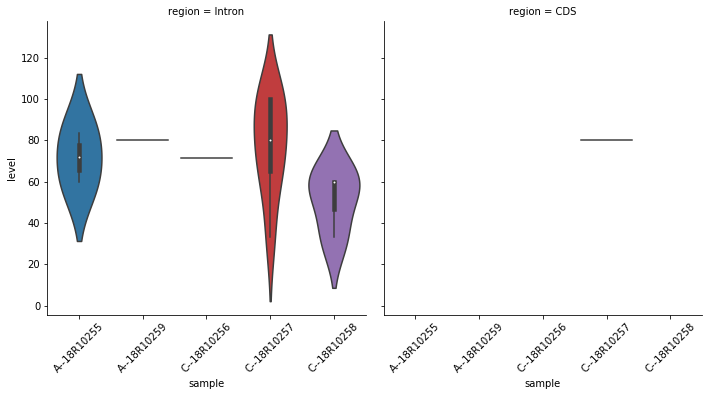

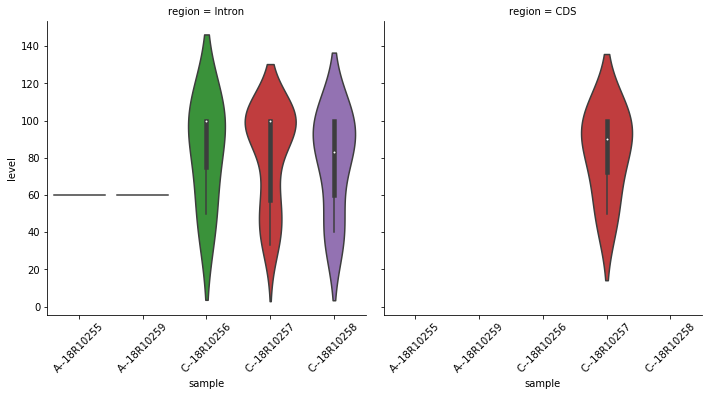

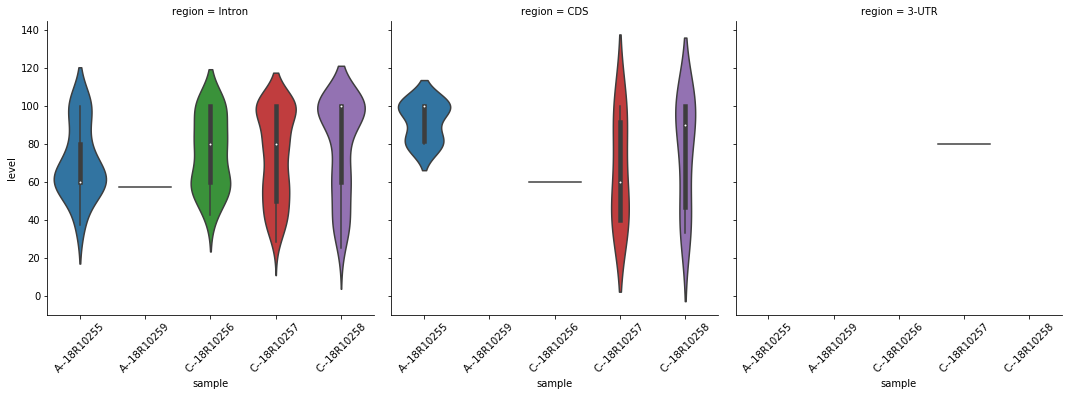

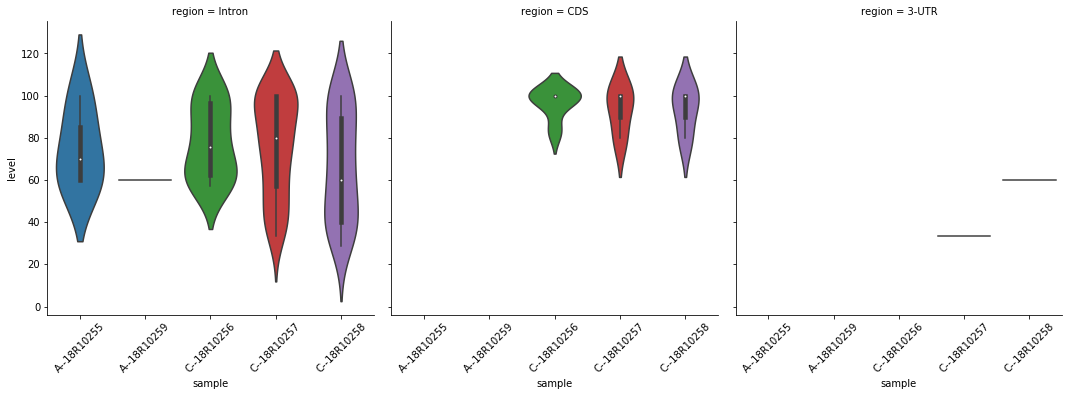

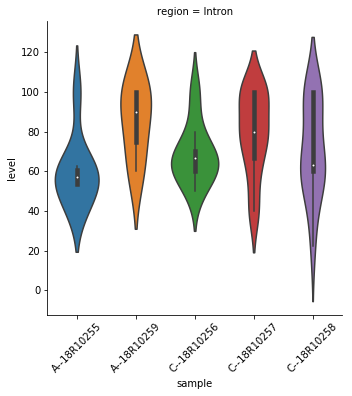

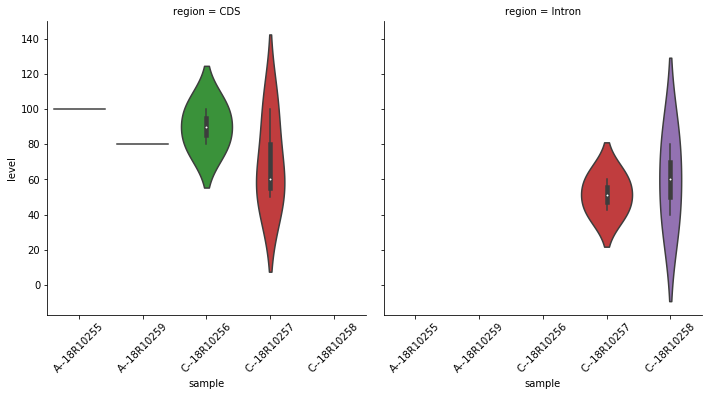

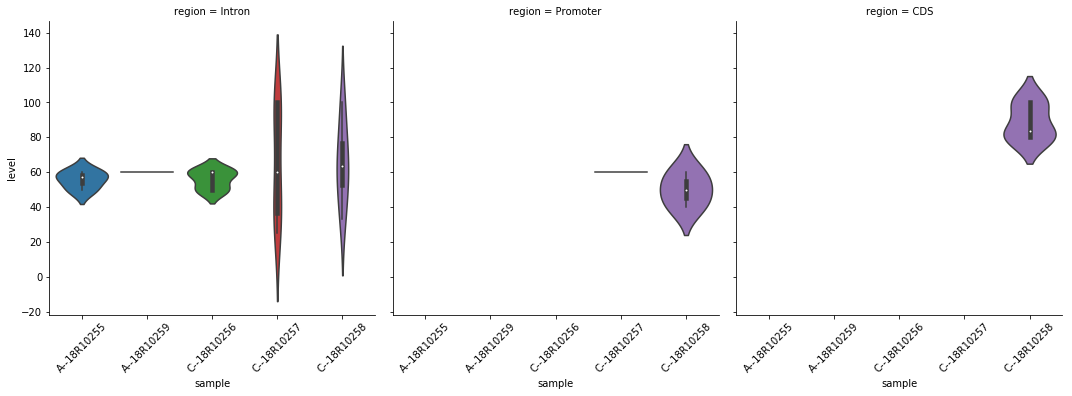

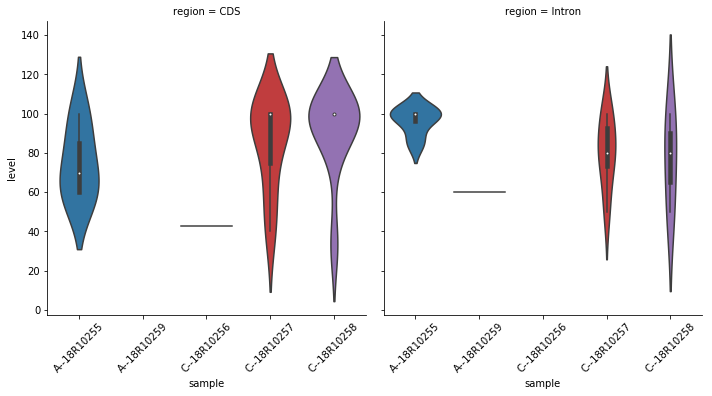

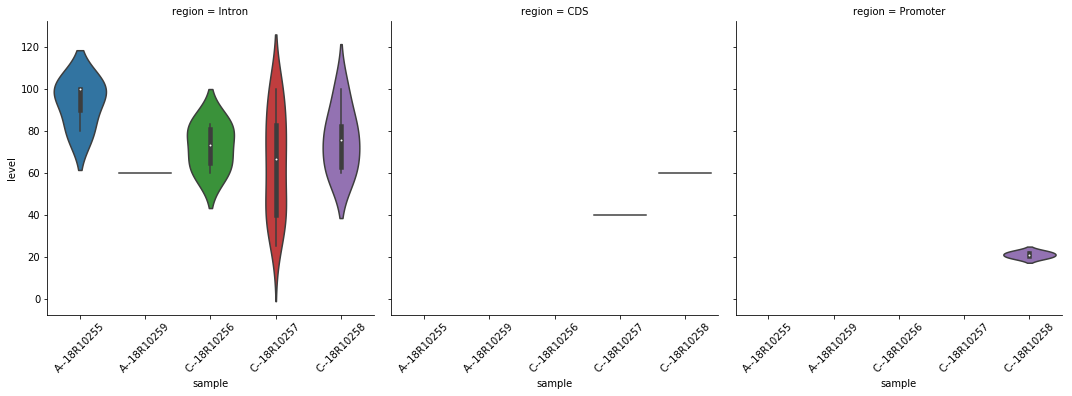

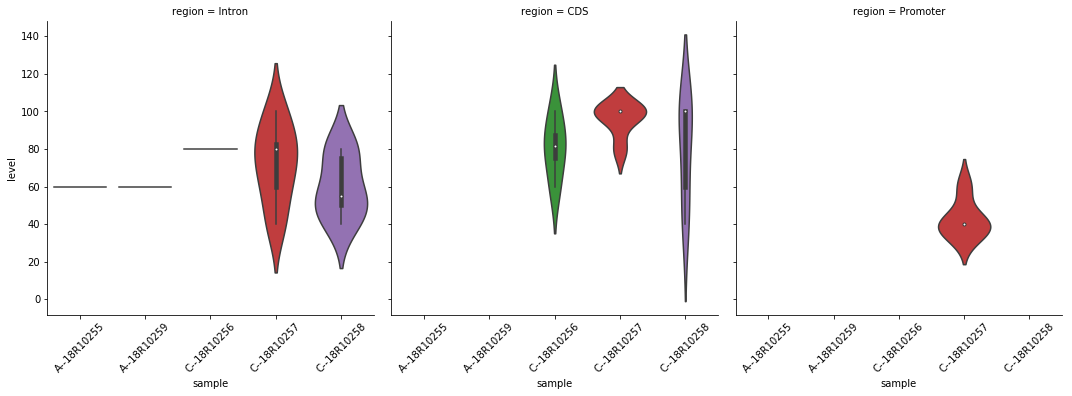

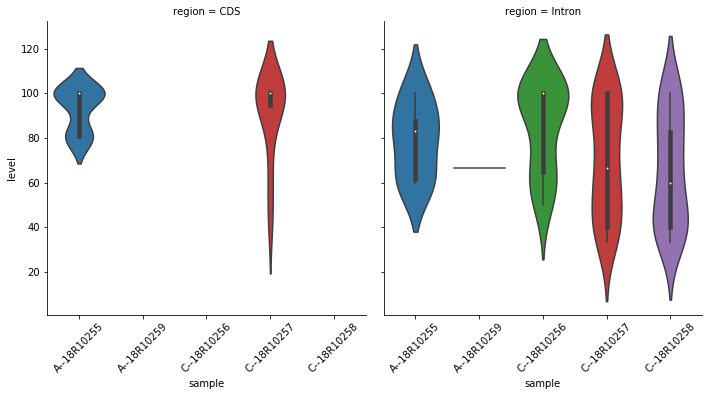

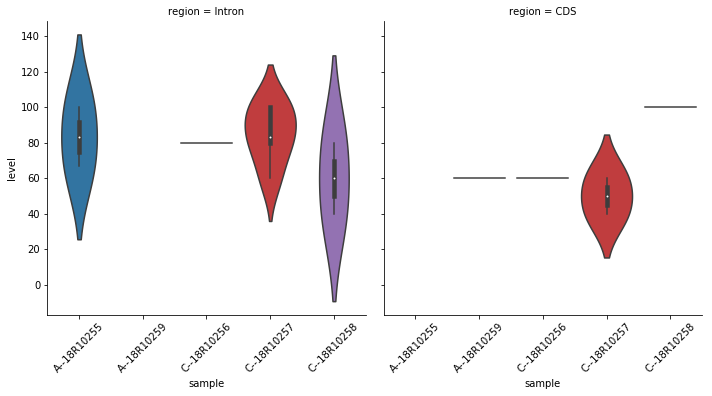

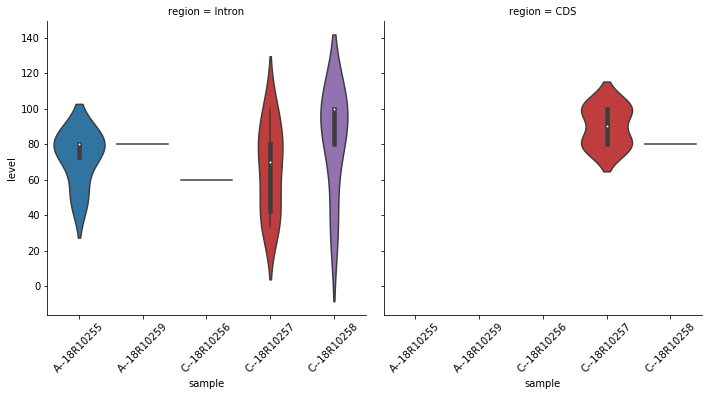

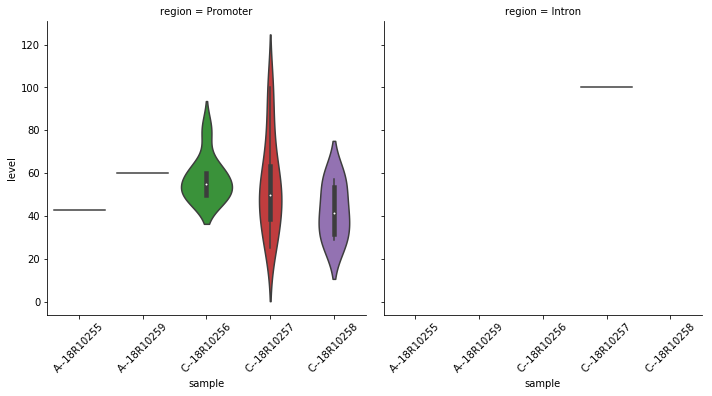

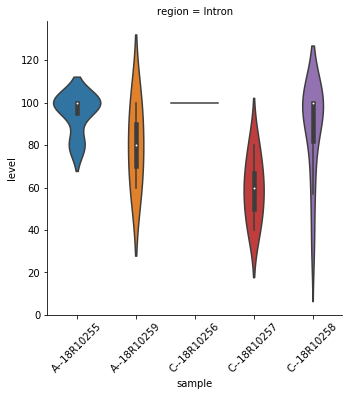

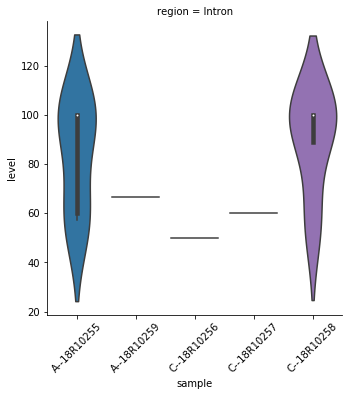

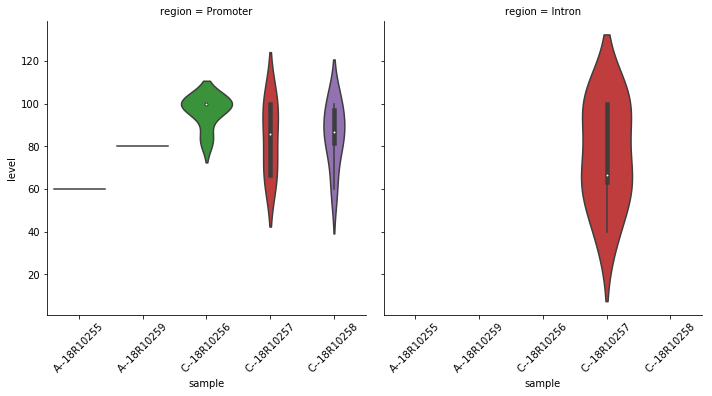

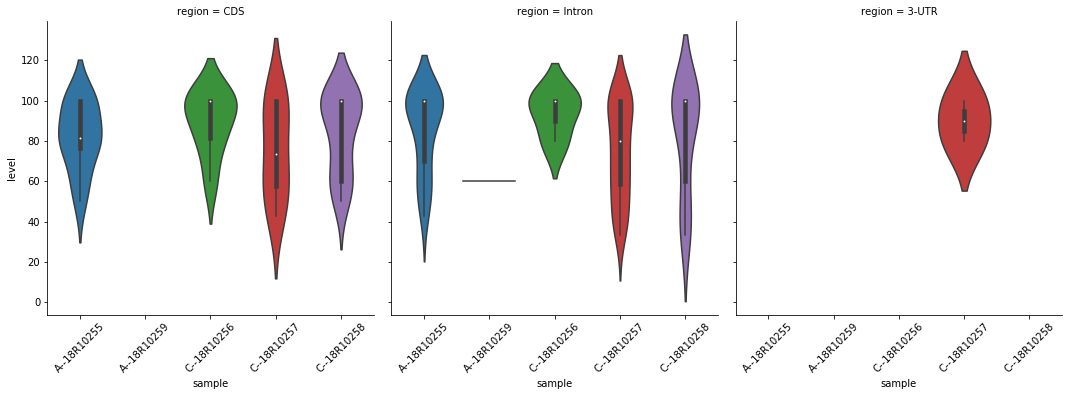

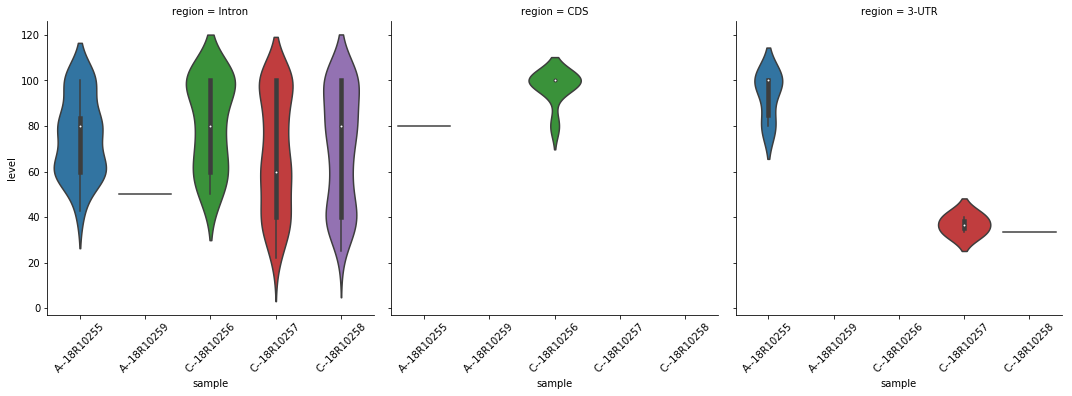

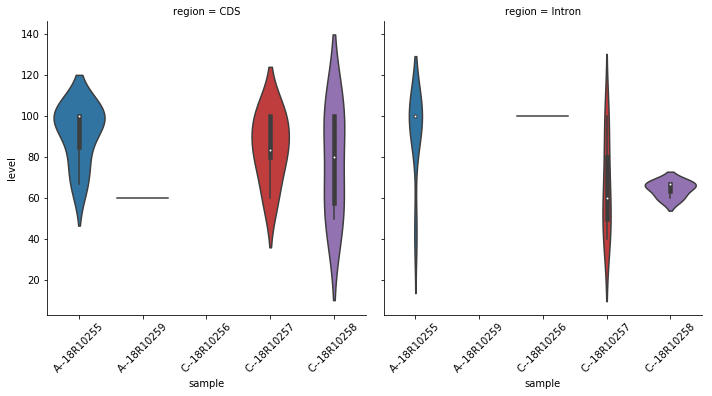

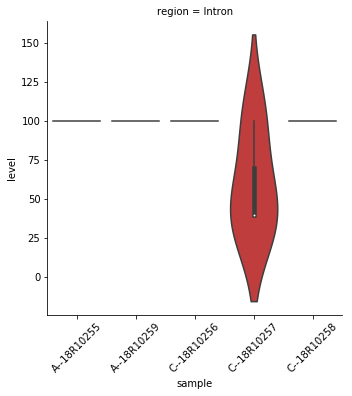

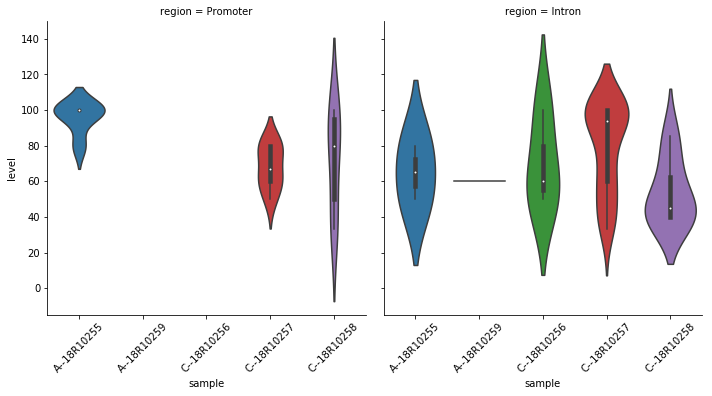

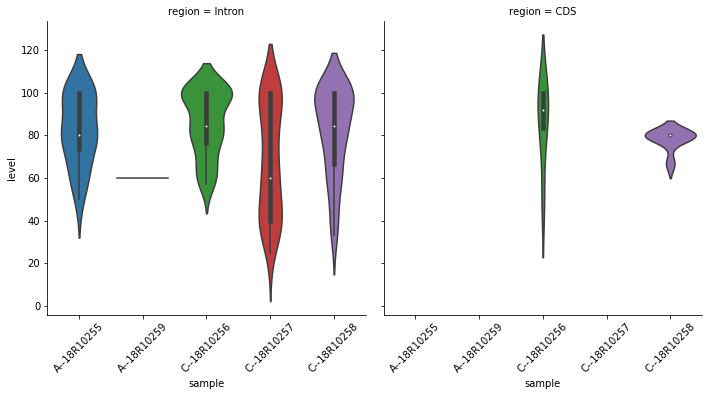

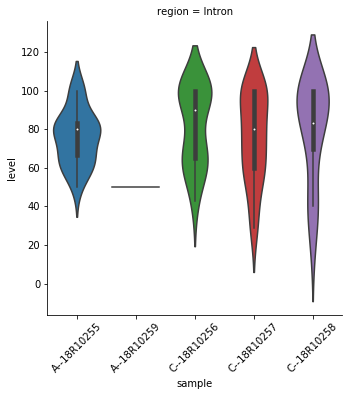

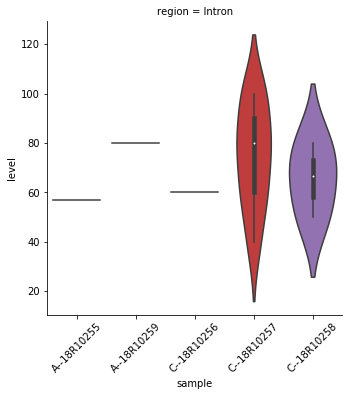

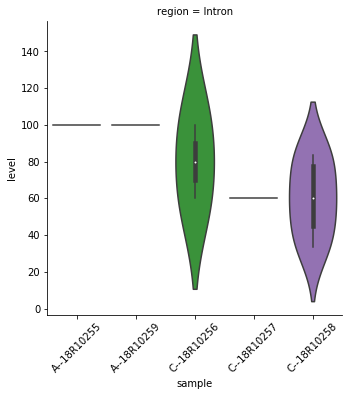

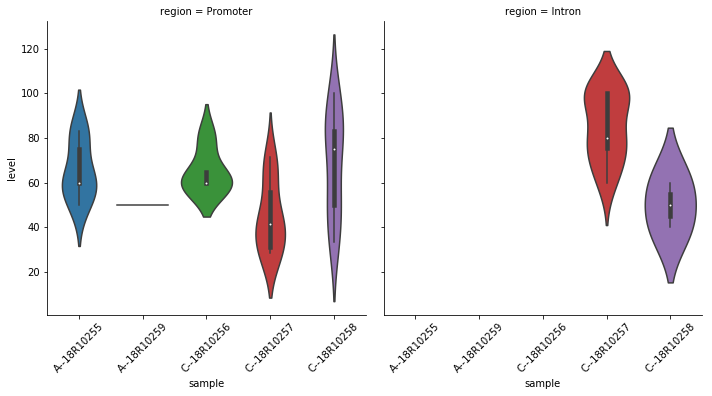

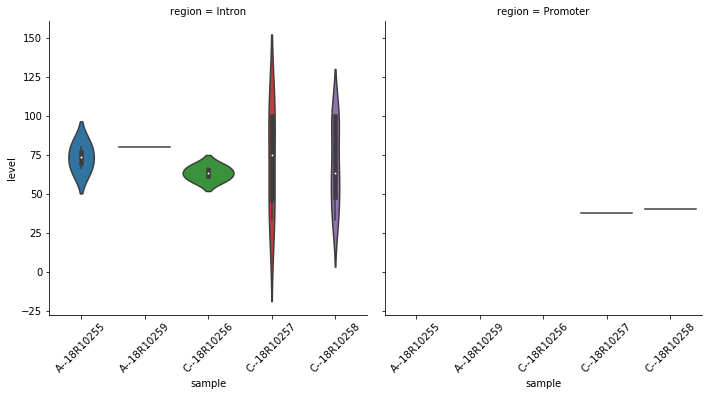

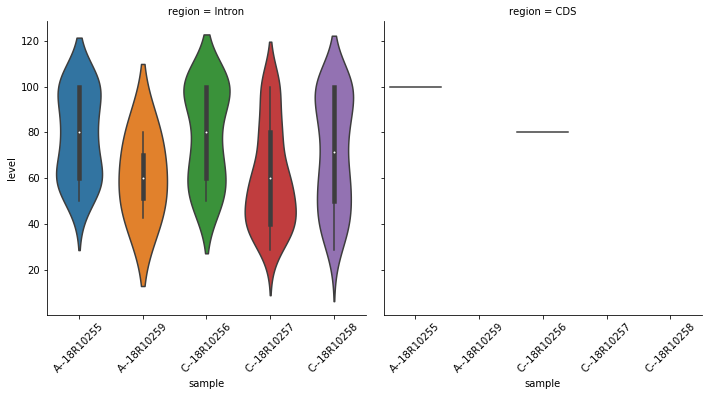

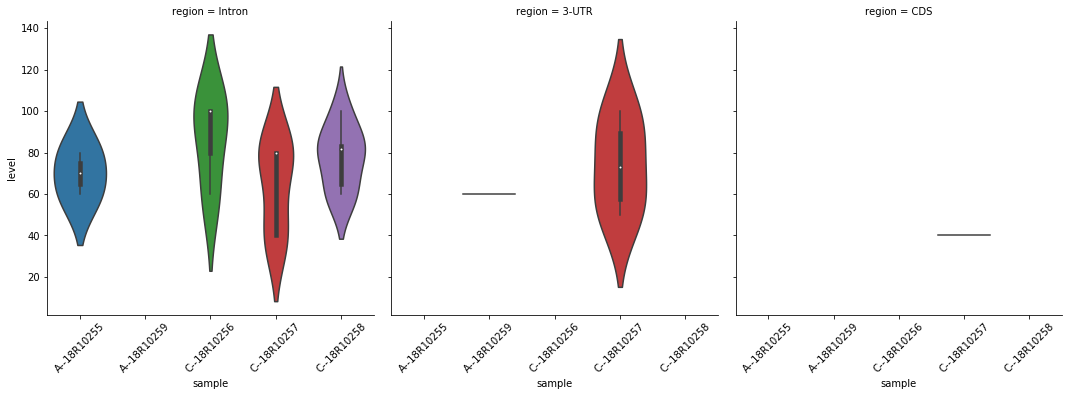

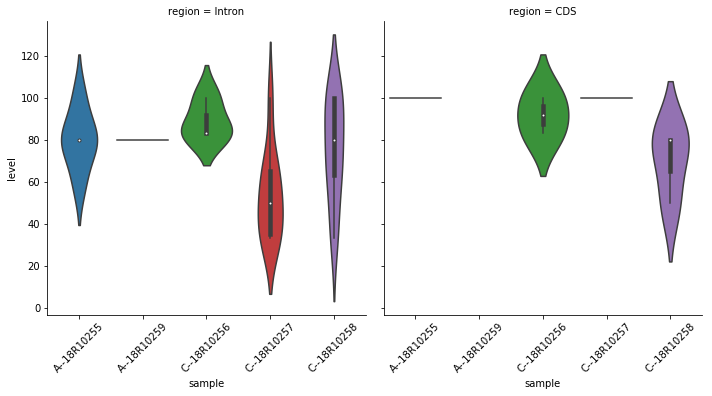

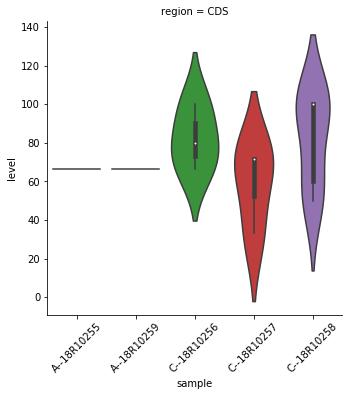

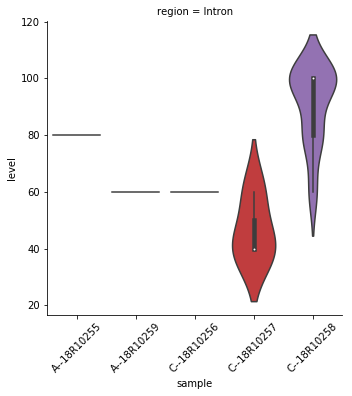

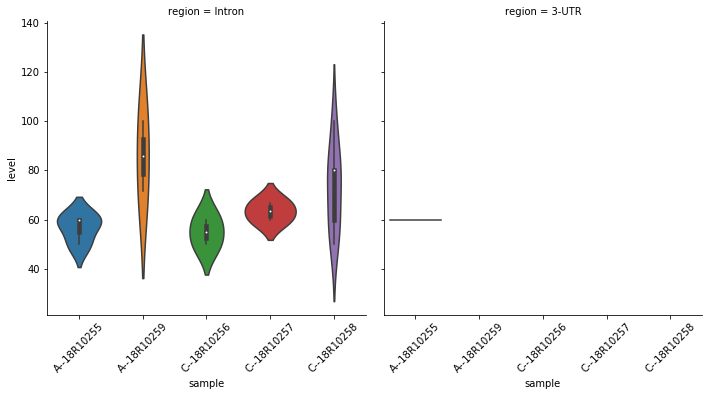

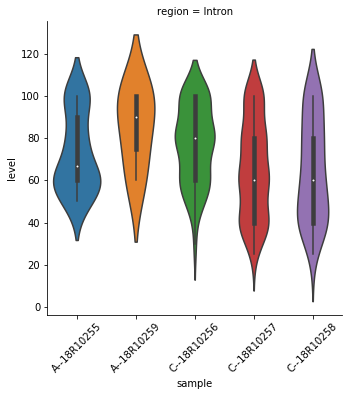

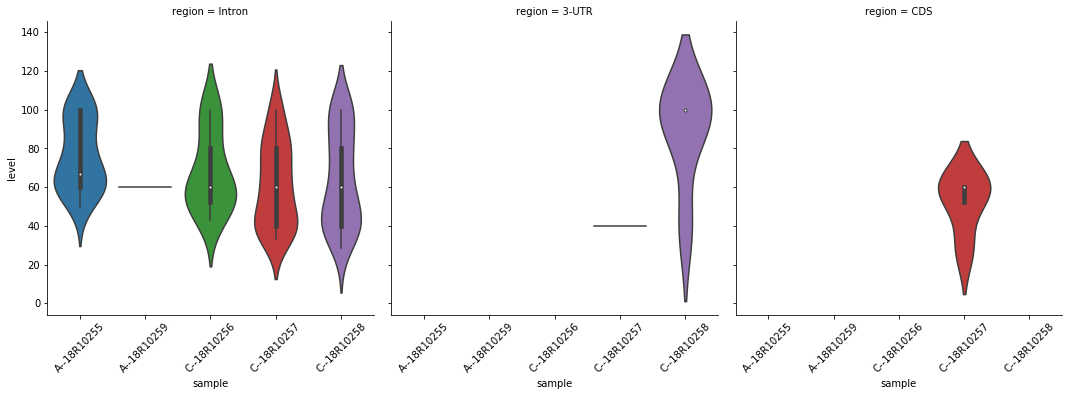

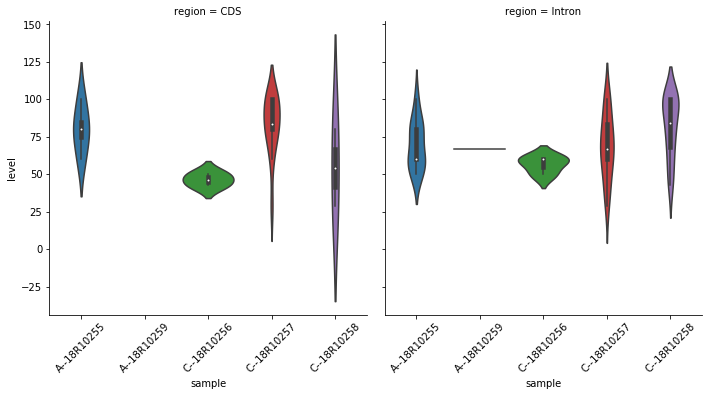

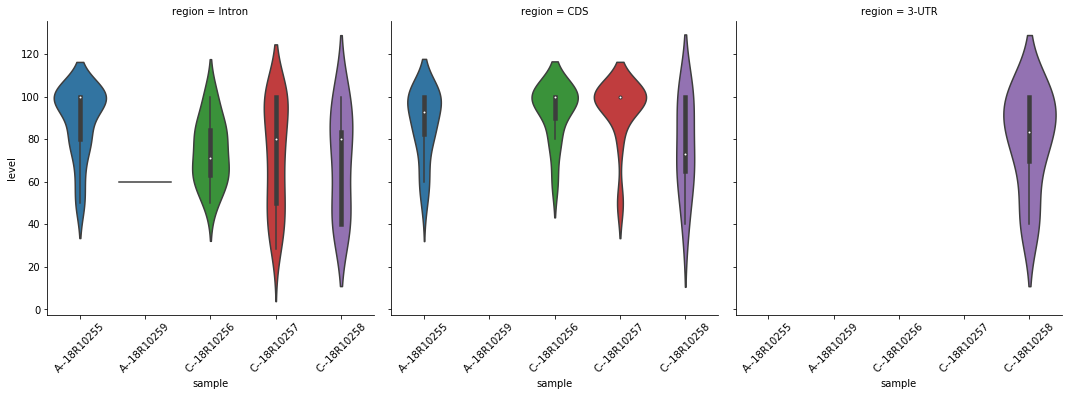

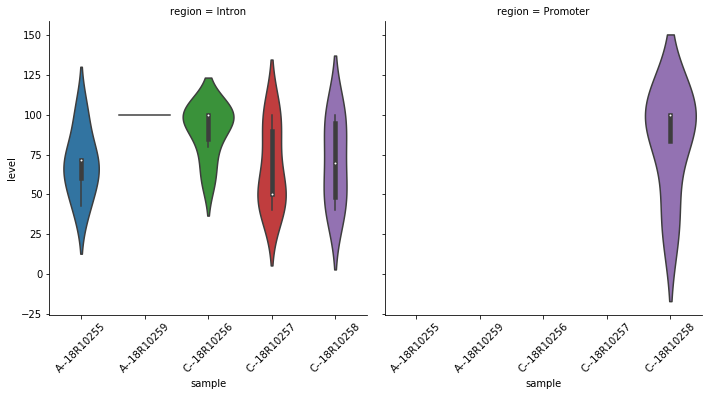

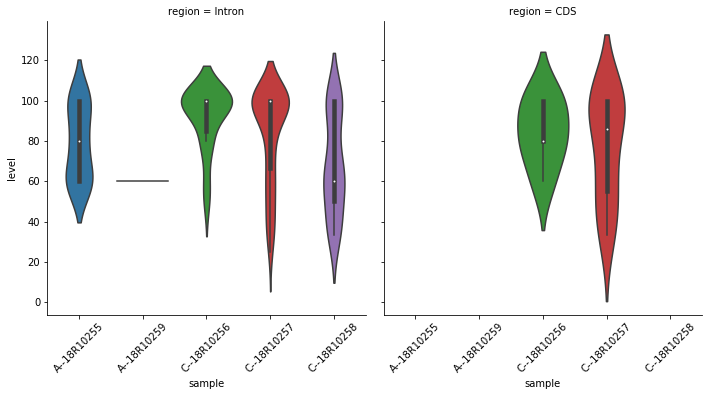

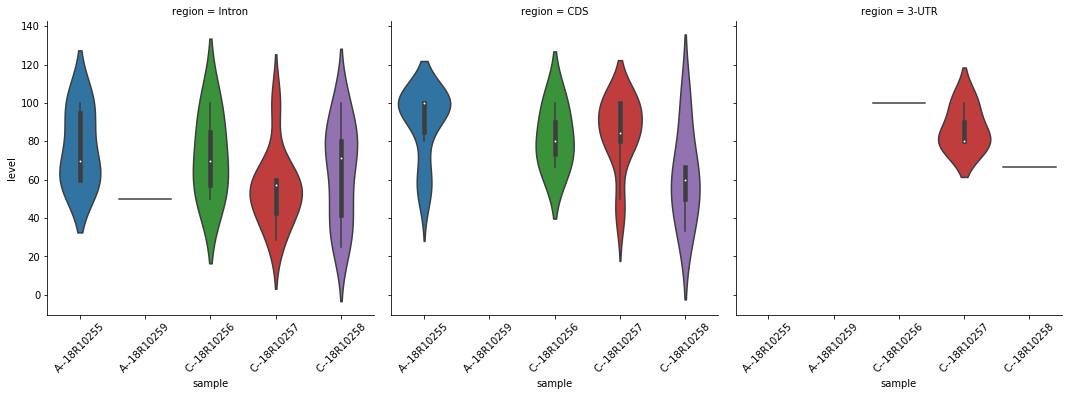

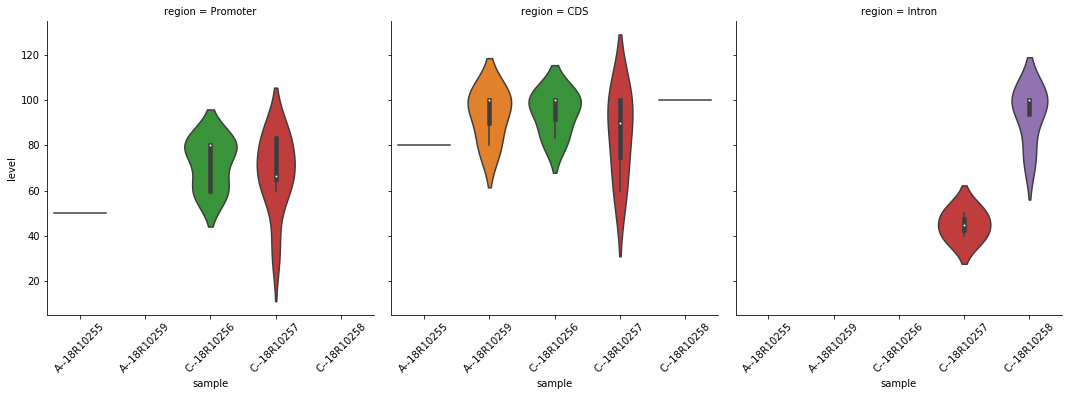

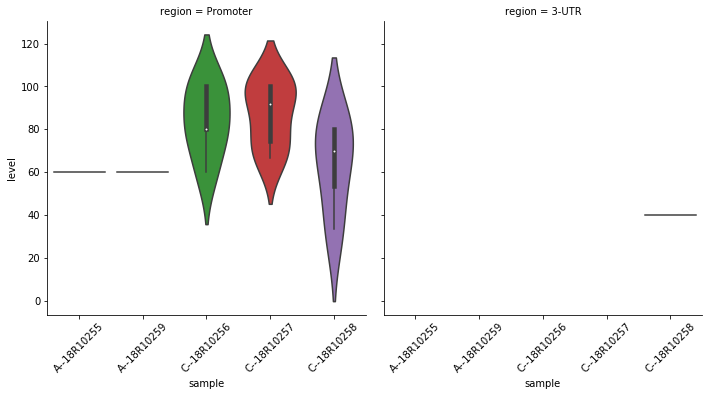

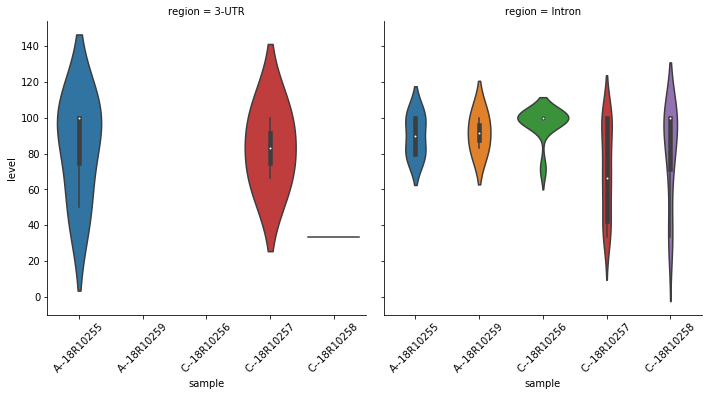

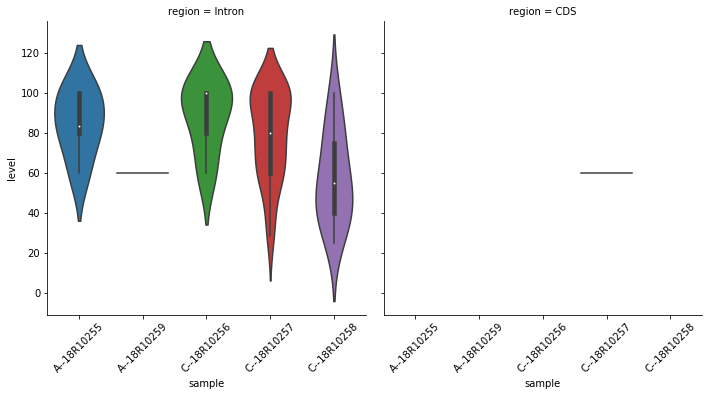

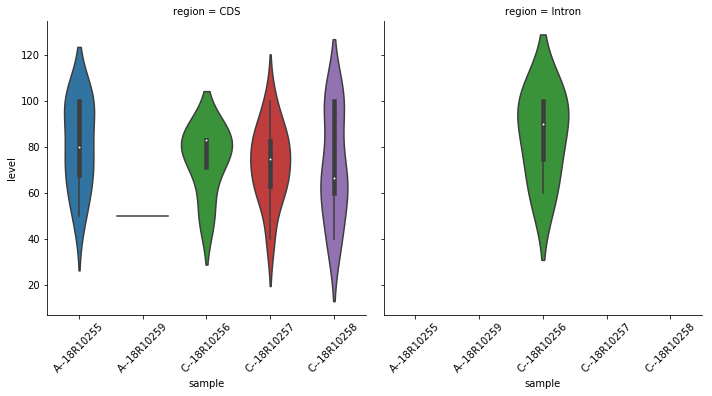

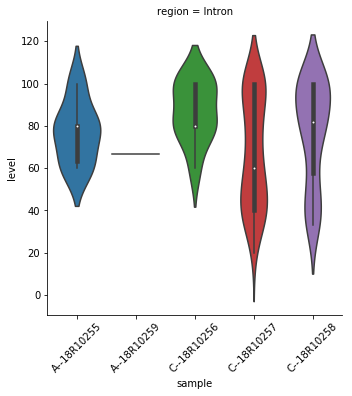

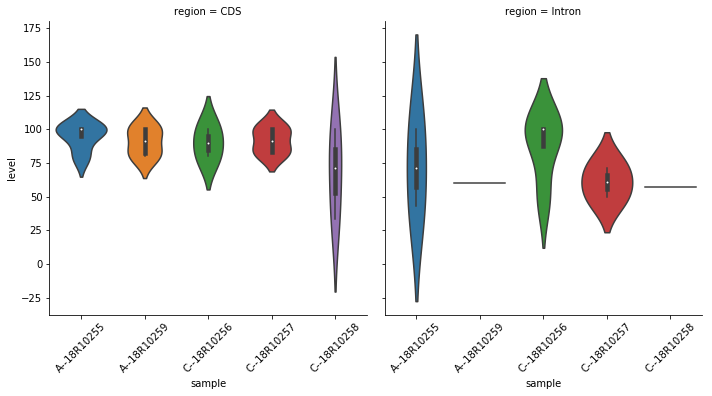

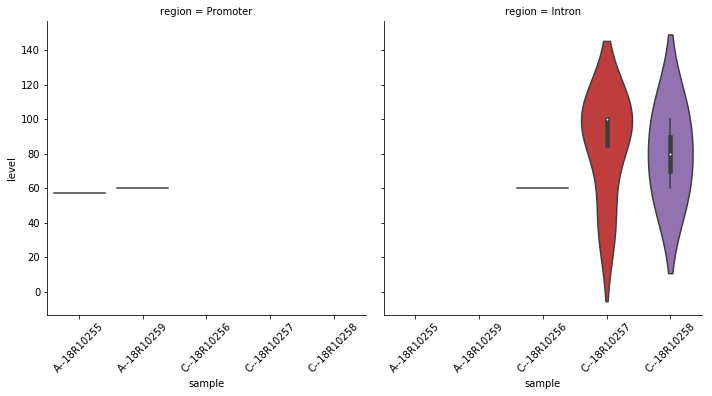

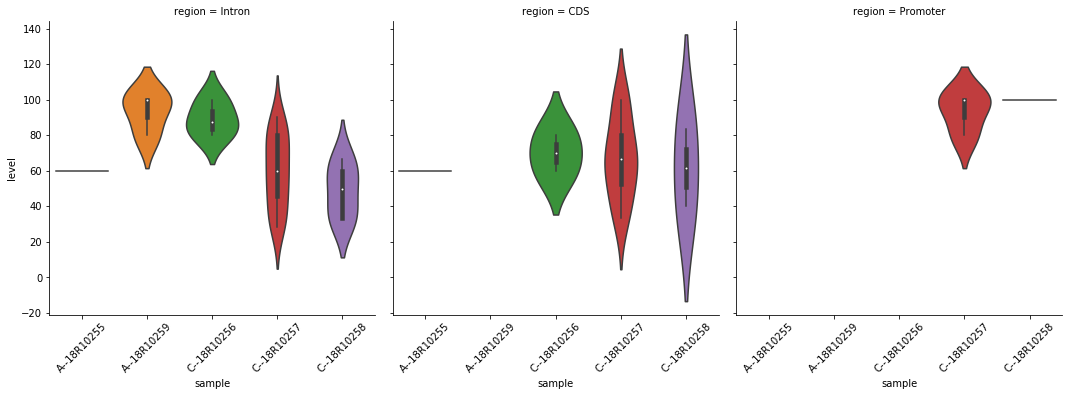

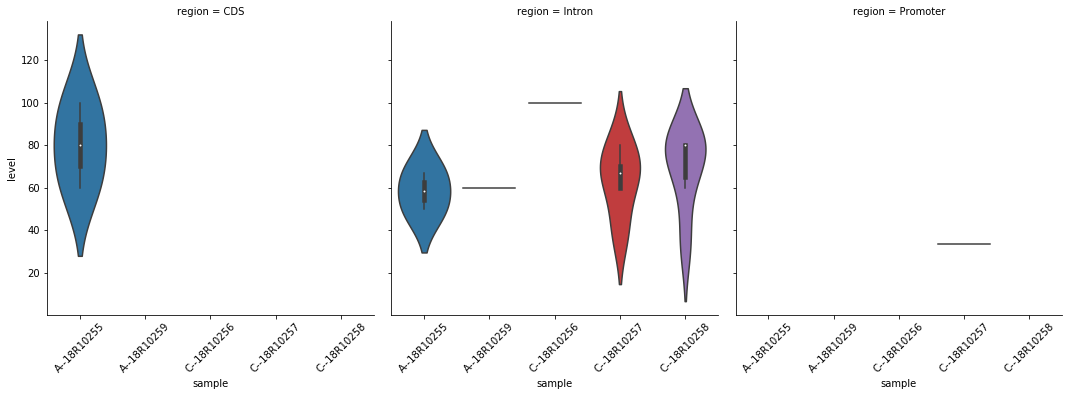

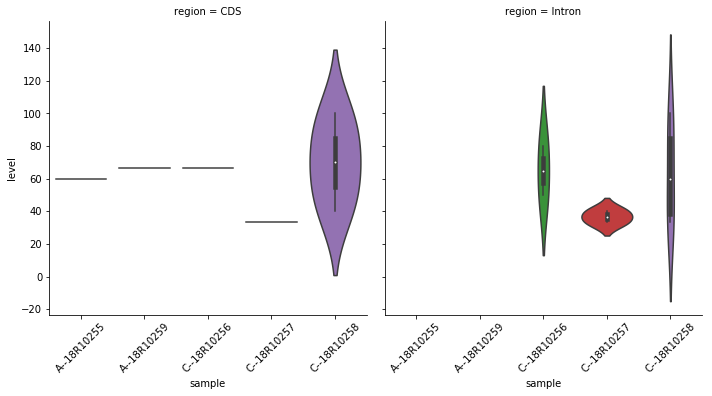

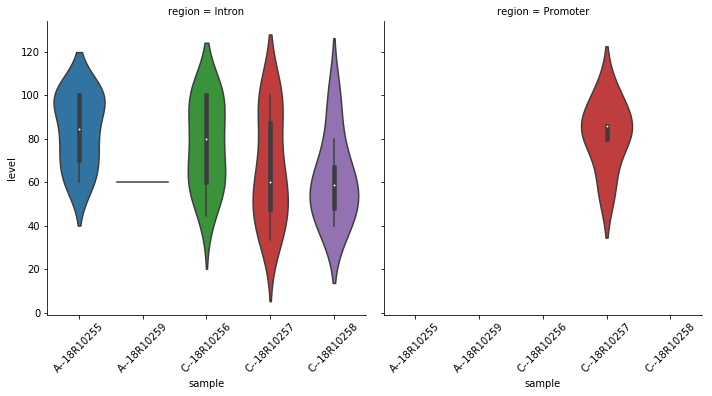

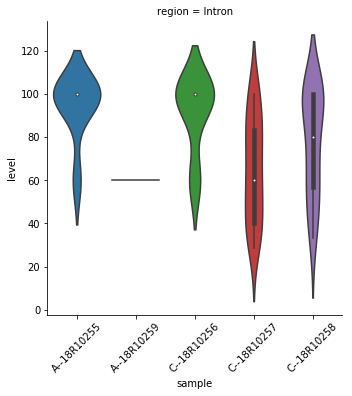

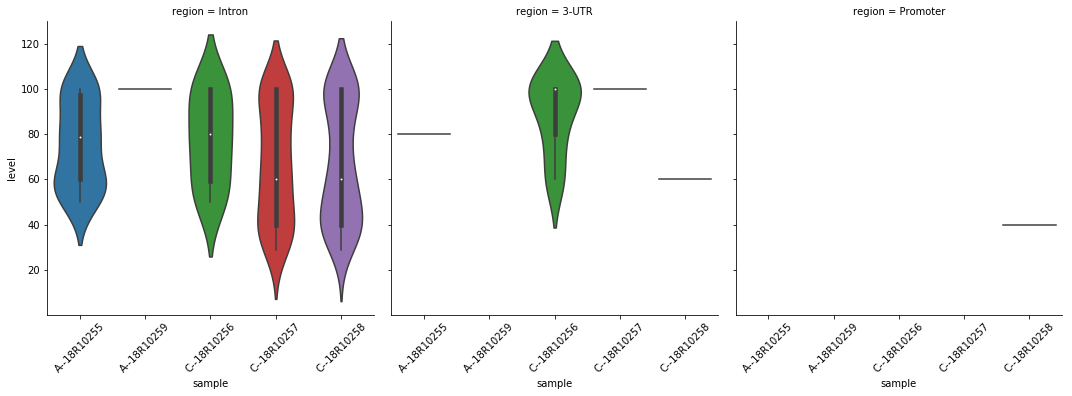

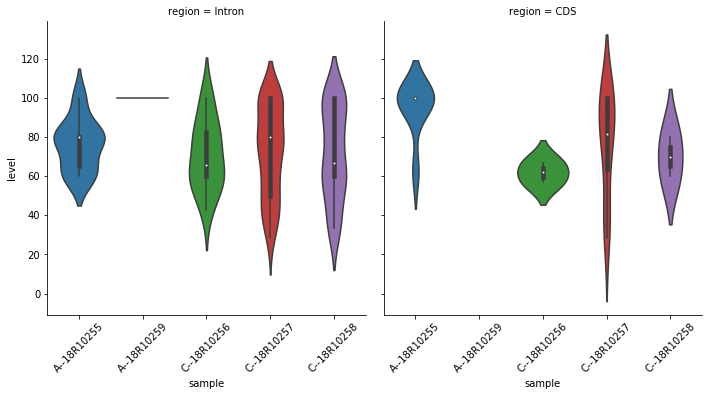

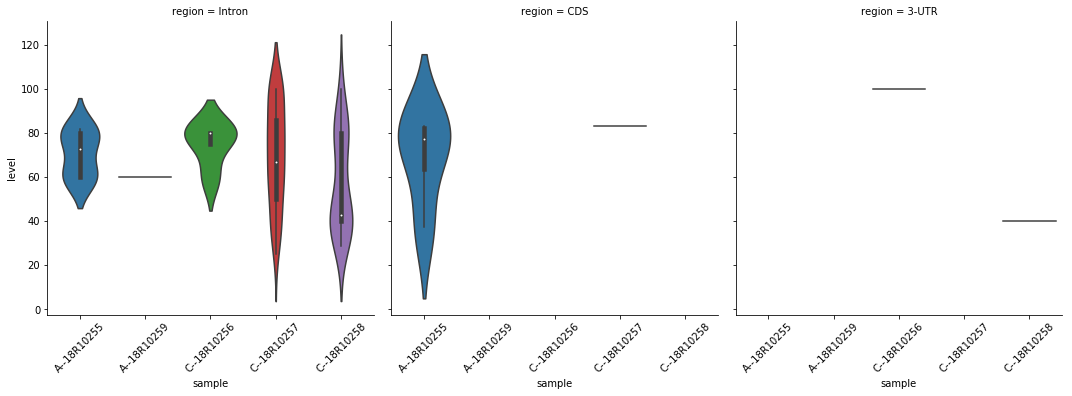

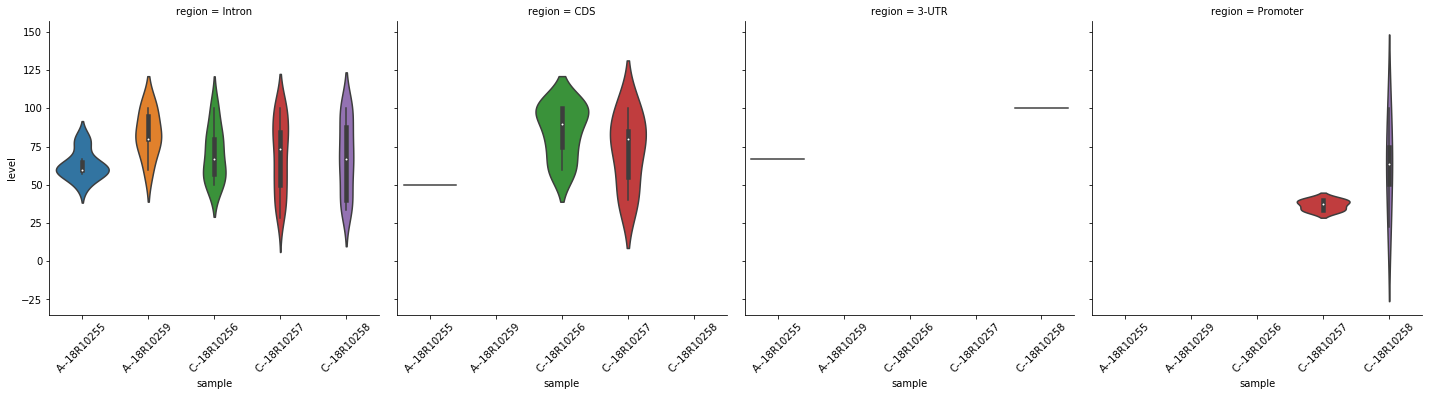

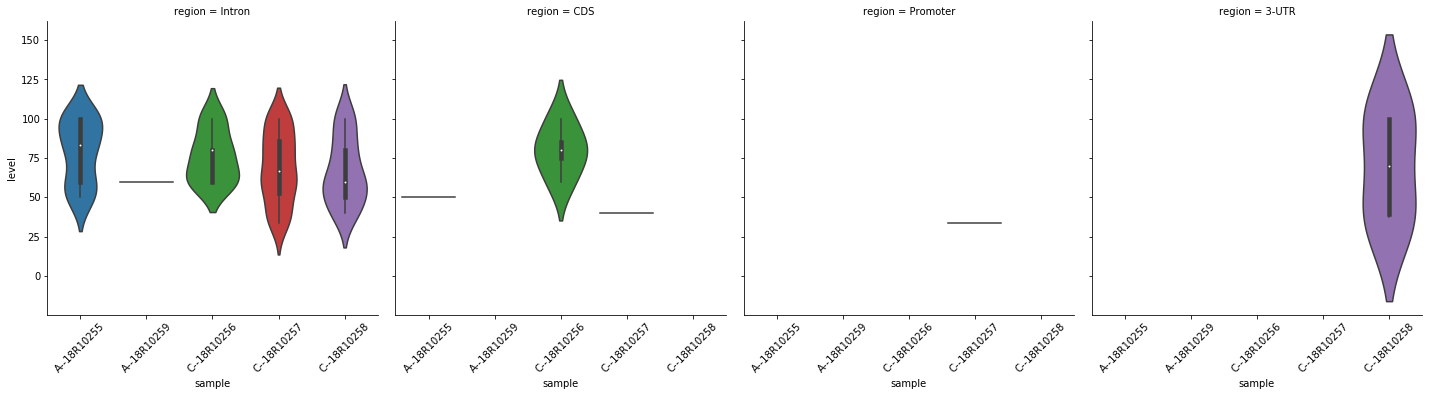

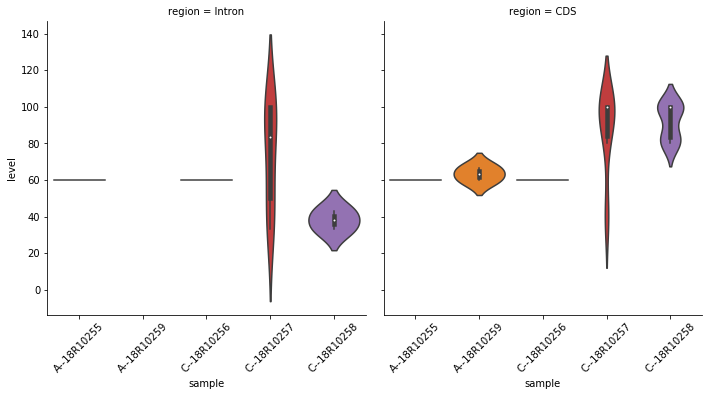

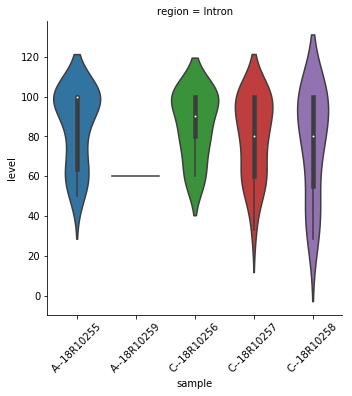

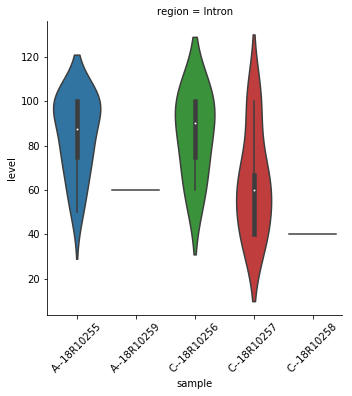

In [10]:
genenames = list(my_data2['gene'].unique())
genenames.remove('.')
test=[]
for gene in genenames:
    data=my_data2[my_data2['gene']==gene]
    data2=data.groupby('sample').describe()
    value1 =data2['level']['mean'].std()/data2['level']['mean'].mean()
    count =data2['level']['count'].count()
#     print(count)
#     test.append(data2['level']['mean'].std()/data2['level']['mean'].mean())
    if  value1> 0.1 and count> 4:
#     if count == 5:
#         print(gene,value1)
        g=sns.catplot(x="sample", y="level",col='region',kind="violin",data=my_data2[my_data2['gene']==gene])
    # ax=g.get_xticklabels()
        g.set_xticklabels(rotation=45)
        g.savefig('./demo_data/rrbs_pics/gene_{}.png'.format(gene))
#     break
    